# IMAGE DOWNLOAD MANAGER WITH STEGANALYSIS USING SVM CLASSIFIER AND LSB EXTRACTION FEATURE

BY AHMAD IMRAN BIN AHMAD FAISAL

NOV 2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import both the csv files as data frames
data_cov = pd.read_csv("original.csv", header = None)
data_steg = pd.read_csv("stega.csv", header = None)

In [2]:
data_cov.head()

0         1         2         3         4         5         6   \
0 -0.317327  0.827515  0.760605  0.740966  0.721418  0.910647  0.861356   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2 -0.503111  0.862970  0.802899  0.775813  0.751000  0.927452  0.889261   
3 -0.182988  0.887022  0.835196  0.813357  0.789932  0.911072  0.861291   
4  0.006107  0.932943  0.906990  0.897635  0.886993  0.970490  0.954652   

         7         8         9     ...           31        32        33  \
0  0.835196  0.815543  0.818339    ...    -0.001588 -0.004257 -0.000239   
1       NaN       NaN       NaN    ...     0.020795 -0.064528  0.015347   
2  0.866067  0.848226  0.855546    ...    -0.008875  0.003529  0.009316   
3  0.824739  0.795830  0.856713    ...     0.035087 -0.024424  0.004261   
4  0.944758  0.934639  0.934616    ...     0.015832 -0.009279 -0.015531   

         34        35        36        37        38        39        40  
0 -0.266943 -0.106837 -0.059703 -0.015162 -0.006729 -0.004329  0.001190  
1  0.005049 -0.145678 -0.189235  0.075486  0.015123 -0.066373  0.015776  
2 -0.248362 -0.107545 -0.072559 -0.018520 -0.014878  0.004437  0.008626  
3 -0.137704 -0.088573 -0.171084  0.064899  0.052169 -0.024969 -0.000246  
4 -0.130431 -0.099206 -0.136827  0.039127  0.025786 -0.013232 -0.022728  

[5 rows x 41 columns]

In [3]:
data_steg.head()

0         1         2         3         4         5         6   \
0 -0.317249  0.827004  0.760402  0.740601  0.721245  0.909903  0.861059   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2 -0.503030  0.862545  0.802756  0.775952  0.750876  0.927202  0.888695   
3 -0.182986  0.885745  0.833919  0.812366  0.788900  0.909339  0.859644   
4  0.005779  0.932725  0.907008  0.897505  0.886902  0.970202  0.954428   

         7         8         9     ...           31        32        33  \
0  0.834736  0.815029  0.817973    ...    -0.004308  0.001464  0.000648   
1       NaN       NaN       NaN    ...     0.012889 -0.044616  0.013183   
2  0.865893  0.847715  0.855019    ...    -0.008937  0.005700  0.006849   
3  0.823534  0.794631  0.855730    ...     0.025052 -0.020100  0.004419   
4  0.944286  0.934372  0.934324    ...     0.011471 -0.006570 -0.009688   

         34        35        36        37        38        39        40  
0 -0.260819 -0.115387 -0.062382 -0.013157 -0.004018  0.000808  0.001451  
1 -0.042575 -0.151737 -0.159439  0.056094  0.011527 -0.049579  0.011257  
2 -0.249954 -0.110913 -0.068477 -0.015880 -0.013919  0.002656  0.007633  
3 -0.156632 -0.101755 -0.147277  0.049512  0.043812 -0.021355 -0.000414  
4 -0.145384 -0.115871 -0.119257  0.027204  0.018741 -0.010369 -0.014391  

[5 rows x 41 columns]

In [4]:
data_cov.describe()

0            1            2            3            4   \
count  4955.000000  4955.000000  4955.000000  4955.000000  4953.000000   
mean     -0.222770     0.861689     0.793337     0.757075     0.727470   
std       0.354188     0.121255     0.164265     0.180590     0.192195   
min      -1.000000    -0.000057    -0.000103    -0.000330    -0.000527   
25%      -0.474466     0.822824     0.731708     0.678874     0.636964   
50%      -0.227891     0.894784     0.838131     0.805294     0.776455   
75%      -0.005715     0.940445     0.906136     0.884440     0.865610   
max       0.974058     0.996052     0.992134     0.988684     0.985516   

                5            6            7            8            9   \
count  4955.000000  4955.000000  4955.000000  4955.000000  4955.000000   
mean      0.879443     0.818561     0.785358     0.758375     0.832120   
std       0.111513     0.153251     0.170867     0.183889     0.139228   
min      -0.000027    -0.000107    -0.000549    -0.000546    -0.000057   
25%       0.845277     0.761288     0.710135     0.673245     0.781773   
50%       0.910647     0.862849     0.833889     0.809737     0.869285   
75%       0.949954     0.922289     0.906200     0.890578     0.926199   
max       0.998894     0.998109     0.997300     0.997075     0.995768   

          ...                31           32           33           34  \
count     ...       5000.000000  5000.000000  5000.000000  5000.000000   
mean      ...          0.008085    -0.014999     0.001912    -0.138502   
std       ...          0.054331     0.019041     0.013701     0.055977   
min       ...         -0.089235    -0.172007    -0.117333    -0.330407   
25%       ...         -0.020826    -0.022467    -0.003546    -0.175108   
50%       ...         -0.007502    -0.009472     0.001747    -0.143756   
75%       ...          0.015951    -0.002145     0.006832    -0.107276   
max       ...          0.413548     0.092665     0.107729     0.284852   

                35           36           37           38           39  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     -0.136995    -0.121055     0.022204     0.013698    -0.015311   
std       0.039616     0.067333     0.067537     0.066486     0.018943   
min      -0.338165    -0.569738    -0.074186    -0.103871    -0.177523   
25%      -0.159652    -0.141013    -0.015540    -0.021176    -0.022910   
50%      -0.134803    -0.105140    -0.000784    -0.006139    -0.010662   
75%      -0.115830    -0.082676     0.036978     0.021777    -0.003141   
max       0.235701    -0.001658     0.504134     0.502468     0.112773   

                40  
count  5000.000000  
mean     -0.001838  
std       0.014695  
min      -0.132423  
25%      -0.007070  
50%      -0.000475  
75%       0.004254  
max       0.117887  

[8 rows x 41 columns]

In [5]:
data_steg.describe()

0            1            2            3            4   \
count  4955.000000  4955.000000  4955.000000  4955.000000  4953.000000   
mean     -0.222791     0.860563     0.792550     0.756399     0.726903   
std       0.354160     0.121481     0.164247     0.180531     0.192056   
min      -1.000000    -0.000057    -0.000103    -0.000238    -0.000527   
25%      -0.474067     0.821488     0.730878     0.677950     0.635659   
50%      -0.227866     0.893637     0.837665     0.804545     0.776196   
75%      -0.005692     0.939520     0.905344     0.883705     0.865252   
max       0.974019     0.996052     0.992134     0.988700     0.985533   

                5            6            7            8            9   \
count  4955.000000  4955.000000  4955.000000  4955.000000  4955.000000   
mean      0.878122     0.817548     0.784480     0.757566     0.831160   
std       0.111680     0.153309     0.170789     0.183840     0.139180   
min      -0.000027    -0.000107    -0.000568    -0.000565    -0.000057   
25%       0.843688     0.759527     0.709716     0.672934     0.780307   
50%       0.909253     0.861794     0.832914     0.808615     0.868487   
75%       0.948753     0.921478     0.904799     0.889730     0.925285   
max       0.998707     0.997840     0.997177     0.996881     0.995768   

          ...                31           32           33           34  \
count     ...       5000.000000  5000.000000  5000.000000  5000.000000   
mean      ...          0.004571    -0.010946     0.001792    -0.152535   
std       ...          0.038357     0.013272     0.009810     0.043979   
min       ...         -0.066860    -0.096363    -0.073305    -0.335299   
25%       ...         -0.016721    -0.016817    -0.002706    -0.181391   
50%       ...         -0.006214    -0.007418     0.001529    -0.154647   
75%       ...          0.011337    -0.001814     0.005781    -0.125896   
max       ...          0.295357     0.073364     0.062880     0.137264   

                35           36           37           38           39  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     -0.146373    -0.107181     0.016238     0.009552    -0.011884   
std       0.032559     0.050997     0.051121     0.050522     0.014014   
min      -0.316795    -0.449465    -0.057415    -0.081173    -0.108202   
25%      -0.164848    -0.123856    -0.013366    -0.017745    -0.017809   
50%      -0.142219    -0.097171    -0.000686    -0.005481    -0.008829   
75%      -0.126780    -0.078264     0.028923     0.017343    -0.002765   
max       0.065502    -0.001416     0.386344     0.382849     0.096883   

                40  
count  5000.000000  
mean     -0.001323  
std       0.011060  
min      -0.090587  
25%      -0.005694  
50%      -0.000483  
75%       0.003636  
max       0.073897  

[8 rows x 41 columns]

# PREPROCESSING PHASE


In [6]:
data_cov = data_cov.dropna(axis = 0)
data_steg = data_steg.dropna(axis = 0)

data_cov.head()

0         1         2         3         4         5         6   \
0 -0.317327  0.827515  0.760605  0.740966  0.721418  0.910647  0.861356   
2 -0.503111  0.862970  0.802899  0.775813  0.751000  0.927452  0.889261   
3 -0.182988  0.887022  0.835196  0.813357  0.789932  0.911072  0.861291   
4  0.006107  0.932943  0.906990  0.897635  0.886993  0.970490  0.954652   
5 -0.062837  0.842912  0.754166  0.697135  0.650435  0.856007  0.775904   

         7         8         9     ...           31        32        33  \
0  0.835196  0.815543  0.818339    ...    -0.001588 -0.004257 -0.000239   
2  0.866067  0.848226  0.855546    ...    -0.008875  0.003529  0.009316   
3  0.824739  0.795830  0.856713    ...     0.035087 -0.024424  0.004261   
4  0.944758  0.934639  0.934616    ...     0.015832 -0.009279 -0.015531   
5  0.732342  0.700388  0.774753    ...    -0.006104 -0.015302 -0.010715   

         34        35        36        37        38        39        40  
0 -0.266943 -0.106837 -0.059703 -0.015162 -0.006729 -0.004329  0.001190  
2 -0.248362 -0.107545 -0.072559 -0.018520 -0.014878  0.004437  0.008626  
3 -0.137704 -0.088573 -0.171084  0.064899  0.052169 -0.024969 -0.000246  
4 -0.130431 -0.099206 -0.136827  0.039127  0.025786 -0.013232 -0.022728  
5 -0.129836 -0.147590 -0.092916 -0.005466 -0.006112 -0.016379 -0.015106  

[5 rows x 41 columns]

In [7]:
data_steg.head()

0         1         2         3         4         5         6   \
0 -0.317249  0.827004  0.760402  0.740601  0.721245  0.909903  0.861059   
2 -0.503030  0.862545  0.802756  0.775952  0.750876  0.927202  0.888695   
3 -0.182986  0.885745  0.833919  0.812366  0.788900  0.909339  0.859644   
4  0.005779  0.932725  0.907008  0.897505  0.886902  0.970202  0.954428   
5 -0.062954  0.842023  0.753467  0.696795  0.650121  0.855838  0.775512   

         7         8         9     ...           31        32        33  \
0  0.834736  0.815029  0.817973    ...    -0.004308  0.001464  0.000648   
2  0.865893  0.847715  0.855019    ...    -0.008937  0.005700  0.006849   
3  0.823534  0.794631  0.855730    ...     0.025052 -0.020100  0.004419   
4  0.944286  0.934372  0.934324    ...     0.011471 -0.006570 -0.009688   
5  0.732004  0.700093  0.774611    ...    -0.001737 -0.014503 -0.004908   

         34        35        36        37        38        39        40  
0 -0.260819 -0.115387 -0.062382 -0.013157 -0.004018  0.000808  0.001451  
2 -0.249954 -0.110913 -0.068477 -0.015880 -0.013919  0.002656  0.007633  
3 -0.156632 -0.101755 -0.147277  0.049512  0.043812 -0.021355 -0.000414  
4 -0.145384 -0.115871 -0.119257  0.027204  0.018741 -0.010369 -0.014391  
5 -0.142181 -0.158802 -0.084252 -0.005398 -0.004170 -0.013445 -0.012548  

[5 rows x 41 columns]

In [8]:
print("Number of rows in data_cov:", len(data_cov))
print("Number of rows in data_steg:", len(data_steg))

Number of rows in data_cov: 4953
Number of rows in data_steg: 4953


In [9]:
X = pd.concat([data_cov, data_steg], ignore_index = True)

y = [0 for i in range(0, 4953)]
y.extend([1 for i in range(0, 4953)])

# EXPLORATORY DATA ANALYSIS


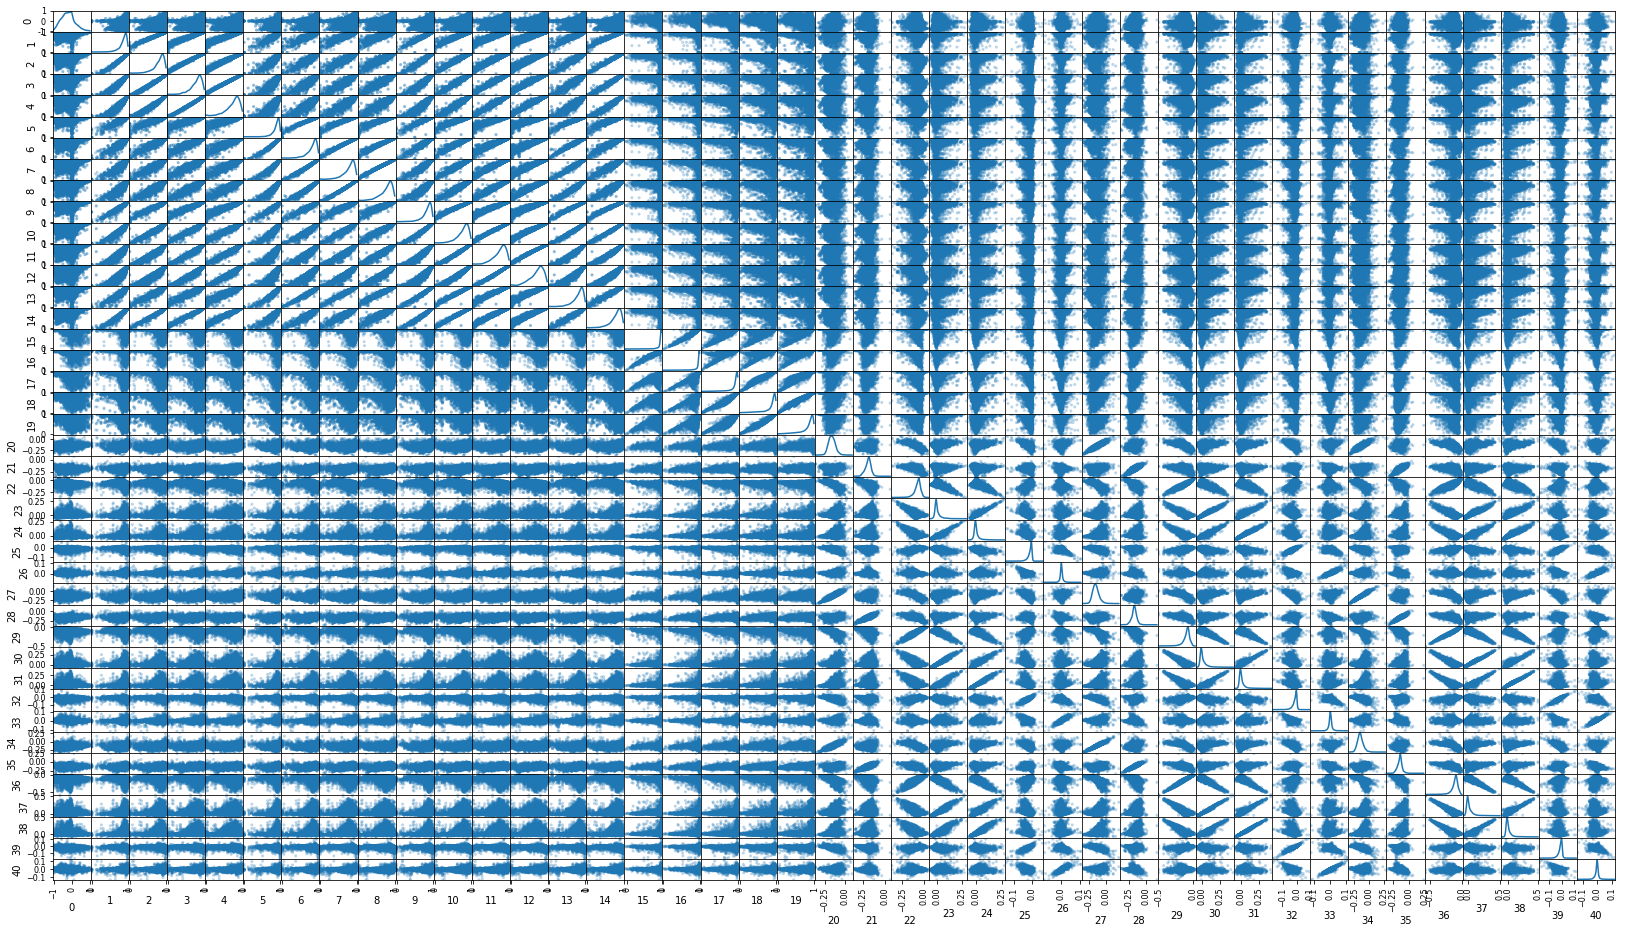

In [10]:
#PLOT SCATTER MATRIX

pd.plotting.scatter_matrix(X, alpha = 0.3, figsize = (28, 16), diagonal = 'kde');

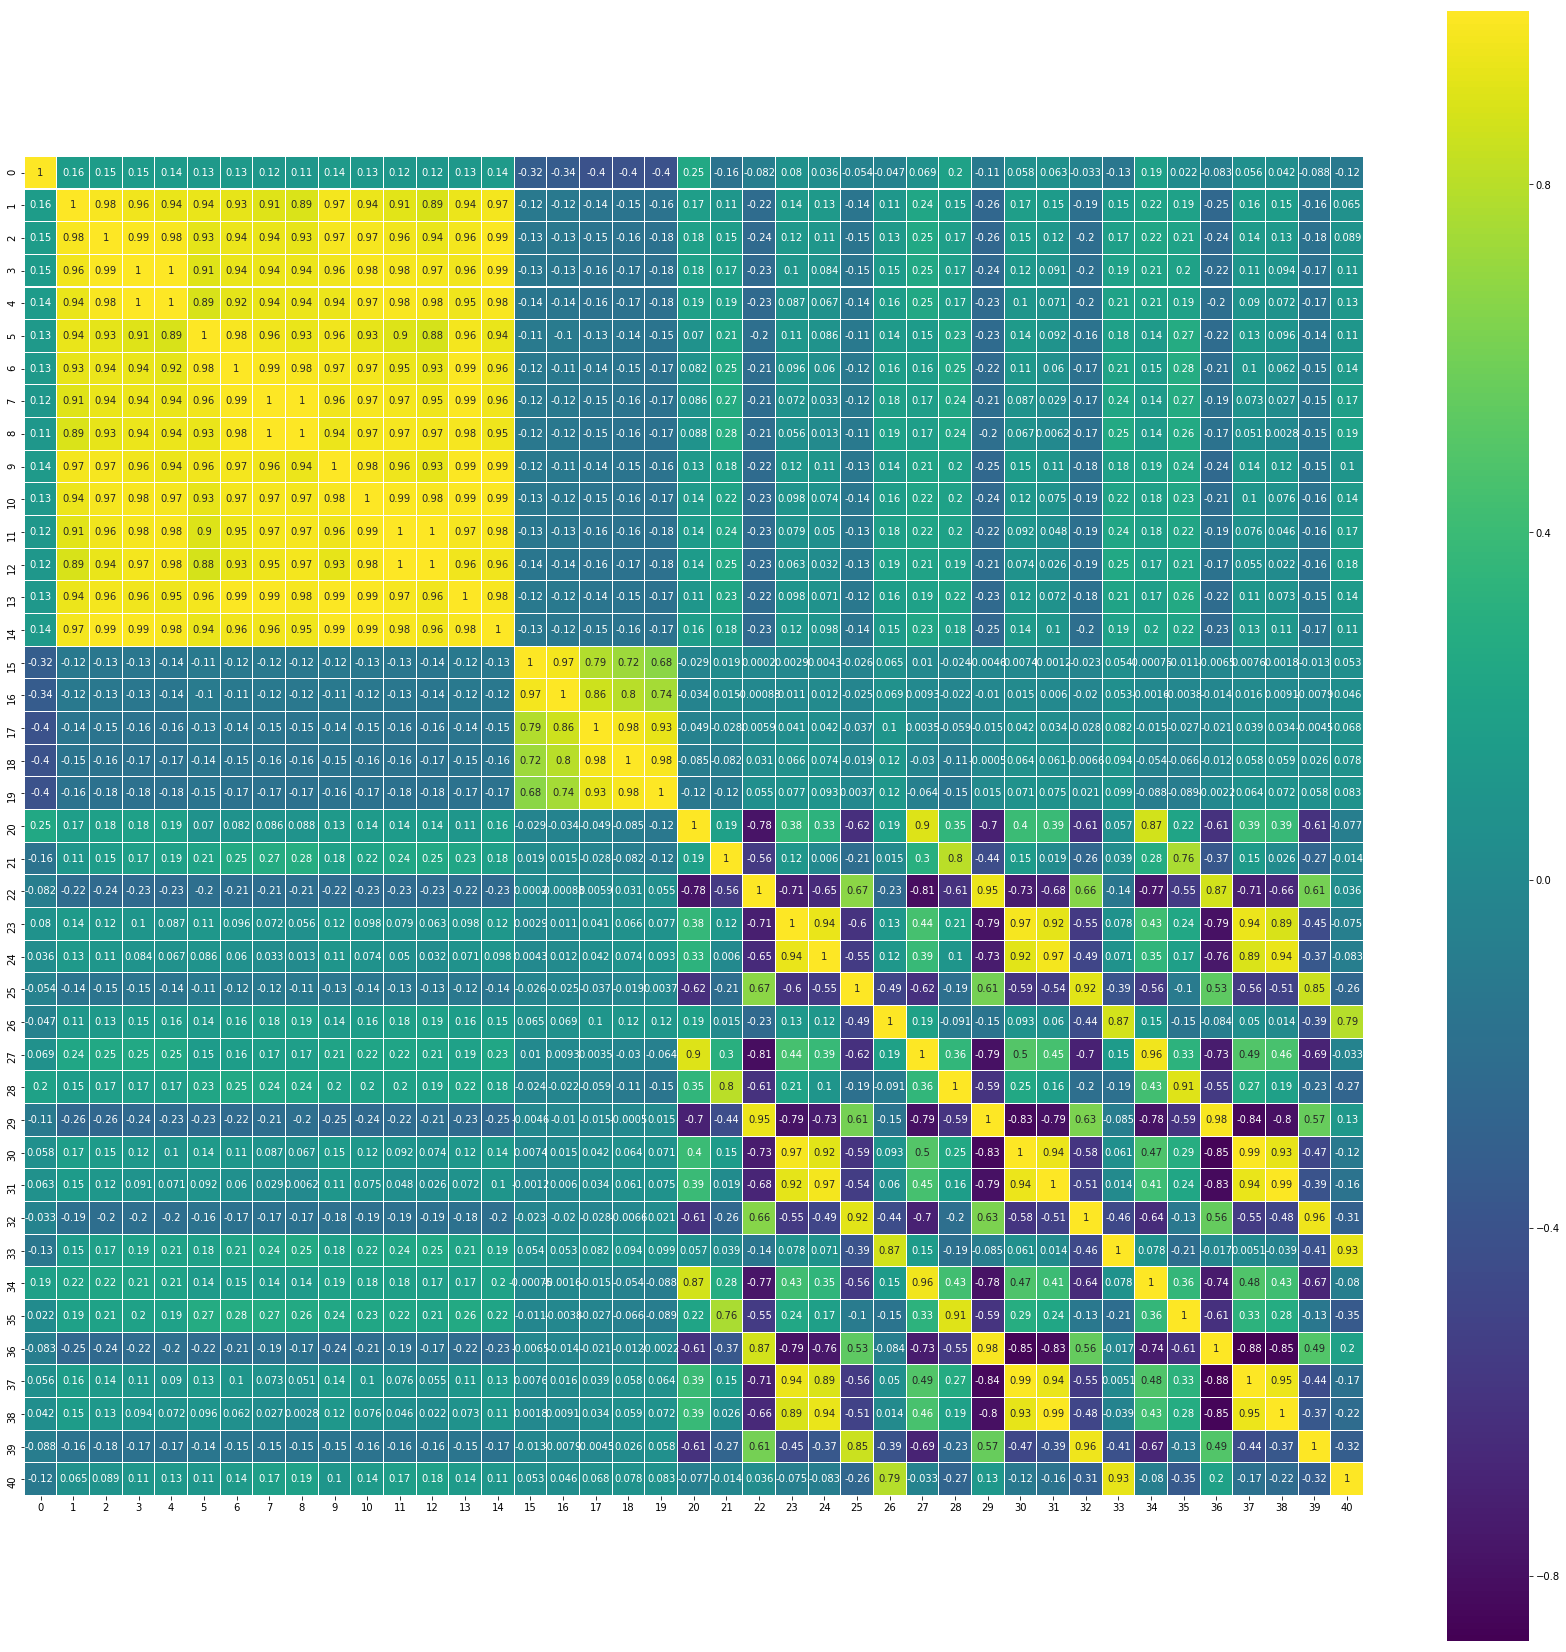

In [12]:
#PLOT CORRELATION HEATMAP

plt.figure(figsize = (30, 30))
sns.heatmap(X.corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = plt.cm.viridis, annot = True)

C:\Users\PADIAQ\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


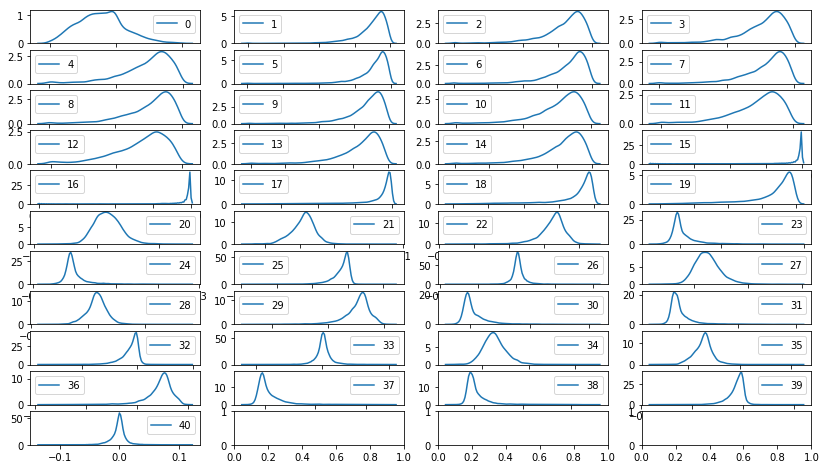

In [13]:
#PLOT KERNEL DENSITY ESTIMATION

fig, ax = plt.subplots(figsize = (14, 8), ncols = 4, nrows = 11)

r = 0
c = 0
for i in range(0, 41):
    sns.kdeplot(X[i], ax = ax[r][c])
    c += 1
    if c == 4:
        c = 0
        r += 1

In [14]:
#OUTLIERS DETECTION

dic = {}

for feature in X.keys():
    Q1 = np.percentile(X[feature], 25)
    Q3 = np.percentile(X[feature], 75)
    step = 1.5 * (Q3 - Q1)
    
    print("Data points considered outliers for the feature '{}':".format(feature))
    outliers = X[~((X[feature] >= Q1 - step) & (X[feature] <= Q3 + step))]
    display(outliers)
    
    for key in outliers.index:
        if key in dic.keys():
            dic[key] += 1
        else:
            dic[key] = 1

Data points considered outliers for the feature '0':


0         1         2         3         4         5         6   \
176   0.796061  0.948710  0.901692  0.858347  0.818808  0.982658  0.967588   
253   0.759560  0.989835  0.983067  0.977388  0.971961  0.992051  0.985643   
264   0.875450  0.993282  0.988022  0.983484  0.979176  0.994833  0.990636   
397   0.727050  0.992794  0.986892  0.982070  0.977275  0.986072  0.975897   
538   0.805149  0.968601  0.950531  0.939220  0.929965  0.961474  0.941111   
879   0.709542  0.958458  0.934236  0.914895  0.895429  0.961175  0.936557   
1028  0.853626  0.967810  0.962222  0.968663  0.961586  0.963726  0.968518   
1087  0.971360  0.994834  0.990125  0.985736  0.981592  0.997444  0.995202   
1173  0.702262  0.950630  0.917204  0.904983  0.903242  0.930929  0.908131   
1486  0.750497  0.952144  0.924511  0.912593  0.903464  0.964076  0.942331   
1497  0.821267  0.959235  0.936714  0.925503  0.916938  0.968518  0.949572   
1526  0.796726  0.991267  0.982961  0.974851  0.967172  0.997253  0.995292   
1583  0.965826  0.994305  0.989378  0.984650  0.979881  0.995004  0.990846   
1783  0.849119  0.994207  0.988702  0.983274  0.977838  0.998280  0.997180   
1827  0.711264  0.981526  0.969556  0.962431  0.956339  0.990792  0.984111   
1841  0.772307  0.991802  0.986242  0.981511  0.977240  0.989042  0.980609   
1851  0.840661  0.991982  0.985757  0.980340  0.975309  0.996053  0.993853   
1944  0.865049  0.994072  0.989500  0.985235  0.980849  0.995222  0.991338   
2267  0.913446  0.990872  0.984020  0.978529  0.973728  0.982930  0.968971   
2294  0.849549  0.995810  0.991777  0.987792  0.983806  0.998163  0.996858   
2337  0.822810  0.986575  0.975680  0.966237  0.957399  0.995917  0.993192   
2574  0.700354  0.978195  0.968431  0.963288  0.959475  0.976483  0.963953   
2616  0.708486  0.990756  0.984060  0.978107  0.972279  0.993597  0.988312   
2656  0.762115  0.991867  0.986261  0.981552  0.977156  0.989061  0.980500   
2769  0.707312  0.907176  0.819641  0.745883  0.690127  0.855974  0.727308   
3271  0.761223  0.994189  0.989617  0.985245  0.981185  0.995597  0.992673   
3283  0.725427  0.944636  0.911791  0.890066  0.872112  0.943578  0.908634   
3290  0.792850  0.953650  0.937274  0.929885  0.922662  0.963207  0.946841   
3292  0.940407  0.984422  0.970725  0.959884  0.950937  0.986677  0.975612   
3293  0.925438  0.974334  0.960716  0.952956  0.945983  0.976951  0.965837   
...        ...       ...       ...       ...       ...       ...       ...   
7290  0.822797  0.986333  0.975549  0.966086  0.957284  0.995621  0.992950   
7527  0.700242  0.978119  0.968308  0.963226  0.959382  0.976422  0.963876   
7569  0.708393  0.990685  0.983796  0.977947  0.972136  0.993440  0.988224   
7609  0.762120  0.991882  0.986293  0.981552  0.977156  0.989077  0.980548   
7722  0.707427  0.907294  0.819794  0.746025  0.690274  0.855942  0.727201   
8224  0.761067  0.994173  0.989601  0.985230  0.981169  0.995597  0.992657   
8236  0.725428  0.944514  0.911669  0.890027  0.872041  0.943393  0.908429   
8243  0.792651  0.953629  0.937335  0.930009  0.922744  0.963269  0.946840   
8245  0.940436  0.984405  0.970725  0.959884  0.950955  0.986695  0.975647   
8246  0.925493  0.974271  0.960674  0.952935  0.945940  0.976909  0.965774   
8593  0.729486  0.947726  0.926526  0.919394  0.911416  0.947627  0.927895   
8596  0.863995  0.980116  0.964939  0.953760  0.943494  0.985826  0.976949   
8597  0.854598  0.971628  0.958404  0.949487  0.941769  0.985174  0.977850   
8605  0.945818  0.990125  0.983443  0.978315  0.972648  0.994092  0.990488   
8606  0.704670  0.980601  0.968932  0.961650  0.956162  0.978696  0.968757   
8621  0.873802  0.986824  0.979872  0.974486  0.969027  0.985190  0.977186   
8633  0.826801  0.935889  0.908662  0.895467  0.884235  0.932113  0.905406   
8635  0.974019  0.995005  0.991100  0.987380  0.983690  0.992408  0.987303   
8641  0.923418  0.990657  0.984141  0.979422  0.975113  0.988638  0.982138   
8643  0.701791  0.991310  0.984706

Data points considered outliers for the feature '1':


0         1         2         3         4         5         6   \
37   -0.290443  0.453738  0.280600  0.247069  0.210558  0.779788  0.628877   
118  -0.571108  0.582792  0.396569  0.334071  0.288705  0.657844  0.519643   
124  -0.329232  0.517383  0.355044  0.316503  0.283509  0.569142  0.424080   
141  -0.091721  0.506637  0.283139  0.200238  0.151830  0.625385  0.434757   
152  -0.022761  0.442886  0.174645  0.097266  0.045680  0.618274  0.391300   
156  -0.001158 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
163   0.100491  0.456561  0.236542  0.169833  0.125504  0.466590  0.251438   
170  -0.002070 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027   
183  -0.576928  0.550656  0.327960  0.242329  0.190229  0.609560  0.411717   
190  -0.560344  0.565972  0.376866  0.315423  0.273153  0.643553  0.505680   
204  -0.008867  0.597435  0.426649  0.329148  0.253121  0.743822  0.621832   
209  -0.007274  0.581642  0.317894  0.145094  0.035956  0.645305  0.381558   
227   0.062697  0.307658  0.153804 -0.000050 -0.000050  0.230731 -0.000050   
265  -0.001347  0.499996 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
276  -0.238113  0.593896  0.396400  0.323380  0.277136  0.370110  0.225904   
363  -0.006477  0.597309  0.389861  0.243426  0.145803  0.664424  0.456976   
386   0.004401  0.433268  0.237236  0.101608  0.033794  0.366594  0.299920   
407  -0.028073  0.452800  0.364944  0.322271  0.231904  0.575794  0.417657   
411  -0.029387  0.551026  0.378221  0.282815  0.224076  0.518695  0.290628   
413  -0.078701  0.499029  0.295398  0.221107  0.164641  0.567788  0.364344   
415  -0.002380  0.287119  0.149142  0.091651  0.057156  0.508517  0.300351   
479   0.063075  0.350114  0.196149  0.142158  0.095226  0.474453  0.355806   
482  -0.006040  0.592954  0.271522  0.117986  0.036011  0.715391  0.456655   
492  -0.004749  0.249943 -0.000077 -0.000077 -0.000077  0.699977  0.449958   
504  -0.703520  0.618163  0.438716  0.378795  0.336994  0.571004  0.404850   
542   0.139797  0.553749  0.339329  0.253964  0.196943  0.623229  0.444027   
582  -0.001064 -0.000031 -0.000031 -0.000031 -0.000031  0.374981  0.124973   
596  -0.168875  0.470760  0.290055  0.269164  0.240519  0.556245  0.365026   
627  -0.011411  0.542290  0.346465  0.280415  0.235361  0.557584  0.380307   
659  -0.025468  0.619295  0.465241  0.440833  0.422474  0.679930  0.517708   
...        ...       ...       ...       ...       ...       ...       ...   
9809 -0.002968  0.562446  0.312416  0.124893 -0.000123  0.468685  0.218654   
9815 -0.035740  0.582479  0.431740  0.347675  0.288591  0.517591  0.257511   
9828  0.047734  0.585794  0.359513  0.295453  0.253101  0.654828  0.443889   
9829  0.035239  0.638110  0.446412  0.346193  0.272347  0.655926  0.469216   
9830  0.003048  0.642366  0.453557  0.376945  0.327140  0.697302  0.532789   
9840 -0.080732  0.493367  0.307316  0.220539  0.159991  0.506525  0.336033   
9841 -0.207475  0.497527  0.296168  0.215159  0.164952  0.569876  0.377114   
9842 -0.189350  0.542196  0.357883  0.274359  0.215316  0.692456  0.539734   
9843 -0.335929  0.631414  0.458663  0.378875  0.326617  0.707026  0.564178   
9853 -0.185194  0.590450  0.430175  0.365616  0.301588  0.627517  0.461938   
9856 -0.291298  0.634037  0.459072  0.393997  0.362420  0.749804  0.617511   
9863 -0.280096  0.618148  0.459498  0.416552  0.413911  0.621596  0.449580   
9865 -0.000200  0.299946  0.149935  0.049927 -0.000077  0.499962  0.249943   
9866 -0.004821  0.311042  0.084534  0.009078  0.009077  0.312523  0.142519   
9867 -0.002423 -0.000027 -0.000027 -0.000027 -0.000027  0.428556 -0.000027   
9868 -0.006118  0.335481  0.163750  0.081617  0.066683  0.216016  0.044801   
9869 -0.000477 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
9875 -0.029800  0.381420  0.195749  0.116579  0.085223  0.394326  0.224908   
9878 -0.045849  0.567921  0.496070  0.522012  0.498059  0.586391  0.496073   
9882 -0.001326 -0.000008 -0.000008

Data points considered outliers for the feature '2':


0         1         2         3         4         5         6   \
37   -0.290443  0.453738  0.280600  0.247069  0.210558  0.779788  0.628877   
118  -0.571108  0.582792  0.396569  0.334071  0.288705  0.657844  0.519643   
124  -0.329232  0.517383  0.355044  0.316503  0.283509  0.569142  0.424080   
141  -0.091721  0.506637  0.283139  0.200238  0.151830  0.625385  0.434757   
152  -0.022761  0.442886  0.174645  0.097266  0.045680  0.618274  0.391300   
156  -0.001158 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
163   0.100491  0.456561  0.236542  0.169833  0.125504  0.466590  0.251438   
170  -0.002070 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027   
183  -0.576928  0.550656  0.327960  0.242329  0.190229  0.609560  0.411717   
190  -0.560344  0.565972  0.376866  0.315423  0.273153  0.643553  0.505680   
204  -0.008867  0.597435  0.426649  0.329148  0.253121  0.743822  0.621832   
209  -0.007274  0.581642  0.317894  0.145094  0.035956  0.645305  0.381558   
227   0.062697  0.307658  0.153804 -0.000050 -0.000050  0.230731 -0.000050   
265  -0.001347  0.499996 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
275  -0.500975  0.685660  0.454039  0.288596  0.172784  0.789061  0.669115   
276  -0.238113  0.593896  0.396400  0.323380  0.277136  0.370110  0.225904   
363  -0.006477  0.597309  0.389861  0.243426  0.145803  0.664424  0.456976   
367   0.000305  0.676645  0.464443  0.343185  0.262345  0.656436  0.434129   
386   0.004401  0.433268  0.237236  0.101608  0.033794  0.366594  0.299920   
407  -0.028073  0.452800  0.364944  0.322271  0.231904  0.575794  0.417657   
411  -0.029387  0.551026  0.378221  0.282815  0.224076  0.518695  0.290628   
413  -0.078701  0.499029  0.295398  0.221107  0.164641  0.567788  0.364344   
415  -0.002380  0.287119  0.149142  0.091651  0.057156  0.508517  0.300351   
479   0.063075  0.350114  0.196149  0.142158  0.095226  0.474453  0.355806   
482  -0.006040  0.592954  0.271522  0.117986  0.036011  0.715391  0.456655   
492  -0.004749  0.249943 -0.000077 -0.000077 -0.000077  0.699977  0.449958   
504  -0.703520  0.618163  0.438716  0.378795  0.336994  0.571004  0.404850   
542   0.139797  0.553749  0.339329  0.253964  0.196943  0.623229  0.444027   
582  -0.001064 -0.000031 -0.000031 -0.000031 -0.000031  0.374981  0.124973   
596  -0.168875  0.470760  0.290055  0.269164  0.240519  0.556245  0.365026   
...        ...       ...       ...       ...       ...       ...       ...   
9807 -0.002752  0.333265 -0.000103 -0.000104 -0.000104  0.666632  0.444387   
9809 -0.002968  0.562446  0.312416  0.124893 -0.000123  0.468685  0.218654   
9815 -0.035740  0.582479  0.431740  0.347675  0.288591  0.517591  0.257511   
9828  0.047734  0.585794  0.359513  0.295453  0.253101  0.654828  0.443889   
9829  0.035239  0.638110  0.446412  0.346193  0.272347  0.655926  0.469216   
9830  0.003048  0.642366  0.453557  0.376945  0.327140  0.697302  0.532789   
9840 -0.080732  0.493367  0.307316  0.220539  0.159991  0.506525  0.336033   
9841 -0.207475  0.497527  0.296168  0.215159  0.164952  0.569876  0.377114   
9842 -0.189350  0.542196  0.357883  0.274359  0.215316  0.692456  0.539734   
9843 -0.335929  0.631414  0.458663  0.378875  0.326617  0.707026  0.564178   
9853 -0.185194  0.590450  0.430175  0.365616  0.301588  0.627517  0.461938   
9856 -0.291298  0.634037  0.459072  0.393997  0.362420  0.749804  0.617511   
9863 -0.280096  0.618148  0.459498  0.416552  0.413911  0.621596  0.449580   
9865 -0.000200  0.299946  0.149935  0.049927 -0.000077  0.499962  0.249943   
9866 -0.004821  0.311042  0.084534  0.009078  0.009077  0.312523  0.142519   
9867 -0.002423 -0.000027 -0.000027 -0.000027 -0.000027  0.428556 -0.000027   
9868 -0.006118  0.335481  0.163750  0.081617  0.066683  0.216016  0.044801   
9869 -0.000477 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
9875 -0.029800  0.381420  0.195749  0.116579  0.085223  0.394326  0.224908   
9882 -0.001326 -0.000008 -0.000008

Data points considered outliers for the feature '3':


0         1         2         3         4         5         6   \
37   -0.290443  0.453738  0.280600  0.247069  0.210558  0.779788  0.628877   
118  -0.571108  0.582792  0.396569  0.334071  0.288705  0.657844  0.519643   
124  -0.329232  0.517383  0.355044  0.316503  0.283509  0.569142  0.424080   
141  -0.091721  0.506637  0.283139  0.200238  0.151830  0.625385  0.434757   
152  -0.022761  0.442886  0.174645  0.097266  0.045680  0.618274  0.391300   
156  -0.001158 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
163   0.100491  0.456561  0.236542  0.169833  0.125504  0.466590  0.251438   
170  -0.002070 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027   
183  -0.576928  0.550656  0.327960  0.242329  0.190229  0.609560  0.411717   
190  -0.560344  0.565972  0.376866  0.315423  0.273153  0.643553  0.505680   
204  -0.008867  0.597435  0.426649  0.329148  0.253121  0.743822  0.621832   
209  -0.007274  0.581642  0.317894  0.145094  0.035956  0.645305  0.381558   
227   0.062697  0.307658  0.153804 -0.000050 -0.000050  0.230731 -0.000050   
265  -0.001347  0.499996 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
275  -0.500975  0.685660  0.454039  0.288596  0.172784  0.789061  0.669115   
276  -0.238113  0.593896  0.396400  0.323380  0.277136  0.370110  0.225904   
363  -0.006477  0.597309  0.389861  0.243426  0.145803  0.664424  0.456976   
367   0.000305  0.676645  0.464443  0.343185  0.262345  0.656436  0.434129   
386   0.004401  0.433268  0.237236  0.101608  0.033794  0.366594  0.299920   
407  -0.028073  0.452800  0.364944  0.322271  0.231904  0.575794  0.417657   
411  -0.029387  0.551026  0.378221  0.282815  0.224076  0.518695  0.290628   
413  -0.078701  0.499029  0.295398  0.221107  0.164641  0.567788  0.364344   
415  -0.002380  0.287119  0.149142  0.091651  0.057156  0.508517  0.300351   
479   0.063075  0.350114  0.196149  0.142158  0.095226  0.474453  0.355806   
482  -0.006040  0.592954  0.271522  0.117986  0.036011  0.715391  0.456655   
492  -0.004749  0.249943 -0.000077 -0.000077 -0.000077  0.699977  0.449958   
542   0.139797  0.553749  0.339329  0.253964  0.196943  0.623229  0.444027   
582  -0.001064 -0.000031 -0.000031 -0.000031 -0.000031  0.374981  0.124973   
596  -0.168875  0.470760  0.290055  0.269164  0.240519  0.556245  0.365026   
602  -0.180885  0.722136  0.501011  0.339700  0.226238  0.735034  0.564541   
...        ...       ...       ...       ...       ...       ...       ...   
9805 -0.002161  0.666655  0.444425  0.333310  0.222195  0.111081 -0.000034   
9806 -0.019979  0.337246  0.134460  0.077579  0.050373  0.544975  0.314987   
9807 -0.002752  0.333265 -0.000103 -0.000104 -0.000104  0.666632  0.444387   
9808 -0.005707  0.701358  0.480769  0.341628  0.239816  0.796381  0.653846   
9809 -0.002968  0.562446  0.312416  0.124893 -0.000123  0.468685  0.218654   
9815 -0.035740  0.582479  0.431740  0.347675  0.288591  0.517591  0.257511   
9826 -0.017870  0.654731  0.478472  0.352725  0.244674  0.799816  0.685083   
9828  0.047734  0.585794  0.359513  0.295453  0.253101  0.654828  0.443889   
9829  0.035239  0.638110  0.446412  0.346193  0.272347  0.655926  0.469216   
9840 -0.080732  0.493367  0.307316  0.220539  0.159991  0.506525  0.336033   
9841 -0.207475  0.497527  0.296168  0.215159  0.164952  0.569876  0.377114   
9842 -0.189350  0.542196  0.357883  0.274359  0.215316  0.692456  0.539734   
9853 -0.185194  0.590450  0.430175  0.365616  0.301588  0.627517  0.461938   
9865 -0.000200  0.299946  0.149935  0.049927 -0.000077  0.499962  0.249943   
9866 -0.004821  0.311042  0.084534  0.009078  0.009077  0.312523  0.142519   
9867 -0.002423 -0.000027 -0.000027 -0.000027 -0.000027  0.428556 -0.000027   
9868 -0.006118  0.335481  0.163750  0.081617  0.066683  0.216016  0.044801   
9869 -0.000477 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
9875 -0.029800  0.381420  0.195749  0.116579  0.085223  0.394326  0.224908   
9882 -0.001326 -0.000008 -0.000008

Data points considered outliers for the feature '4':


0         1         2         3         4         5         6   \
37   -0.290443  0.453738  0.280600  0.247069  0.210558  0.779788  0.628877   
118  -0.571108  0.582792  0.396569  0.334071  0.288705  0.657844  0.519643   
124  -0.329232  0.517383  0.355044  0.316503  0.283509  0.569142  0.424080   
141  -0.091721  0.506637  0.283139  0.200238  0.151830  0.625385  0.434757   
152  -0.022761  0.442886  0.174645  0.097266  0.045680  0.618274  0.391300   
156  -0.001158 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
163   0.100491  0.456561  0.236542  0.169833  0.125504  0.466590  0.251438   
170  -0.002070 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027   
183  -0.576928  0.550656  0.327960  0.242329  0.190229  0.609560  0.411717   
190  -0.560344  0.565972  0.376866  0.315423  0.273153  0.643553  0.505680   
204  -0.008867  0.597435  0.426649  0.329148  0.253121  0.743822  0.621832   
209  -0.007274  0.581642  0.317894  0.145094  0.035956  0.645305  0.381558   
227   0.062697  0.307658  0.153804 -0.000050 -0.000050  0.230731 -0.000050   
265  -0.001347  0.499996 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
275  -0.500975  0.685660  0.454039  0.288596  0.172784  0.789061  0.669115   
276  -0.238113  0.593896  0.396400  0.323380  0.277136  0.370110  0.225904   
363  -0.006477  0.597309  0.389861  0.243426  0.145803  0.664424  0.456976   
367   0.000305  0.676645  0.464443  0.343185  0.262345  0.656436  0.434129   
386   0.004401  0.433268  0.237236  0.101608  0.033794  0.366594  0.299920   
407  -0.028073  0.452800  0.364944  0.322271  0.231904  0.575794  0.417657   
411  -0.029387  0.551026  0.378221  0.282815  0.224076  0.518695  0.290628   
413  -0.078701  0.499029  0.295398  0.221107  0.164641  0.567788  0.364344   
415  -0.002380  0.287119  0.149142  0.091651  0.057156  0.508517  0.300351   
479   0.063075  0.350114  0.196149  0.142158  0.095226  0.474453  0.355806   
482  -0.006040  0.592954  0.271522  0.117986  0.036011  0.715391  0.456655   
492  -0.004749  0.249943 -0.000077 -0.000077 -0.000077  0.699977  0.449958   
542   0.139797  0.553749  0.339329  0.253964  0.196943  0.623229  0.444027   
582  -0.001064 -0.000031 -0.000031 -0.000031 -0.000031  0.374981  0.124973   
596  -0.168875  0.470760  0.290055  0.269164  0.240519  0.556245  0.365026   
602  -0.180885  0.722136  0.501011  0.339700  0.226238  0.735034  0.564541   
...        ...       ...       ...       ...       ...       ...       ...   
9799 -0.006807  0.460001  0.183607  0.101837  0.030287  0.504659  0.271557   
9805 -0.002161  0.666655  0.444425  0.333310  0.222195  0.111081 -0.000034   
9806 -0.019979  0.337246  0.134460  0.077579  0.050373  0.544975  0.314987   
9807 -0.002752  0.333265 -0.000103 -0.000104 -0.000104  0.666632  0.444387   
9808 -0.005707  0.701358  0.480769  0.341628  0.239816  0.796381  0.653846   
9809 -0.002968  0.562446  0.312416  0.124893 -0.000123  0.468685  0.218654   
9815 -0.035740  0.582479  0.431740  0.347675  0.288591  0.517591  0.257511   
9826 -0.017870  0.654731  0.478472  0.352725  0.244674  0.799816  0.685083   
9828  0.047734  0.585794  0.359513  0.295453  0.253101  0.654828  0.443889   
9829  0.035239  0.638110  0.446412  0.346193  0.272347  0.655926  0.469216   
9840 -0.080732  0.493367  0.307316  0.220539  0.159991  0.506525  0.336033   
9841 -0.207475  0.497527  0.296168  0.215159  0.164952  0.569876  0.377114   
9842 -0.189350  0.542196  0.357883  0.274359  0.215316  0.692456  0.539734   
9865 -0.000200  0.299946  0.149935  0.049927 -0.000077  0.499962  0.249943   
9866 -0.004821  0.311042  0.084534  0.009078  0.009077  0.312523  0.142519   
9867 -0.002423 -0.000027 -0.000027 -0.000027 -0.000027  0.428556 -0.000027   
9868 -0.006118  0.335481  0.163750  0.081617  0.066683  0.216016  0.044801   
9869 -0.000477 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
9875 -0.029800  0.381420  0.195749  0.116579  0.085223  0.394326  0.224908   
9882 -0.001326 -0.000008 -0.000008

Data points considered outliers for the feature '5':


0         1         2         3         4         5         6   \
27   -0.003581  0.695850  0.560589  0.510510  0.462601  0.603975  0.437303   
61   -0.024177  0.806233  0.682804  0.596395  0.523559  0.644801  0.458915   
89   -0.690262  0.676423  0.534944  0.487151  0.451520  0.645222  0.515323   
118  -0.571108  0.582792  0.396569  0.334071  0.288705  0.657844  0.519643   
124  -0.329232  0.517383  0.355044  0.316503  0.283509  0.569142  0.424080   
141  -0.091721  0.506637  0.283139  0.200238  0.151830  0.625385  0.434757   
152  -0.022761  0.442886  0.174645  0.097266  0.045680  0.618274  0.391300   
156  -0.001158 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
163   0.100491  0.456561  0.236542  0.169833  0.125504  0.466590  0.251438   
170  -0.002070 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027   
183  -0.576928  0.550656  0.327960  0.242329  0.190229  0.609560  0.411717   
190  -0.560344  0.565972  0.376866  0.315423  0.273153  0.643553  0.505680   
209  -0.007274  0.581642  0.317894  0.145094  0.035956  0.645305  0.381558   
227   0.062697  0.307658  0.153804 -0.000050 -0.000050  0.230731 -0.000050   
265  -0.001347  0.499996 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
276  -0.238113  0.593896  0.396400  0.323380  0.277136  0.370110  0.225904   
293  -0.050534  0.663359  0.543004  0.504599  0.467968  0.665126  0.521657   
363  -0.006477  0.597309  0.389861  0.243426  0.145803  0.664424  0.456976   
367   0.000305  0.676645  0.464443  0.343185  0.262345  0.656436  0.434129   
386   0.004401  0.433268  0.237236  0.101608  0.033794  0.366594  0.299920   
407  -0.028073  0.452800  0.364944  0.322271  0.231904  0.575794  0.417657   
411  -0.029387  0.551026  0.378221  0.282815  0.224076  0.518695  0.290628   
413  -0.078701  0.499029  0.295398  0.221107  0.164641  0.567788  0.364344   
415  -0.002380  0.287119  0.149142  0.091651  0.057156  0.508517  0.300351   
448  -0.290835  0.649366  0.473315  0.402471  0.356755  0.346048  0.232896   
479   0.063075  0.350114  0.196149  0.142158  0.095226  0.474453  0.355806   
504  -0.703520  0.618163  0.438716  0.378795  0.336994  0.571004  0.404850   
542   0.139797  0.553749  0.339329  0.253964  0.196943  0.623229  0.444027   
582  -0.001064 -0.000031 -0.000031 -0.000031 -0.000031  0.374981  0.124973   
596  -0.168875  0.470760  0.290055  0.269164  0.240519  0.556245  0.365026   
...        ...       ...       ...       ...       ...       ...       ...   
9793 -0.008132  0.252625  0.080153  0.011164  0.022662  0.210301  0.046762   
9794 -0.005678  0.322259  0.152824  0.039866  0.015660  0.281918  0.160892   
9795 -0.003828  0.527713  0.277678  0.138770  0.055425  0.499931  0.110989   
9799 -0.006807  0.460001  0.183607  0.101837  0.030287  0.504659  0.271557   
9805 -0.002161  0.666655  0.444425  0.333310  0.222195  0.111081 -0.000034   
9806 -0.019979  0.337246  0.134460  0.077579  0.050373  0.544975  0.314987   
9807 -0.002752  0.333265 -0.000103 -0.000104 -0.000104  0.666632  0.444387   
9809 -0.002968  0.562446  0.312416  0.124893 -0.000123  0.468685  0.218654   
9810 -0.012052  0.761288  0.652402  0.572830  0.510010  0.652402  0.535139   
9815 -0.035740  0.582479  0.431740  0.347675  0.288591  0.517591  0.257511   
9828  0.047734  0.585794  0.359513  0.295453  0.253101  0.654828  0.443889   
9829  0.035239  0.638110  0.446412  0.346193  0.272347  0.655926  0.469216   
9840 -0.080732  0.493367  0.307316  0.220539  0.159991  0.506525  0.336033   
9841 -0.207475  0.497527  0.296168  0.215159  0.164952  0.569876  0.377114   
9853 -0.185194  0.590450  0.430175  0.365616  0.301588  0.627517  0.461938   
9863 -0.280096  0.618148  0.459498  0.416552  0.413911  0.621596  0.449580   
9865 -0.000200  0.299946  0.149935  0.049927 -0.000077  0.499962  0.249943   
9866 -0.004821  0.311042  0.084534  0.009078  0.009077  0.312523  0.142519   
9867 -0.002423 -0.000027 -0.000027 -0.000027 -0.000027  0.428556 -0.000027   
9868 -0.006118  0.335481  0.163750

Data points considered outliers for the feature '6':


0         1         2         3         4         5         6   \
27   -0.003581  0.695850  0.560589  0.510510  0.462601  0.603975  0.437303   
61   -0.024177  0.806233  0.682804  0.596395  0.523559  0.644801  0.458915   
89   -0.690262  0.676423  0.534944  0.487151  0.451520  0.645222  0.515323   
124  -0.329232  0.517383  0.355044  0.316503  0.283509  0.569142  0.424080   
141  -0.091721  0.506637  0.283139  0.200238  0.151830  0.625385  0.434757   
152  -0.022761  0.442886  0.174645  0.097266  0.045680  0.618274  0.391300   
156  -0.001158 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
163   0.100491  0.456561  0.236542  0.169833  0.125504  0.466590  0.251438   
170  -0.002070 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027   
183  -0.576928  0.550656  0.327960  0.242329  0.190229  0.609560  0.411717   
190  -0.560344  0.565972  0.376866  0.315423  0.273153  0.643553  0.505680   
209  -0.007274  0.581642  0.317894  0.145094  0.035956  0.645305  0.381558   
227   0.062697  0.307658  0.153804 -0.000050 -0.000050  0.230731 -0.000050   
265  -0.001347  0.499996 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
276  -0.238113  0.593896  0.396400  0.323380  0.277136  0.370110  0.225904   
363  -0.006477  0.597309  0.389861  0.243426  0.145803  0.664424  0.456976   
367   0.000305  0.676645  0.464443  0.343185  0.262345  0.656436  0.434129   
386   0.004401  0.433268  0.237236  0.101608  0.033794  0.366594  0.299920   
407  -0.028073  0.452800  0.364944  0.322271  0.231904  0.575794  0.417657   
411  -0.029387  0.551026  0.378221  0.282815  0.224076  0.518695  0.290628   
413  -0.078701  0.499029  0.295398  0.221107  0.164641  0.567788  0.364344   
415  -0.002380  0.287119  0.149142  0.091651  0.057156  0.508517  0.300351   
448  -0.290835  0.649366  0.473315  0.402471  0.356755  0.346048  0.232896   
479   0.063075  0.350114  0.196149  0.142158  0.095226  0.474453  0.355806   
482  -0.006040  0.592954  0.271522  0.117986  0.036011  0.715391  0.456655   
492  -0.004749  0.249943 -0.000077 -0.000077 -0.000077  0.699977  0.449958   
504  -0.703520  0.618163  0.438716  0.378795  0.336994  0.571004  0.404850   
542   0.139797  0.553749  0.339329  0.253964  0.196943  0.623229  0.444027   
582  -0.001064 -0.000031 -0.000031 -0.000031 -0.000031  0.374981  0.124973   
596  -0.168875  0.470760  0.290055  0.269164  0.240519  0.556245  0.365026   
...        ...       ...       ...       ...       ...       ...       ...   
9793 -0.008132  0.252625  0.080153  0.011164  0.022662  0.210301  0.046762   
9794 -0.005678  0.322259  0.152824  0.039866  0.015660  0.281918  0.160892   
9795 -0.003828  0.527713  0.277678  0.138770  0.055425  0.499931  0.110989   
9799 -0.006807  0.460001  0.183607  0.101837  0.030287  0.504659  0.271557   
9805 -0.002161  0.666655  0.444425  0.333310  0.222195  0.111081 -0.000034   
9806 -0.019979  0.337246  0.134460  0.077579  0.050373  0.544975  0.314987   
9807 -0.002752  0.333265 -0.000103 -0.000104 -0.000104  0.666632  0.444387   
9809 -0.002968  0.562446  0.312416  0.124893 -0.000123  0.468685  0.218654   
9811 -0.020858  0.731110  0.541158  0.393143  0.296932  0.696573  0.479486   
9815 -0.035740  0.582479  0.431740  0.347675  0.288591  0.517591  0.257511   
9828  0.047734  0.585794  0.359513  0.295453  0.253101  0.654828  0.443889   
9829  0.035239  0.638110  0.446412  0.346193  0.272347  0.655926  0.469216   
9840 -0.080732  0.493367  0.307316  0.220539  0.159991  0.506525  0.336033   
9841 -0.207475  0.497527  0.296168  0.215159  0.164952  0.569876  0.377114   
9853 -0.185194  0.590450  0.430175  0.365616  0.301588  0.627517  0.461938   
9863 -0.280096  0.618148  0.459498  0.416552  0.413911  0.621596  0.449580   
9865 -0.000200  0.299946  0.149935  0.049927 -0.000077  0.499962  0.249943   
9866 -0.004821  0.311042  0.084534  0.009078  0.009077  0.312523  0.142519   
9867 -0.002423 -0.000027 -0.000027 -0.000027 -0.000027  0.428556 -0.000027   
9868 -0.006118  0.335481  0.163750

Data points considered outliers for the feature '7':


0         1         2         3         4         5         6   \
27   -0.003581  0.695850  0.560589  0.510510  0.462601  0.603975  0.437303   
61   -0.024177  0.806233  0.682804  0.596395  0.523559  0.644801  0.458915   
100  -0.249937  0.731596  0.526095  0.389810  0.304527  0.742307  0.539973   
124  -0.329232  0.517383  0.355044  0.316503  0.283509  0.569142  0.424080   
141  -0.091721  0.506637  0.283139  0.200238  0.151830  0.625385  0.434757   
152  -0.022761  0.442886  0.174645  0.097266  0.045680  0.618274  0.391300   
156  -0.001158 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
163   0.100491  0.456561  0.236542  0.169833  0.125504  0.466590  0.251438   
170  -0.002070 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027   
183  -0.576928  0.550656  0.327960  0.242329  0.190229  0.609560  0.411717   
209  -0.007274  0.581642  0.317894  0.145094  0.035956  0.645305  0.381558   
227   0.062697  0.307658  0.153804 -0.000050 -0.000050  0.230731 -0.000050   
265  -0.001347  0.499996 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
276  -0.238113  0.593896  0.396400  0.323380  0.277136  0.370110  0.225904   
363  -0.006477  0.597309  0.389861  0.243426  0.145803  0.664424  0.456976   
367   0.000305  0.676645  0.464443  0.343185  0.262345  0.656436  0.434129   
386   0.004401  0.433268  0.237236  0.101608  0.033794  0.366594  0.299920   
407  -0.028073  0.452800  0.364944  0.322271  0.231904  0.575794  0.417657   
411  -0.029387  0.551026  0.378221  0.282815  0.224076  0.518695  0.290628   
413  -0.078701  0.499029  0.295398  0.221107  0.164641  0.567788  0.364344   
415  -0.002380  0.287119  0.149142  0.091651  0.057156  0.508517  0.300351   
448  -0.290835  0.649366  0.473315  0.402471  0.356755  0.346048  0.232896   
479   0.063075  0.350114  0.196149  0.142158  0.095226  0.474453  0.355806   
482  -0.006040  0.592954  0.271522  0.117986  0.036011  0.715391  0.456655   
492  -0.004749  0.249943 -0.000077 -0.000077 -0.000077  0.699977  0.449958   
504  -0.703520  0.618163  0.438716  0.378795  0.336994  0.571004  0.404850   
542   0.139797  0.553749  0.339329  0.253964  0.196943  0.623229  0.444027   
582  -0.001064 -0.000031 -0.000031 -0.000031 -0.000031  0.374981  0.124973   
596  -0.168875  0.470760  0.290055  0.269164  0.240519  0.556245  0.365026   
627  -0.011411  0.542290  0.346465  0.280415  0.235361  0.557584  0.380307   
...        ...       ...       ...       ...       ...       ...       ...   
9788 -0.001572  0.285695 -0.000027 -0.000027 -0.000027  0.142834 -0.000027   
9793 -0.008132  0.252625  0.080153  0.011164  0.022662  0.210301  0.046762   
9794 -0.005678  0.322259  0.152824  0.039866  0.015660  0.281918  0.160892   
9795 -0.003828  0.527713  0.277678  0.138770  0.055425  0.499931  0.110989   
9799 -0.006807  0.460001  0.183607  0.101837  0.030287  0.504659  0.271557   
9805 -0.002161  0.666655  0.444425  0.333310  0.222195  0.111081 -0.000034   
9806 -0.019979  0.337246  0.134460  0.077579  0.050373  0.544975  0.314987   
9807 -0.002752  0.333265 -0.000103 -0.000104 -0.000104  0.666632  0.444387   
9809 -0.002968  0.562446  0.312416  0.124893 -0.000123  0.468685  0.218654   
9811 -0.020858  0.731110  0.541158  0.393143  0.296932  0.696573  0.479486   
9815 -0.035740  0.582479  0.431740  0.347675  0.288591  0.517591  0.257511   
9828  0.047734  0.585794  0.359513  0.295453  0.253101  0.654828  0.443889   
9829  0.035239  0.638110  0.446412  0.346193  0.272347  0.655926  0.469216   
9840 -0.080732  0.493367  0.307316  0.220539  0.159991  0.506525  0.336033   
9841 -0.207475  0.497527  0.296168  0.215159  0.164952  0.569876  0.377114   
9853 -0.185194  0.590450  0.430175  0.365616  0.301588  0.627517  0.461938   
9863 -0.280096  0.618148  0.459498  0.416552  0.413911  0.621596  0.449580   
9865 -0.000200  0.299946  0.149935  0.049927 -0.000077  0.499962  0.249943   
9866 -0.004821  0.311042  0.084534  0.009078  0.009077  0.312523  0.142519   
9867 -0.002423 -0.000027 -0.000027

Data points considered outliers for the feature '8':


0         1         2         3         4         5         6   \
27   -0.003581  0.695850  0.560589  0.510510  0.462601  0.603975  0.437303   
61   -0.024177  0.806233  0.682804  0.596395  0.523559  0.644801  0.458915   
100  -0.249937  0.731596  0.526095  0.389810  0.304527  0.742307  0.539973   
124  -0.329232  0.517383  0.355044  0.316503  0.283509  0.569142  0.424080   
141  -0.091721  0.506637  0.283139  0.200238  0.151830  0.625385  0.434757   
152  -0.022761  0.442886  0.174645  0.097266  0.045680  0.618274  0.391300   
156  -0.001158 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
163   0.100491  0.456561  0.236542  0.169833  0.125504  0.466590  0.251438   
170  -0.002070 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027   
183  -0.576928  0.550656  0.327960  0.242329  0.190229  0.609560  0.411717   
209  -0.007274  0.581642  0.317894  0.145094  0.035956  0.645305  0.381558   
227   0.062697  0.307658  0.153804 -0.000050 -0.000050  0.230731 -0.000050   
265  -0.001347  0.499996 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
276  -0.238113  0.593896  0.396400  0.323380  0.277136  0.370110  0.225904   
363  -0.006477  0.597309  0.389861  0.243426  0.145803  0.664424  0.456976   
367   0.000305  0.676645  0.464443  0.343185  0.262345  0.656436  0.434129   
386   0.004401  0.433268  0.237236  0.101608  0.033794  0.366594  0.299920   
407  -0.028073  0.452800  0.364944  0.322271  0.231904  0.575794  0.417657   
411  -0.029387  0.551026  0.378221  0.282815  0.224076  0.518695  0.290628   
413  -0.078701  0.499029  0.295398  0.221107  0.164641  0.567788  0.364344   
415  -0.002380  0.287119  0.149142  0.091651  0.057156  0.508517  0.300351   
448  -0.290835  0.649366  0.473315  0.402471  0.356755  0.346048  0.232896   
479   0.063075  0.350114  0.196149  0.142158  0.095226  0.474453  0.355806   
482  -0.006040  0.592954  0.271522  0.117986  0.036011  0.715391  0.456655   
492  -0.004749  0.249943 -0.000077 -0.000077 -0.000077  0.699977  0.449958   
504  -0.703520  0.618163  0.438716  0.378795  0.336994  0.571004  0.404850   
542   0.139797  0.553749  0.339329  0.253964  0.196943  0.623229  0.444027   
582  -0.001064 -0.000031 -0.000031 -0.000031 -0.000031  0.374981  0.124973   
596  -0.168875  0.470760  0.290055  0.269164  0.240519  0.556245  0.365026   
627  -0.011411  0.542290  0.346465  0.280415  0.235361  0.557584  0.380307   
...        ...       ...       ...       ...       ...       ...       ...   
9787 -0.002830  0.166628 -0.000046 -0.000046 -0.000046  0.333303 -0.000046   
9788 -0.001572  0.285695 -0.000027 -0.000027 -0.000027  0.142834 -0.000027   
9793 -0.008132  0.252625  0.080153  0.011164  0.022662  0.210301  0.046762   
9794 -0.005678  0.322259  0.152824  0.039866  0.015660  0.281918  0.160892   
9795 -0.003828  0.527713  0.277678  0.138770  0.055425  0.499931  0.110989   
9799 -0.006807  0.460001  0.183607  0.101837  0.030287  0.504659  0.271557   
9805 -0.002161  0.666655  0.444425  0.333310  0.222195  0.111081 -0.000034   
9806 -0.019979  0.337246  0.134460  0.077579  0.050373  0.544975  0.314987   
9807 -0.002752  0.333265 -0.000103 -0.000104 -0.000104  0.666632  0.444387   
9809 -0.002968  0.562446  0.312416  0.124893 -0.000123  0.468685  0.218654   
9811 -0.020858  0.731110  0.541158  0.393143  0.296932  0.696573  0.479486   
9815 -0.035740  0.582479  0.431740  0.347675  0.288591  0.517591  0.257511   
9828  0.047734  0.585794  0.359513  0.295453  0.253101  0.654828  0.443889   
9829  0.035239  0.638110  0.446412  0.346193  0.272347  0.655926  0.469216   
9840 -0.080732  0.493367  0.307316  0.220539  0.159991  0.506525  0.336033   
9841 -0.207475  0.497527  0.296168  0.215159  0.164952  0.569876  0.377114   
9853 -0.185194  0.590450  0.430175  0.365616  0.301588  0.627517  0.461938   
9865 -0.000200  0.299946  0.149935  0.049927 -0.000077  0.499962  0.249943   
9866 -0.004821  0.311042  0.084534  0.009078  0.009077  0.312523  0.142519   
9867 -0.002423 -0.000027 -0.000027

Data points considered outliers for the feature '9':


0         1         2         3         4         5         6   \
27   -0.003581  0.695850  0.560589  0.510510  0.462601  0.603975  0.437303   
37   -0.290443  0.453738  0.280600  0.247069  0.210558  0.779788  0.628877   
118  -0.571108  0.582792  0.396569  0.334071  0.288705  0.657844  0.519643   
124  -0.329232  0.517383  0.355044  0.316503  0.283509  0.569142  0.424080   
141  -0.091721  0.506637  0.283139  0.200238  0.151830  0.625385  0.434757   
152  -0.022761  0.442886  0.174645  0.097266  0.045680  0.618274  0.391300   
156  -0.001158 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
163   0.100491  0.456561  0.236542  0.169833  0.125504  0.466590  0.251438   
170  -0.002070 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027   
183  -0.576928  0.550656  0.327960  0.242329  0.190229  0.609560  0.411717   
190  -0.560344  0.565972  0.376866  0.315423  0.273153  0.643553  0.505680   
204  -0.008867  0.597435  0.426649  0.329148  0.253121  0.743822  0.621832   
209  -0.007274  0.581642  0.317894  0.145094  0.035956  0.645305  0.381558   
227   0.062697  0.307658  0.153804 -0.000050 -0.000050  0.230731 -0.000050   
265  -0.001347  0.499996 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
276  -0.238113  0.593896  0.396400  0.323380  0.277136  0.370110  0.225904   
363  -0.006477  0.597309  0.389861  0.243426  0.145803  0.664424  0.456976   
367   0.000305  0.676645  0.464443  0.343185  0.262345  0.656436  0.434129   
386   0.004401  0.433268  0.237236  0.101608  0.033794  0.366594  0.299920   
407  -0.028073  0.452800  0.364944  0.322271  0.231904  0.575794  0.417657   
411  -0.029387  0.551026  0.378221  0.282815  0.224076  0.518695  0.290628   
413  -0.078701  0.499029  0.295398  0.221107  0.164641  0.567788  0.364344   
415  -0.002380  0.287119  0.149142  0.091651  0.057156  0.508517  0.300351   
448  -0.290835  0.649366  0.473315  0.402471  0.356755  0.346048  0.232896   
479   0.063075  0.350114  0.196149  0.142158  0.095226  0.474453  0.355806   
482  -0.006040  0.592954  0.271522  0.117986  0.036011  0.715391  0.456655   
492  -0.004749  0.249943 -0.000077 -0.000077 -0.000077  0.699977  0.449958   
504  -0.703520  0.618163  0.438716  0.378795  0.336994  0.571004  0.404850   
542   0.139797  0.553749  0.339329  0.253964  0.196943  0.623229  0.444027   
582  -0.001064 -0.000031 -0.000031 -0.000031 -0.000031  0.374981  0.124973   
...        ...       ...       ...       ...       ...       ...       ...   
9805 -0.002161  0.666655  0.444425  0.333310  0.222195  0.111081 -0.000034   
9806 -0.019979  0.337246  0.134460  0.077579  0.050373  0.544975  0.314987   
9807 -0.002752  0.333265 -0.000103 -0.000104 -0.000104  0.666632  0.444387   
9809 -0.002968  0.562446  0.312416  0.124893 -0.000123  0.468685  0.218654   
9811 -0.020858  0.731110  0.541158  0.393143  0.296932  0.696573  0.479486   
9815 -0.035740  0.582479  0.431740  0.347675  0.288591  0.517591  0.257511   
9828  0.047734  0.585794  0.359513  0.295453  0.253101  0.654828  0.443889   
9840 -0.080732  0.493367  0.307316  0.220539  0.159991  0.506525  0.336033   
9841 -0.207475  0.497527  0.296168  0.215159  0.164952  0.569876  0.377114   
9842 -0.189350  0.542196  0.357883  0.274359  0.215316  0.692456  0.539734   
9843 -0.335929  0.631414  0.458663  0.378875  0.326617  0.707026  0.564178   
9853 -0.185194  0.590450  0.430175  0.365616  0.301588  0.627517  0.461938   
9863 -0.280096  0.618148  0.459498  0.416552  0.413911  0.621596  0.449580   
9865 -0.000200  0.299946  0.149935  0.049927 -0.000077  0.499962  0.249943   
9866 -0.004821  0.311042  0.084534  0.009078  0.009077  0.312523  0.142519   
9867 -0.002423 -0.000027 -0.000027 -0.000027 -0.000027  0.428556 -0.000027   
9868 -0.006118  0.335481  0.163750  0.081617  0.066683  0.216016  0.044801   
9869 -0.000477 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
9875 -0.029800  0.381420  0.195749  0.116579  0.085223  0.394326  0.224908   
9878 -0.045849  0.567921  0.496070

Data points considered outliers for the feature '10':


0         1         2         3         4         5         6   \
37   -0.290443  0.453738  0.280600  0.247069  0.210558  0.779788  0.628877   
124  -0.329232  0.517383  0.355044  0.316503  0.283509  0.569142  0.424080   
141  -0.091721  0.506637  0.283139  0.200238  0.151830  0.625385  0.434757   
152  -0.022761  0.442886  0.174645  0.097266  0.045680  0.618274  0.391300   
156  -0.001158 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
163   0.100491  0.456561  0.236542  0.169833  0.125504  0.466590  0.251438   
170  -0.002070 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027   
183  -0.576928  0.550656  0.327960  0.242329  0.190229  0.609560  0.411717   
190  -0.560344  0.565972  0.376866  0.315423  0.273153  0.643553  0.505680   
209  -0.007274  0.581642  0.317894  0.145094  0.035956  0.645305  0.381558   
227   0.062697  0.307658  0.153804 -0.000050 -0.000050  0.230731 -0.000050   
265  -0.001347  0.499996 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
276  -0.238113  0.593896  0.396400  0.323380  0.277136  0.370110  0.225904   
363  -0.006477  0.597309  0.389861  0.243426  0.145803  0.664424  0.456976   
367   0.000305  0.676645  0.464443  0.343185  0.262345  0.656436  0.434129   
386   0.004401  0.433268  0.237236  0.101608  0.033794  0.366594  0.299920   
407  -0.028073  0.452800  0.364944  0.322271  0.231904  0.575794  0.417657   
411  -0.029387  0.551026  0.378221  0.282815  0.224076  0.518695  0.290628   
413  -0.078701  0.499029  0.295398  0.221107  0.164641  0.567788  0.364344   
415  -0.002380  0.287119  0.149142  0.091651  0.057156  0.508517  0.300351   
448  -0.290835  0.649366  0.473315  0.402471  0.356755  0.346048  0.232896   
479   0.063075  0.350114  0.196149  0.142158  0.095226  0.474453  0.355806   
482  -0.006040  0.592954  0.271522  0.117986  0.036011  0.715391  0.456655   
492  -0.004749  0.249943 -0.000077 -0.000077 -0.000077  0.699977  0.449958   
542   0.139797  0.553749  0.339329  0.253964  0.196943  0.623229  0.444027   
582  -0.001064 -0.000031 -0.000031 -0.000031 -0.000031  0.374981  0.124973   
596  -0.168875  0.470760  0.290055  0.269164  0.240519  0.556245  0.365026   
627  -0.011411  0.542290  0.346465  0.280415  0.235361  0.557584  0.380307   
673   0.144857  0.606393  0.424380  0.350951  0.303736  0.642711  0.466155   
690  -0.003150 -0.000057 -0.000057 -0.000058 -0.000058  0.199954 -0.000057   
...        ...       ...       ...       ...       ...       ...       ...   
9795 -0.003828  0.527713  0.277678  0.138770  0.055425  0.499931  0.110989   
9799 -0.006807  0.460001  0.183607  0.101837  0.030287  0.504659  0.271557   
9805 -0.002161  0.666655  0.444425  0.333310  0.222195  0.111081 -0.000034   
9806 -0.019979  0.337246  0.134460  0.077579  0.050373  0.544975  0.314987   
9807 -0.002752  0.333265 -0.000103 -0.000104 -0.000104  0.666632  0.444387   
9809 -0.002968  0.562446  0.312416  0.124893 -0.000123  0.468685  0.218654   
9811 -0.020858  0.731110  0.541158  0.393143  0.296932  0.696573  0.479486   
9815 -0.035740  0.582479  0.431740  0.347675  0.288591  0.517591  0.257511   
9828  0.047734  0.585794  0.359513  0.295453  0.253101  0.654828  0.443889   
9840 -0.080732  0.493367  0.307316  0.220539  0.159991  0.506525  0.336033   
9841 -0.207475  0.497527  0.296168  0.215159  0.164952  0.569876  0.377114   
9842 -0.189350  0.542196  0.357883  0.274359  0.215316  0.692456  0.539734   
9853 -0.185194  0.590450  0.430175  0.365616  0.301588  0.627517  0.461938   
9863 -0.280096  0.618148  0.459498  0.416552  0.413911  0.621596  0.449580   
9865 -0.000200  0.299946  0.149935  0.049927 -0.000077  0.499962  0.249943   
9866 -0.004821  0.311042  0.084534  0.009078  0.009077  0.312523  0.142519   
9867 -0.002423 -0.000027 -0.000027 -0.000027 -0.000027  0.428556 -0.000027   
9868 -0.006118  0.335481  0.163750  0.081617  0.066683  0.216016  0.044801   
9869 -0.000477 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
9875 -0.029800  0.381420  0.195749

Data points considered outliers for the feature '11':


0         1         2         3         4         5         6   \
37   -0.290443  0.453738  0.280600  0.247069  0.210558  0.779788  0.628877   
61   -0.024177  0.806233  0.682804  0.596395  0.523559  0.644801  0.458915   
124  -0.329232  0.517383  0.355044  0.316503  0.283509  0.569142  0.424080   
141  -0.091721  0.506637  0.283139  0.200238  0.151830  0.625385  0.434757   
152  -0.022761  0.442886  0.174645  0.097266  0.045680  0.618274  0.391300   
156  -0.001158 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
163   0.100491  0.456561  0.236542  0.169833  0.125504  0.466590  0.251438   
170  -0.002070 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027   
183  -0.576928  0.550656  0.327960  0.242329  0.190229  0.609560  0.411717   
209  -0.007274  0.581642  0.317894  0.145094  0.035956  0.645305  0.381558   
227   0.062697  0.307658  0.153804 -0.000050 -0.000050  0.230731 -0.000050   
265  -0.001347  0.499996 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
275  -0.500975  0.685660  0.454039  0.288596  0.172784  0.789061  0.669115   
276  -0.238113  0.593896  0.396400  0.323380  0.277136  0.370110  0.225904   
363  -0.006477  0.597309  0.389861  0.243426  0.145803  0.664424  0.456976   
367   0.000305  0.676645  0.464443  0.343185  0.262345  0.656436  0.434129   
386   0.004401  0.433268  0.237236  0.101608  0.033794  0.366594  0.299920   
407  -0.028073  0.452800  0.364944  0.322271  0.231904  0.575794  0.417657   
411  -0.029387  0.551026  0.378221  0.282815  0.224076  0.518695  0.290628   
413  -0.078701  0.499029  0.295398  0.221107  0.164641  0.567788  0.364344   
415  -0.002380  0.287119  0.149142  0.091651  0.057156  0.508517  0.300351   
448  -0.290835  0.649366  0.473315  0.402471  0.356755  0.346048  0.232896   
479   0.063075  0.350114  0.196149  0.142158  0.095226  0.474453  0.355806   
482  -0.006040  0.592954  0.271522  0.117986  0.036011  0.715391  0.456655   
492  -0.004749  0.249943 -0.000077 -0.000077 -0.000077  0.699977  0.449958   
542   0.139797  0.553749  0.339329  0.253964  0.196943  0.623229  0.444027   
582  -0.001064 -0.000031 -0.000031 -0.000031 -0.000031  0.374981  0.124973   
596  -0.168875  0.470760  0.290055  0.269164  0.240519  0.556245  0.365026   
602  -0.180885  0.722136  0.501011  0.339700  0.226238  0.735034  0.564541   
627  -0.011411  0.542290  0.346465  0.280415  0.235361  0.557584  0.380307   
...        ...       ...       ...       ...       ...       ...       ...   
9793 -0.008132  0.252625  0.080153  0.011164  0.022662  0.210301  0.046762   
9794 -0.005678  0.322259  0.152824  0.039866  0.015660  0.281918  0.160892   
9795 -0.003828  0.527713  0.277678  0.138770  0.055425  0.499931  0.110989   
9799 -0.006807  0.460001  0.183607  0.101837  0.030287  0.504659  0.271557   
9805 -0.002161  0.666655  0.444425  0.333310  0.222195  0.111081 -0.000034   
9806 -0.019979  0.337246  0.134460  0.077579  0.050373  0.544975  0.314987   
9807 -0.002752  0.333265 -0.000103 -0.000104 -0.000104  0.666632  0.444387   
9809 -0.002968  0.562446  0.312416  0.124893 -0.000123  0.468685  0.218654   
9811 -0.020858  0.731110  0.541158  0.393143  0.296932  0.696573  0.479486   
9815 -0.035740  0.582479  0.431740  0.347675  0.288591  0.517591  0.257511   
9828  0.047734  0.585794  0.359513  0.295453  0.253101  0.654828  0.443889   
9840 -0.080732  0.493367  0.307316  0.220539  0.159991  0.506525  0.336033   
9841 -0.207475  0.497527  0.296168  0.215159  0.164952  0.569876  0.377114   
9842 -0.189350  0.542196  0.357883  0.274359  0.215316  0.692456  0.539734   
9863 -0.280096  0.618148  0.459498  0.416552  0.413911  0.621596  0.449580   
9865 -0.000200  0.299946  0.149935  0.049927 -0.000077  0.499962  0.249943   
9866 -0.004821  0.311042  0.084534  0.009078  0.009077  0.312523  0.142519   
9867 -0.002423 -0.000027 -0.000027 -0.000027 -0.000027  0.428556 -0.000027   
9868 -0.006118  0.335481  0.163750  0.081617  0.066683  0.216016  0.044801   
9869 -0.000477 -0.000008 -0.000008

Data points considered outliers for the feature '12':


0         1         2         3         4         5         6   \
61   -0.024177  0.806233  0.682804  0.596395  0.523559  0.644801  0.458915   
141  -0.091721  0.506637  0.283139  0.200238  0.151830  0.625385  0.434757   
152  -0.022761  0.442886  0.174645  0.097266  0.045680  0.618274  0.391300   
156  -0.001158 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
163   0.100491  0.456561  0.236542  0.169833  0.125504  0.466590  0.251438   
170  -0.002070 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027   
183  -0.576928  0.550656  0.327960  0.242329  0.190229  0.609560  0.411717   
204  -0.008867  0.597435  0.426649  0.329148  0.253121  0.743822  0.621832   
209  -0.007274  0.581642  0.317894  0.145094  0.035956  0.645305  0.381558   
227   0.062697  0.307658  0.153804 -0.000050 -0.000050  0.230731 -0.000050   
265  -0.001347  0.499996 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
275  -0.500975  0.685660  0.454039  0.288596  0.172784  0.789061  0.669115   
276  -0.238113  0.593896  0.396400  0.323380  0.277136  0.370110  0.225904   
363  -0.006477  0.597309  0.389861  0.243426  0.145803  0.664424  0.456976   
367   0.000305  0.676645  0.464443  0.343185  0.262345  0.656436  0.434129   
386   0.004401  0.433268  0.237236  0.101608  0.033794  0.366594  0.299920   
411  -0.029387  0.551026  0.378221  0.282815  0.224076  0.518695  0.290628   
413  -0.078701  0.499029  0.295398  0.221107  0.164641  0.567788  0.364344   
415  -0.002380  0.287119  0.149142  0.091651  0.057156  0.508517  0.300351   
479   0.063075  0.350114  0.196149  0.142158  0.095226  0.474453  0.355806   
482  -0.006040  0.592954  0.271522  0.117986  0.036011  0.715391  0.456655   
492  -0.004749  0.249943 -0.000077 -0.000077 -0.000077  0.699977  0.449958   
542   0.139797  0.553749  0.339329  0.253964  0.196943  0.623229  0.444027   
582  -0.001064 -0.000031 -0.000031 -0.000031 -0.000031  0.374981  0.124973   
602  -0.180885  0.722136  0.501011  0.339700  0.226238  0.735034  0.564541   
690  -0.003150 -0.000057 -0.000057 -0.000058 -0.000058  0.199954 -0.000057   
714   0.103516  0.508817  0.307180  0.247325  0.201482  0.461500  0.284062   
737   0.001676  0.333295 -0.000057 -0.000058 -0.000058  0.666648  0.466636   
766  -0.017224  0.545602  0.308635  0.226567  0.174301  0.548747  0.318135   
953  -0.005456  0.466575  0.155410  0.066505  0.022053  0.644383  0.422123   
...        ...       ...       ...       ...       ...       ...       ...   
9787 -0.002830  0.166628 -0.000046 -0.000046 -0.000046  0.333303 -0.000046   
9788 -0.001572  0.285695 -0.000027 -0.000027 -0.000027  0.142834 -0.000027   
9793 -0.008132  0.252625  0.080153  0.011164  0.022662  0.210301  0.046762   
9794 -0.005678  0.322259  0.152824  0.039866  0.015660  0.281918  0.160892   
9795 -0.003828  0.527713  0.277678  0.138770  0.055425  0.499931  0.110989   
9799 -0.006807  0.460001  0.183607  0.101837  0.030287  0.504659  0.271557   
9805 -0.002161  0.666655  0.444425  0.333310  0.222195  0.111081 -0.000034   
9806 -0.019979  0.337246  0.134460  0.077579  0.050373  0.544975  0.314987   
9807 -0.002752  0.333265 -0.000103 -0.000104 -0.000104  0.666632  0.444387   
9809 -0.002968  0.562446  0.312416  0.124893 -0.000123  0.468685  0.218654   
9811 -0.020858  0.731110  0.541158  0.393143  0.296932  0.696573  0.479486   
9815 -0.035740  0.582479  0.431740  0.347675  0.288591  0.517591  0.257511   
9828  0.047734  0.585794  0.359513  0.295453  0.253101  0.654828  0.443889   
9840 -0.080732  0.493367  0.307316  0.220539  0.159991  0.506525  0.336033   
9841 -0.207475  0.497527  0.296168  0.215159  0.164952  0.569876  0.377114   
9865 -0.000200  0.299946  0.149935  0.049927 -0.000077  0.499962  0.249943   
9867 -0.002423 -0.000027 -0.000027 -0.000027 -0.000027  0.428556 -0.000027   
9868 -0.006118  0.335481  0.163750  0.081617  0.066683  0.216016  0.044801   
9869 -0.000477 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
9875 -0.029800  0.381420  0.195749

Data points considered outliers for the feature '13':


0         1         2         3         4         5         6   \
27   -0.003581  0.695850  0.560589  0.510510  0.462601  0.603975  0.437303   
37   -0.290443  0.453738  0.280600  0.247069  0.210558  0.779788  0.628877   
61   -0.024177  0.806233  0.682804  0.596395  0.523559  0.644801  0.458915   
118  -0.571108  0.582792  0.396569  0.334071  0.288705  0.657844  0.519643   
124  -0.329232  0.517383  0.355044  0.316503  0.283509  0.569142  0.424080   
141  -0.091721  0.506637  0.283139  0.200238  0.151830  0.625385  0.434757   
152  -0.022761  0.442886  0.174645  0.097266  0.045680  0.618274  0.391300   
156  -0.001158 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
163   0.100491  0.456561  0.236542  0.169833  0.125504  0.466590  0.251438   
170  -0.002070 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027   
183  -0.576928  0.550656  0.327960  0.242329  0.190229  0.609560  0.411717   
190  -0.560344  0.565972  0.376866  0.315423  0.273153  0.643553  0.505680   
209  -0.007274  0.581642  0.317894  0.145094  0.035956  0.645305  0.381558   
227   0.062697  0.307658  0.153804 -0.000050 -0.000050  0.230731 -0.000050   
265  -0.001347  0.499996 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
276  -0.238113  0.593896  0.396400  0.323380  0.277136  0.370110  0.225904   
363  -0.006477  0.597309  0.389861  0.243426  0.145803  0.664424  0.456976   
367   0.000305  0.676645  0.464443  0.343185  0.262345  0.656436  0.434129   
386   0.004401  0.433268  0.237236  0.101608  0.033794  0.366594  0.299920   
407  -0.028073  0.452800  0.364944  0.322271  0.231904  0.575794  0.417657   
411  -0.029387  0.551026  0.378221  0.282815  0.224076  0.518695  0.290628   
413  -0.078701  0.499029  0.295398  0.221107  0.164641  0.567788  0.364344   
415  -0.002380  0.287119  0.149142  0.091651  0.057156  0.508517  0.300351   
448  -0.290835  0.649366  0.473315  0.402471  0.356755  0.346048  0.232896   
479   0.063075  0.350114  0.196149  0.142158  0.095226  0.474453  0.355806   
482  -0.006040  0.592954  0.271522  0.117986  0.036011  0.715391  0.456655   
492  -0.004749  0.249943 -0.000077 -0.000077 -0.000077  0.699977  0.449958   
504  -0.703520  0.618163  0.438716  0.378795  0.336994  0.571004  0.404850   
542   0.139797  0.553749  0.339329  0.253964  0.196943  0.623229  0.444027   
582  -0.001064 -0.000031 -0.000031 -0.000031 -0.000031  0.374981  0.124973   
...        ...       ...       ...       ...       ...       ...       ...   
9787 -0.002830  0.166628 -0.000046 -0.000046 -0.000046  0.333303 -0.000046   
9788 -0.001572  0.285695 -0.000027 -0.000027 -0.000027  0.142834 -0.000027   
9793 -0.008132  0.252625  0.080153  0.011164  0.022662  0.210301  0.046762   
9794 -0.005678  0.322259  0.152824  0.039866  0.015660  0.281918  0.160892   
9795 -0.003828  0.527713  0.277678  0.138770  0.055425  0.499931  0.110989   
9799 -0.006807  0.460001  0.183607  0.101837  0.030287  0.504659  0.271557   
9805 -0.002161  0.666655  0.444425  0.333310  0.222195  0.111081 -0.000034   
9806 -0.019979  0.337246  0.134460  0.077579  0.050373  0.544975  0.314987   
9807 -0.002752  0.333265 -0.000103 -0.000104 -0.000104  0.666632  0.444387   
9809 -0.002968  0.562446  0.312416  0.124893 -0.000123  0.468685  0.218654   
9811 -0.020858  0.731110  0.541158  0.393143  0.296932  0.696573  0.479486   
9815 -0.035740  0.582479  0.431740  0.347675  0.288591  0.517591  0.257511   
9828  0.047734  0.585794  0.359513  0.295453  0.253101  0.654828  0.443889   
9840 -0.080732  0.493367  0.307316  0.220539  0.159991  0.506525  0.336033   
9841 -0.207475  0.497527  0.296168  0.215159  0.164952  0.569876  0.377114   
9842 -0.189350  0.542196  0.357883  0.274359  0.215316  0.692456  0.539734   
9853 -0.185194  0.590450  0.430175  0.365616  0.301588  0.627517  0.461938   
9863 -0.280096  0.618148  0.459498  0.416552  0.413911  0.621596  0.449580   
9865 -0.000200  0.299946  0.149935  0.049927 -0.000077  0.499962  0.249943   
9866 -0.004821  0.311042  0.084534

Data points considered outliers for the feature '14':


0         1         2         3         4         5         6   \
37   -0.290443  0.453738  0.280600  0.247069  0.210558  0.779788  0.628877   
118  -0.571108  0.582792  0.396569  0.334071  0.288705  0.657844  0.519643   
124  -0.329232  0.517383  0.355044  0.316503  0.283509  0.569142  0.424080   
141  -0.091721  0.506637  0.283139  0.200238  0.151830  0.625385  0.434757   
152  -0.022761  0.442886  0.174645  0.097266  0.045680  0.618274  0.391300   
156  -0.001158 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
163   0.100491  0.456561  0.236542  0.169833  0.125504  0.466590  0.251438   
170  -0.002070 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027 -0.000027   
183  -0.576928  0.550656  0.327960  0.242329  0.190229  0.609560  0.411717   
190  -0.560344  0.565972  0.376866  0.315423  0.273153  0.643553  0.505680   
204  -0.008867  0.597435  0.426649  0.329148  0.253121  0.743822  0.621832   
209  -0.007274  0.581642  0.317894  0.145094  0.035956  0.645305  0.381558   
227   0.062697  0.307658  0.153804 -0.000050 -0.000050  0.230731 -0.000050   
265  -0.001347  0.499996 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
275  -0.500975  0.685660  0.454039  0.288596  0.172784  0.789061  0.669115   
276  -0.238113  0.593896  0.396400  0.323380  0.277136  0.370110  0.225904   
363  -0.006477  0.597309  0.389861  0.243426  0.145803  0.664424  0.456976   
367   0.000305  0.676645  0.464443  0.343185  0.262345  0.656436  0.434129   
386   0.004401  0.433268  0.237236  0.101608  0.033794  0.366594  0.299920   
407  -0.028073  0.452800  0.364944  0.322271  0.231904  0.575794  0.417657   
411  -0.029387  0.551026  0.378221  0.282815  0.224076  0.518695  0.290628   
413  -0.078701  0.499029  0.295398  0.221107  0.164641  0.567788  0.364344   
415  -0.002380  0.287119  0.149142  0.091651  0.057156  0.508517  0.300351   
448  -0.290835  0.649366  0.473315  0.402471  0.356755  0.346048  0.232896   
479   0.063075  0.350114  0.196149  0.142158  0.095226  0.474453  0.355806   
482  -0.006040  0.592954  0.271522  0.117986  0.036011  0.715391  0.456655   
492  -0.004749  0.249943 -0.000077 -0.000077 -0.000077  0.699977  0.449958   
504  -0.703520  0.618163  0.438716  0.378795  0.336994  0.571004  0.404850   
542   0.139797  0.553749  0.339329  0.253964  0.196943  0.623229  0.444027   
582  -0.001064 -0.000031 -0.000031 -0.000031 -0.000031  0.374981  0.124973   
...        ...       ...       ...       ...       ...       ...       ...   
9805 -0.002161  0.666655  0.444425  0.333310  0.222195  0.111081 -0.000034   
9806 -0.019979  0.337246  0.134460  0.077579  0.050373  0.544975  0.314987   
9807 -0.002752  0.333265 -0.000103 -0.000104 -0.000104  0.666632  0.444387   
9809 -0.002968  0.562446  0.312416  0.124893 -0.000123  0.468685  0.218654   
9811 -0.020858  0.731110  0.541158  0.393143  0.296932  0.696573  0.479486   
9815 -0.035740  0.582479  0.431740  0.347675  0.288591  0.517591  0.257511   
9828  0.047734  0.585794  0.359513  0.295453  0.253101  0.654828  0.443889   
9840 -0.080732  0.493367  0.307316  0.220539  0.159991  0.506525  0.336033   
9841 -0.207475  0.497527  0.296168  0.215159  0.164952  0.569876  0.377114   
9842 -0.189350  0.542196  0.357883  0.274359  0.215316  0.692456  0.539734   
9843 -0.335929  0.631414  0.458663  0.378875  0.326617  0.707026  0.564178   
9853 -0.185194  0.590450  0.430175  0.365616  0.301588  0.627517  0.461938   
9856 -0.291298  0.634037  0.459072  0.393997  0.362420  0.749804  0.617511   
9863 -0.280096  0.618148  0.459498  0.416552  0.413911  0.621596  0.449580   
9865 -0.000200  0.299946  0.149935  0.049927 -0.000077  0.499962  0.249943   
9866 -0.004821  0.311042  0.084534  0.009078  0.009077  0.312523  0.142519   
9867 -0.002423 -0.000027 -0.000027 -0.000027 -0.000027  0.428556 -0.000027   
9868 -0.006118  0.335481  0.163750  0.081617  0.066683  0.216016  0.044801   
9869 -0.000477 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
9875 -0.029800  0.381420  0.195749

Data points considered outliers for the feature '15':


0         1         2         3         4         5         6   \
0    -0.317327  0.827515  0.760605  0.740966  0.721418  0.910647  0.861356   
1    -0.503111  0.862970  0.802899  0.775813  0.751000  0.927452  0.889261   
2    -0.182988  0.887022  0.835196  0.813357  0.789932  0.911072  0.861291   
15    0.402737  0.947743  0.913909  0.888167  0.865543  0.951767  0.921180   
21   -0.336972  0.841658  0.768290  0.755645  0.748510  0.840693  0.745750   
23    0.066309  0.951188  0.920476  0.899294  0.880710  0.955447  0.929272   
26    0.149610  0.911529  0.860540  0.831914  0.806538  0.940754  0.904185   
32   -0.537333  0.944665  0.896340  0.851846  0.810131  0.941682  0.888816   
33    0.219629  0.917676  0.876018  0.854379  0.836126  0.942930  0.912726   
36    0.220464  0.948243  0.923874  0.906873  0.891454  0.947602  0.919659   
43   -0.548034  0.939924  0.886291  0.836716  0.789394  0.946691  0.898906   
44    0.557320  0.963232  0.939653  0.922434  0.907248  0.955081  0.925857   
45   -0.187733  0.968479  0.949423  0.936133  0.924137  0.971987  0.953057   
52   -0.228496  0.889328  0.826960  0.795138  0.771149  0.874007  0.813004   
53    0.140269  0.904967  0.849256  0.815290  0.783221  0.917341  0.865194   
59    0.155802  0.864996  0.796799  0.759850  0.751578  0.863631  0.794069   
62    0.366671  0.944181  0.917356  0.903271  0.891490  0.946012  0.921562   
66    0.290152  0.978446  0.959487  0.942205  0.925816  0.987618  0.977721   
75    0.370148  0.800170  0.724166  0.724564  0.715446  0.936971  0.885008   
77   -0.075972  0.829447  0.758096  0.735766  0.715010  0.827132  0.761620   
81   -0.078237  0.894912  0.838796  0.809061  0.783594  0.866703  0.798262   
84   -0.038459  0.944842  0.914464  0.897236  0.884216  0.972086  0.956402   
94    0.579001  0.911597  0.873670  0.861528  0.851418  0.901991  0.861480   
107   0.177809  0.898696  0.822911  0.763926  0.716046  0.920118  0.855532   
108  -0.293894  0.814848  0.724278  0.691086  0.666609  0.807439  0.716647   
116   0.551635  0.987908  0.978626  0.970654  0.963209  0.986069  0.975467   
119   0.328822  0.958378  0.934615  0.918229  0.907829  0.960443  0.949965   
125   0.295239  0.836478  0.765262  0.732351  0.705399  0.844064  0.766885   
127   0.222634  0.954249  0.930953  0.916842  0.904847  0.960970  0.941403   
134   0.261054  0.934978  0.906425  0.892245  0.878355  0.932811  0.913011   
...        ...       ...       ...       ...       ...       ...       ...   
9589 -0.090817  0.904840  0.836338  0.783012  0.737363  0.907322  0.838497   
9601  0.473498  0.924585  0.874812  0.839811  0.808474  0.925925  0.876421   
9602  0.522976  0.961949  0.930478  0.903231  0.879358  0.961763  0.930126   
9604  0.473269  0.928520  0.893789  0.876539  0.864195  0.926753  0.883409   
9610 -0.616824  0.858533  0.812076  0.797702  0.778634  0.894900  0.847870   
9617  0.724535  0.949950  0.924555  0.921972  0.919477  0.926865  0.905121   
9630  0.427761  0.908971  0.868300  0.853764  0.844495  0.899280  0.854144   
9640 -0.093008  0.949269  0.905042  0.864920  0.828809  0.945902  0.899199   
9655 -0.087586  0.840353  0.756619  0.712019  0.674502  0.841856  0.766012   
9656 -0.624507  0.979597  0.965196  0.953857  0.944598  0.984002  0.975005   
9697  0.213318  0.886282  0.806185  0.748782  0.706509  0.941622  0.913015   
9713 -0.002636  0.966116  0.953733  0.947086  0.941004  0.971721  0.959333   
9723  0.595834  0.937654  0.908039  0.893302  0.881428  0.942887  0.915020   
9726 -0.124344  0.953782  0.937135  0.928748  0.921580  0.961061  0.944374   
9732  0.126456  0.915598  0.866704  0.833583  0.803387  0.899584  0.856227   
9745  0.335158  0.860489  0.773202  0.721502  0.682074  0.879903  0.802830   
9754 -0.023188  0.969423  0.947857  0.929634  0.912801  0.976487  0.959197   
9759 -0.147362  0.877047  0.811924  0.773405  0.740460  0.922008  0.873303   
9762 -0.000485  0.181784 -0.000042 -0.000042 -0.000042  0.454523  0.363610   
9763 -0.027425  0.949657  0.917884

Data points considered outliers for the feature '16':


0         1         2         3         4         5         6   \
0    -0.317327  0.827515  0.760605  0.740966  0.721418  0.910647  0.861356   
1    -0.503111  0.862970  0.802899  0.775813  0.751000  0.927452  0.889261   
2    -0.182988  0.887022  0.835196  0.813357  0.789932  0.911072  0.861291   
15    0.402737  0.947743  0.913909  0.888167  0.865543  0.951767  0.921180   
26    0.149610  0.911529  0.860540  0.831914  0.806538  0.940754  0.904185   
32   -0.537333  0.944665  0.896340  0.851846  0.810131  0.941682  0.888816   
33    0.219629  0.917676  0.876018  0.854379  0.836126  0.942930  0.912726   
44    0.557320  0.963232  0.939653  0.922434  0.907248  0.955081  0.925857   
52   -0.228496  0.889328  0.826960  0.795138  0.771149  0.874007  0.813004   
53    0.140269  0.904967  0.849256  0.815290  0.783221  0.917341  0.865194   
59    0.155802  0.864996  0.796799  0.759850  0.751578  0.863631  0.794069   
62    0.366671  0.944181  0.917356  0.903271  0.891490  0.946012  0.921562   
66    0.290152  0.978446  0.959487  0.942205  0.925816  0.987618  0.977721   
75    0.370148  0.800170  0.724166  0.724564  0.715446  0.936971  0.885008   
77   -0.075972  0.829447  0.758096  0.735766  0.715010  0.827132  0.761620   
84   -0.038459  0.944842  0.914464  0.897236  0.884216  0.972086  0.956402   
94    0.579001  0.911597  0.873670  0.861528  0.851418  0.901991  0.861480   
108  -0.293894  0.814848  0.724278  0.691086  0.666609  0.807439  0.716647   
116   0.551635  0.987908  0.978626  0.970654  0.963209  0.986069  0.975467   
117   0.346324  0.941880  0.901321  0.869696  0.844050  0.932727  0.881074   
119   0.328822  0.958378  0.934615  0.918229  0.907829  0.960443  0.949965   
125   0.295239  0.836478  0.765262  0.732351  0.705399  0.844064  0.766885   
127   0.222634  0.954249  0.930953  0.916842  0.904847  0.960970  0.941403   
134   0.261054  0.934978  0.906425  0.892245  0.878355  0.932811  0.913011   
137   0.344078  0.863442  0.824058  0.819563  0.814575  0.948231  0.914978   
138  -0.153035  0.940217  0.913004  0.900866  0.887628  0.943306  0.919019   
139   0.102354  0.933502  0.881403  0.838461  0.802488  0.926083  0.866230   
157   0.300344  0.898549  0.875843  0.873875  0.858869  0.950523  0.930133   
160  -0.068054  0.913836  0.876771  0.859498  0.843960  0.935822  0.914459   
162   0.008703  0.936100  0.885731  0.848296  0.818655  0.966458  0.939756   
...        ...       ...       ...       ...       ...       ...       ...   
9522  0.195419  0.911154  0.849509  0.799942  0.760958  0.938481  0.918625   
9534 -0.203583  0.831216  0.733067  0.685266  0.649307  0.886837  0.821307   
9562 -0.009756  0.840518  0.756951  0.714441  0.679489  0.872041  0.806935   
9574  0.172289  0.938894  0.897092  0.866343  0.841305  0.936064  0.894992   
9588 -0.061607  0.915762  0.863206  0.826314  0.794600  0.888828  0.824379   
9589 -0.090817  0.904840  0.836338  0.783012  0.737363  0.907322  0.838497   
9602  0.522976  0.961949  0.930478  0.903231  0.879358  0.961763  0.930126   
9604  0.473269  0.928520  0.893789  0.876539  0.864195  0.926753  0.883409   
9610 -0.616824  0.858533  0.812076  0.797702  0.778634  0.894900  0.847870   
9617  0.724535  0.949950  0.924555  0.921972  0.919477  0.926865  0.905121   
9630  0.427761  0.908971  0.868300  0.853764  0.844495  0.899280  0.854144   
9640 -0.093008  0.949269  0.905042  0.864920  0.828809  0.945902  0.899199   
9713 -0.002636  0.966116  0.953733  0.947086  0.941004  0.971721  0.959333   
9723  0.595834  0.937654  0.908039  0.893302  0.881428  0.942887  0.915020   
9726 -0.124344  0.953782  0.937135  0.928748  0.921580  0.961061  0.944374   
9732  0.126456  0.915598  0.866704  0.833583  0.803387  0.899584  0.856227   
9745  0.335158  0.860489  0.773202  0.721502  0.682074  0.879903  0.802830   
9754 -0.023188  0.969423  0.947857  0.929634  0.912801  0.976487  0.959197   
9762 -0.000485  0.181784 -0.000042 -0.000042 -0.000042  0.454523  0.363610   
9763 -0.027425  0.949657  0.917884

Data points considered outliers for the feature '17':


0         1         2         3         4         5         6   \
0    -0.317327  0.827515  0.760605  0.740966  0.721418  0.910647  0.861356   
15    0.402737  0.947743  0.913909  0.888167  0.865543  0.951767  0.921180   
26    0.149610  0.911529  0.860540  0.831914  0.806538  0.940754  0.904185   
33    0.219629  0.917676  0.876018  0.854379  0.836126  0.942930  0.912726   
44    0.557320  0.963232  0.939653  0.922434  0.907248  0.955081  0.925857   
52   -0.228496  0.889328  0.826960  0.795138  0.771149  0.874007  0.813004   
53    0.140269  0.904967  0.849256  0.815290  0.783221  0.917341  0.865194   
59    0.155802  0.864996  0.796799  0.759850  0.751578  0.863631  0.794069   
62    0.366671  0.944181  0.917356  0.903271  0.891490  0.946012  0.921562   
66    0.290152  0.978446  0.959487  0.942205  0.925816  0.987618  0.977721   
75    0.370148  0.800170  0.724166  0.724564  0.715446  0.936971  0.885008   
77   -0.075972  0.829447  0.758096  0.735766  0.715010  0.827132  0.761620   
84   -0.038459  0.944842  0.914464  0.897236  0.884216  0.972086  0.956402   
94    0.579001  0.911597  0.873670  0.861528  0.851418  0.901991  0.861480   
108  -0.293894  0.814848  0.724278  0.691086  0.666609  0.807439  0.716647   
125   0.295239  0.836478  0.765262  0.732351  0.705399  0.844064  0.766885   
127   0.222634  0.954249  0.930953  0.916842  0.904847  0.960970  0.941403   
134   0.261054  0.934978  0.906425  0.892245  0.878355  0.932811  0.913011   
137   0.344078  0.863442  0.824058  0.819563  0.814575  0.948231  0.914978   
138  -0.153035  0.940217  0.913004  0.900866  0.887628  0.943306  0.919019   
139   0.102354  0.933502  0.881403  0.838461  0.802488  0.926083  0.866230   
157   0.300344  0.898549  0.875843  0.873875  0.858869  0.950523  0.930133   
160  -0.068054  0.913836  0.876771  0.859498  0.843960  0.935822  0.914459   
162   0.008703  0.936100  0.885731  0.848296  0.818655  0.966458  0.939756   
171   0.082499  0.956207  0.919110  0.885956  0.855267  0.972111  0.949152   
176   0.796061  0.948710  0.901692  0.858347  0.818808  0.982658  0.967588   
184   0.346735  0.931848  0.903129  0.893000  0.884619  0.937089  0.912469   
195  -0.192727  0.952236  0.908453  0.865655  0.824351  0.958762  0.923894   
198   0.002030  0.938677  0.898252  0.865632  0.840591  0.945108  0.912721   
201   0.266168  0.890569  0.851703  0.837824  0.821766  0.959093  0.933048   
...        ...       ...       ...       ...       ...       ...       ...   
9534 -0.203583  0.831216  0.733067  0.685266  0.649307  0.886837  0.821307   
9562 -0.009756  0.840518  0.756951  0.714441  0.679489  0.872041  0.806935   
9575  0.311528  0.916320  0.862809  0.828387  0.803821  0.914017  0.863288   
9588 -0.061607  0.915762  0.863206  0.826314  0.794600  0.888828  0.824379   
9589 -0.090817  0.904840  0.836338  0.783012  0.737363  0.907322  0.838497   
9602  0.522976  0.961949  0.930478  0.903231  0.879358  0.961763  0.930126   
9604  0.473269  0.928520  0.893789  0.876539  0.864195  0.926753  0.883409   
9610 -0.616824  0.858533  0.812076  0.797702  0.778634  0.894900  0.847870   
9616  0.192124  0.915400  0.869859  0.845206  0.825225  0.930658  0.893877   
9617  0.724535  0.949950  0.924555  0.921972  0.919477  0.926865  0.905121   
9619  0.249040  0.860916  0.800210  0.776488  0.756240  0.870405  0.814666   
9629  0.020155  0.877395  0.816504  0.784374  0.756647  0.885641  0.830702   
9630  0.427761  0.908971  0.868300  0.853764  0.844495  0.899280  0.854144   
9640 -0.093008  0.949269  0.905042  0.864920  0.828809  0.945902  0.899199   
9642  0.153352  0.920904  0.881775  0.857819  0.838739  0.936678  0.903104   
9656 -0.624507  0.979597  0.965196  0.953857  0.944598  0.984002  0.975005   
9713 -0.002636  0.966116  0.953733  0.947086  0.941004  0.971721  0.959333   
9723  0.595834  0.937654  0.908039  0.893302  0.881428  0.942887  0.915020   
9726 -0.124344  0.953782  0.937135  0.928748  0.921580  0.961061  0.944374   
9732  0.126456  0.915598  0.866704

Data points considered outliers for the feature '18':


0         1         2         3         4         5         6   \
0    -0.317327  0.827515  0.760605  0.740966  0.721418  0.910647  0.861356   
15    0.402737  0.947743  0.913909  0.888167  0.865543  0.951767  0.921180   
33    0.219629  0.917676  0.876018  0.854379  0.836126  0.942930  0.912726   
59    0.155802  0.864996  0.796799  0.759850  0.751578  0.863631  0.794069   
62    0.366671  0.944181  0.917356  0.903271  0.891490  0.946012  0.921562   
66    0.290152  0.978446  0.959487  0.942205  0.925816  0.987618  0.977721   
77   -0.075972  0.829447  0.758096  0.735766  0.715010  0.827132  0.761620   
84   -0.038459  0.944842  0.914464  0.897236  0.884216  0.972086  0.956402   
94    0.579001  0.911597  0.873670  0.861528  0.851418  0.901991  0.861480   
108  -0.293894  0.814848  0.724278  0.691086  0.666609  0.807439  0.716647   
125   0.295239  0.836478  0.765262  0.732351  0.705399  0.844064  0.766885   
127   0.222634  0.954249  0.930953  0.916842  0.904847  0.960970  0.941403   
134   0.261054  0.934978  0.906425  0.892245  0.878355  0.932811  0.913011   
137   0.344078  0.863442  0.824058  0.819563  0.814575  0.948231  0.914978   
138  -0.153035  0.940217  0.913004  0.900866  0.887628  0.943306  0.919019   
157   0.300344  0.898549  0.875843  0.873875  0.858869  0.950523  0.930133   
160  -0.068054  0.913836  0.876771  0.859498  0.843960  0.935822  0.914459   
171   0.082499  0.956207  0.919110  0.885956  0.855267  0.972111  0.949152   
184   0.346735  0.931848  0.903129  0.893000  0.884619  0.937089  0.912469   
195  -0.192727  0.952236  0.908453  0.865655  0.824351  0.958762  0.923894   
198   0.002030  0.938677  0.898252  0.865632  0.840591  0.945108  0.912721   
201   0.266168  0.890569  0.851703  0.837824  0.821766  0.959093  0.933048   
214   0.395877  0.948552  0.922792  0.908585  0.895737  0.952093  0.931210   
215   0.189552  0.882538  0.826359  0.801117  0.780849  0.919527  0.876045   
223  -0.335114  0.893344  0.829334  0.796680  0.772629  0.944213  0.903317   
227   0.062697  0.307658  0.153804 -0.000050 -0.000050  0.230731 -0.000050   
252   0.025413  0.899051  0.839681  0.823224  0.816649  0.884507  0.832446   
265  -0.001347  0.499996 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
267   0.394584  0.943271  0.900483  0.867234  0.838965  0.945316  0.903538   
268   0.442970  0.940904  0.912976  0.900988  0.888719  0.951882  0.928492   
...        ...       ...       ...       ...       ...       ...       ...   
9466  0.006039  0.887975  0.830053  0.800730  0.776878  0.894461  0.840609   
9479  0.488956  0.943577  0.916803  0.900969  0.888089  0.947139  0.924542   
9493  0.212370  0.911615  0.870712  0.847266  0.824606  0.927928  0.900109   
9494  0.077090  0.871315  0.807650  0.775103  0.747247  0.909895  0.866708   
9507  0.276899  0.914971  0.862918  0.834618  0.813606  0.931506  0.883641   
9508  0.005958  0.860334  0.793902  0.764123  0.737035  0.896855  0.849130   
9522  0.195419  0.911154  0.849509  0.799942  0.760958  0.938481  0.918625   
9534 -0.203583  0.831216  0.733067  0.685266  0.649307  0.886837  0.821307   
9562 -0.009756  0.840518  0.756951  0.714441  0.679489  0.872041  0.806935   
9575  0.311528  0.916320  0.862809  0.828387  0.803821  0.914017  0.863288   
9602  0.522976  0.961949  0.930478  0.903231  0.879358  0.961763  0.930126   
9604  0.473269  0.928520  0.893789  0.876539  0.864195  0.926753  0.883409   
9610 -0.616824  0.858533  0.812076  0.797702  0.778634  0.894900  0.847870   
9616  0.192124  0.915400  0.869859  0.845206  0.825225  0.930658  0.893877   
9619  0.249040  0.860916  0.800210  0.776488  0.756240  0.870405  0.814666   
9629  0.020155  0.877395  0.816504  0.784374  0.756647  0.885641  0.830702   
9642  0.153352  0.920904  0.881775  0.857819  0.838739  0.936678  0.903104   
9656 -0.624507  0.979597  0.965196  0.953857  0.944598  0.984002  0.975005   
9713 -0.002636  0.966116  0.953733  0.947086  0.941004  0.971721  0.959333   
9723  0.595834  0.937654  0.908039

Data points considered outliers for the feature '19':


0         1         2         3         4         5         6   \
0    -0.317327  0.827515  0.760605  0.740966  0.721418  0.910647  0.861356   
5     0.158983  0.938860  0.902474  0.878589  0.856160  0.939188  0.904426   
15    0.402737  0.947743  0.913909  0.888167  0.865543  0.951767  0.921180   
33    0.219629  0.917676  0.876018  0.854379  0.836126  0.942930  0.912726   
59    0.155802  0.864996  0.796799  0.759850  0.751578  0.863631  0.794069   
62    0.366671  0.944181  0.917356  0.903271  0.891490  0.946012  0.921562   
66    0.290152  0.978446  0.959487  0.942205  0.925816  0.987618  0.977721   
77   -0.075972  0.829447  0.758096  0.735766  0.715010  0.827132  0.761620   
84   -0.038459  0.944842  0.914464  0.897236  0.884216  0.972086  0.956402   
94    0.579001  0.911597  0.873670  0.861528  0.851418  0.901991  0.861480   
108  -0.293894  0.814848  0.724278  0.691086  0.666609  0.807439  0.716647   
127   0.222634  0.954249  0.930953  0.916842  0.904847  0.960970  0.941403   
134   0.261054  0.934978  0.906425  0.892245  0.878355  0.932811  0.913011   
137   0.344078  0.863442  0.824058  0.819563  0.814575  0.948231  0.914978   
157   0.300344  0.898549  0.875843  0.873875  0.858869  0.950523  0.930133   
160  -0.068054  0.913836  0.876771  0.859498  0.843960  0.935822  0.914459   
171   0.082499  0.956207  0.919110  0.885956  0.855267  0.972111  0.949152   
184   0.346735  0.931848  0.903129  0.893000  0.884619  0.937089  0.912469   
195  -0.192727  0.952236  0.908453  0.865655  0.824351  0.958762  0.923894   
198   0.002030  0.938677  0.898252  0.865632  0.840591  0.945108  0.912721   
201   0.266168  0.890569  0.851703  0.837824  0.821766  0.959093  0.933048   
214   0.395877  0.948552  0.922792  0.908585  0.895737  0.952093  0.931210   
215   0.189552  0.882538  0.826359  0.801117  0.780849  0.919527  0.876045   
223  -0.335114  0.893344  0.829334  0.796680  0.772629  0.944213  0.903317   
224   0.101207  0.968420  0.944605  0.922575  0.901662  0.982126  0.970472   
252   0.025413  0.899051  0.839681  0.823224  0.816649  0.884507  0.832446   
265  -0.001347  0.499996 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
267   0.394584  0.943271  0.900483  0.867234  0.838965  0.945316  0.903538   
268   0.442970  0.940904  0.912976  0.900988  0.888719  0.951882  0.928492   
274   0.455237  0.984957  0.975404  0.967901  0.960838  0.982852  0.972808   
...        ...       ...       ...       ...       ...       ...       ...   
9325  0.543143  0.978632  0.966954  0.960814  0.954571  0.990137  0.984399   
9368 -0.869947  0.964149  0.943272  0.932007  0.924412  0.963355  0.948925   
9377 -0.148838  0.920493  0.901302  0.895261  0.888172  0.935966  0.917506   
9382 -0.724707  0.927216  0.882678  0.854120  0.835538  0.952847  0.927395   
9424  0.102034  0.952997  0.919256  0.897510  0.880313  0.947858  0.917247   
9452  0.039117  0.892623  0.835577  0.806744  0.783149  0.895595  0.842217   
9465  0.362984  0.914204  0.871632  0.843571  0.818370  0.932338  0.902606   
9466  0.006039  0.887975  0.830053  0.800730  0.776878  0.894461  0.840609   
9479  0.488956  0.943577  0.916803  0.900969  0.888089  0.947139  0.924542   
9493  0.212370  0.911615  0.870712  0.847266  0.824606  0.927928  0.900109   
9494  0.077090  0.871315  0.807650  0.775103  0.747247  0.909895  0.866708   
9507  0.276899  0.914971  0.862918  0.834618  0.813606  0.931506  0.883641   
9508  0.005958  0.860334  0.793902  0.764123  0.737035  0.896855  0.849130   
9522  0.195419  0.911154  0.849509  0.799942  0.760958  0.938481  0.918625   
9534 -0.203583  0.831216  0.733067  0.685266  0.649307  0.886837  0.821307   
9604  0.473269  0.928520  0.893789  0.876539  0.864195  0.926753  0.883409   
9616  0.192124  0.915400  0.869859  0.845206  0.825225  0.930658  0.893877   
9619  0.249040  0.860916  0.800210  0.776488  0.756240  0.870405  0.814666   
9629  0.020155  0.877395  0.816504  0.784374  0.756647  0.885641  0.830702   
9642  0.153352  0.920904  0.881775

Data points considered outliers for the feature '20':


0         1         2         3         4         5         6   \
0    -0.317327  0.827515  0.760605  0.740966  0.721418  0.910647  0.861356   
18   -0.135257  0.905683  0.827922  0.768580  0.721043  0.912022  0.838747   
37   -0.290443  0.453738  0.280600  0.247069  0.210558  0.779788  0.628877   
39   -0.155771  0.962931  0.936211  0.911895  0.890208  0.979739  0.971231   
50   -0.114001  0.901617  0.822465  0.752336  0.691951  0.885028  0.800286   
54   -0.086938  0.957278  0.924671  0.896995  0.871435  0.967514  0.944749   
71   -0.502298  0.986367  0.976478  0.967914  0.959642  0.985497  0.976169   
72   -0.647714  0.679834  0.485232  0.414032  0.388579  0.869426  0.766140   
91   -0.313956  0.950146  0.934479  0.929087  0.923439  0.961360  0.946615   
177  -0.757728  0.935391  0.879640  0.829317  0.783150  0.926823  0.863054   
198   0.002030  0.938677  0.898252  0.865632  0.840591  0.945108  0.912721   
204  -0.008867  0.597435  0.426649  0.329148  0.253121  0.743822  0.621832   
209  -0.007274  0.581642  0.317894  0.145094  0.035956  0.645305  0.381558   
226   0.221688  0.994268  0.989440  0.984543  0.979674  0.996440  0.994576   
227   0.062697  0.307658  0.153804 -0.000050 -0.000050  0.230731 -0.000050   
229   0.230660  0.986656  0.979665  0.975629  0.971828  0.988564  0.983412   
232  -0.998708  0.987562  0.979636  0.972971  0.966650  0.990952  0.987671   
241  -0.019930  0.780789  0.646645  0.545218  0.440518  0.889866  0.824920   
256  -0.076996  0.926055  0.865844  0.815326  0.773370  0.900902  0.825240   
265  -0.001347  0.499996 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
271  -0.081293  0.926997  0.876332  0.835438  0.800760  0.921863  0.864204   
275  -0.500975  0.685660  0.454039  0.288596  0.172784  0.789061  0.669115   
280  -0.610094  0.749280  0.598771  0.539828  0.514753  0.895901  0.815563   
294  -0.676250  0.894091  0.834493  0.790130  0.756492  0.918320  0.891391   
295  -0.142919  0.907788  0.828559  0.756518  0.690756  0.903963  0.823007   
312   0.667013  0.995584  0.991234  0.986905  0.982573  0.998894  0.998109   
363  -0.006477  0.597309  0.389861  0.243426  0.145803  0.664424  0.456976   
367   0.000305  0.676645  0.464443  0.343185  0.262345  0.656436  0.434129   
444  -0.084252  0.940475  0.895079  0.856301  0.817928  0.960514  0.938512   
446  -0.444747  0.747874  0.634332  0.591566  0.555409  0.835824  0.756192   
...        ...       ...       ...       ...       ...       ...       ...   
4936 -0.006004  0.249920  0.035611  0.035611  0.035610  0.142765 -0.000107   
4938 -0.005278  0.607886  0.418589  0.283377  0.141403  0.810704  0.695774   
4939 -0.003084  0.463627  0.231681  0.043225  0.043224  0.724565  0.565102   
4940 -0.003087  0.586427  0.386470  0.274333  0.197438  0.646072  0.467513   
4941 -0.005001  0.729703  0.552532  0.441231  0.388987  0.788760  0.713802   
4942  0.001623  0.421020  0.188409  0.104967  0.056920  0.637244  0.422036   
4943 -0.000439  0.594175  0.377106  0.329916  0.235538  0.811244  0.688553   
4990 -0.290587  0.453053  0.280702  0.247653  0.210054  0.778398  0.628337   
5025 -0.647672  0.679477  0.485334  0.414570  0.388526  0.868646  0.765750   
5157 -0.008814  0.592466  0.419573  0.320547  0.243543  0.740660  0.617165   
5233 -0.609803  0.748785  0.598527  0.539908  0.514557  0.895148  0.815391   
5399 -0.444663  0.747506  0.633948  0.590935  0.555427  0.835375  0.756009   
5508  0.310099  0.828794  0.750965  0.712752  0.677044  0.858431  0.760955   
5611 -0.001009  0.932354  0.887615  0.860990  0.841392  0.973435  0.951351   
5729 -0.576760  0.742328  0.638101  0.623600  0.609632  0.905108  0.835915   
5823 -0.165963  0.886848  0.812510  0.768825  0.738263  0.944126  0.898706   
6221 -0.043072  0.846287  0.773678  0.735039  0.707472  0.846586  0.766672   
6228 -0.168861  0.759895  0.628991  0.572279  0.543114  0.873376  0.785991   
6262 -0.457189  0.666006  0.517476  0.462036  0.404131  0.880994  0.808090   
6267  0.329861  0.876274  0.807738

Data points considered outliers for the feature '21':


0         1         2         3         4         5         6   \
24   -0.745285  0.867257  0.753738  0.657358  0.573613  0.846579  0.717811   
27   -0.003581  0.695850  0.560589  0.510510  0.462601  0.603975  0.437303   
84   -0.038459  0.944842  0.914464  0.897236  0.884216  0.972086  0.956402   
100  -0.249937  0.731596  0.526095  0.389810  0.304527  0.742307  0.539973   
129  -0.993723  0.884951  0.801668  0.751581  0.722495  0.934985  0.888549   
144  -0.635911  0.912386  0.862731  0.837427  0.821805  0.951090  0.918995   
176   0.796061  0.948710  0.901692  0.858347  0.818808  0.982658  0.967588   
204  -0.008867  0.597435  0.426649  0.329148  0.253121  0.743822  0.621832   
227   0.062697  0.307658  0.153804 -0.000050 -0.000050  0.230731 -0.000050   
232  -0.998708  0.987562  0.979636  0.972971  0.966650  0.990952  0.987671   
262  -0.730938  0.867683  0.755388  0.660294  0.576310  0.846571  0.717658   
275  -0.500975  0.685660  0.454039  0.288596  0.172784  0.789061  0.669115   
304  -0.181346  0.943010  0.911732  0.892298  0.874562  0.972540  0.956248   
310   0.166783  0.919291  0.864206  0.831323  0.806776  0.781158  0.625713   
328  -0.188650  0.679648  0.498178  0.410896  0.366645  0.780251  0.636156   
345   0.014638  0.718339  0.529223  0.412532  0.332054  0.786743  0.637864   
372   0.128215  0.925675  0.884086  0.862284  0.845274  0.866110  0.793823   
386   0.004401  0.433268  0.237236  0.101608  0.033794  0.366594  0.299920   
387  -0.224771  0.809268  0.666774  0.569496  0.498999  0.811702  0.669564   
403  -0.091854  0.941322  0.908192  0.886539  0.866173  0.914321  0.858508   
473   0.187939  0.848049  0.772221  0.731690  0.700849  0.734774  0.569678   
479   0.063075  0.350114  0.196149  0.142158  0.095226  0.474453  0.355806   
493  -0.662362  0.901327  0.812658  0.732803  0.660801  0.879329  0.780707   
555   0.309951  0.829191  0.751296  0.712818  0.677243  0.858431  0.760955   
592  -0.315478  0.780945  0.618603  0.501786  0.407875  0.788529  0.626911   
602  -0.180885  0.722136  0.501011  0.339700  0.226238  0.735034  0.564541   
625  -0.957257  0.930282  0.879496  0.846990  0.827454  0.958230  0.927936   
635  -0.936839  0.978452  0.967474  0.958938  0.950342  0.978883  0.969816   
671  -0.215707  0.959568  0.934110  0.915818  0.898609  0.956754  0.929316   
684  -0.722786  0.830099  0.689021  0.574448  0.479943  0.799396  0.635235   
...        ...       ...       ...       ...       ...       ...       ...   
7877 -0.517680  0.586604  0.369980  0.291711  0.240862  0.525032  0.307561   
7878 -0.632549  0.691494  0.497636  0.397693  0.330875  0.638007  0.427052   
7948 -0.998752  0.773136  0.705871  0.692454  0.670111  0.892682  0.836958   
7949 -0.998486  0.790884  0.752588  0.748589  0.723925  0.905753  0.856712   
8177 -0.903750  0.859753  0.801116  0.781199  0.765753  0.801188  0.719543   
8198 -0.676704  0.814004  0.660640  0.544634  0.459444  0.802558  0.644384   
8221 -0.167174  0.922254  0.873465  0.844860  0.822585  0.842676  0.733044   
8222 -0.149701  0.924983  0.877753  0.846880  0.820958  0.838637  0.728620   
8258 -0.047035  0.919677  0.876720  0.851887  0.835529  0.824609  0.744924   
8260 -0.313490  0.891935  0.827740  0.793536  0.768298  0.810835  0.713323   
8261  0.124386  0.909140  0.853908  0.817545  0.789644  0.915790  0.862784   
8308 -0.541835  0.952558  0.909653  0.868736  0.828657  0.918199  0.842253   
8317 -0.600495  0.773642  0.627089  0.545166  0.488644  0.736323  0.577204   
8362 -0.695420  0.799529  0.684073  0.631602  0.600083  0.809976  0.683453   
8381 -0.340143  0.620041  0.482649  0.440435  0.400937  0.654188  0.509455   
8382 -0.475487  0.524575  0.357498  0.325000  0.291346  0.536823  0.364035   
8612 -0.665193  0.830460  0.786608  0.789564  0.781351  0.952111  0.923229   
8648 -0.245350  0.870589  0.774607  0.695092  0.623902  0.858814  0.773648   
8653 -0.030254  0.919895  0.861198  0.812381  0.768201  0.906310  0.835951   
8722 -0.182346  0.920648  0.863334

Data points considered outliers for the feature '22':


0         1         2         3         4         5         6   \
12    0.285810  0.994806  0.990039  0.985545  0.981115  0.994025  0.988811   
13   -0.059746  0.839505  0.731046  0.659169  0.604404  0.840401  0.727001   
18   -0.135257  0.905683  0.827922  0.768580  0.721043  0.912022  0.838747   
19   -0.805169  0.879347  0.806191  0.755071  0.709683  0.874196  0.792529   
24   -0.745285  0.867257  0.753738  0.657358  0.573613  0.846579  0.717811   
28   -0.095511  0.871919  0.764175  0.674160  0.596544  0.880909  0.779314   
32   -0.537333  0.944665  0.896340  0.851846  0.810131  0.941682  0.888816   
39   -0.155771  0.962931  0.936211  0.911895  0.890208  0.979739  0.971231   
43   -0.548034  0.939924  0.886291  0.836716  0.789394  0.946691  0.898906   
50   -0.114001  0.901617  0.822465  0.752336  0.691951  0.885028  0.800286   
66    0.290152  0.978446  0.959487  0.942205  0.925816  0.987618  0.977721   
69   -0.390563  0.940028  0.909839  0.892774  0.877266  0.961872  0.938300   
71   -0.502298  0.986367  0.976478  0.967914  0.959642  0.985497  0.976169   
73   -0.025041  0.896118  0.827056  0.783988  0.750374  0.895389  0.821367   
82   -0.162090  0.929124  0.864591  0.807139  0.756076  0.937290  0.879942   
88   -0.233928  0.816683  0.672561  0.566467  0.488122  0.848460  0.727443   
91   -0.313956  0.950146  0.934479  0.929087  0.923439  0.961360  0.946615   
100  -0.249937  0.731596  0.526095  0.389810  0.304527  0.742307  0.539973   
101  -0.429346  0.955817  0.927761  0.905450  0.885047  0.944109  0.905819   
149  -0.087211  0.909870  0.839453  0.783523  0.738352  0.903045  0.825879   
158  -0.214666  0.944690  0.915496  0.900830  0.890583  0.959506  0.938114   
164   0.230659  0.984289  0.971436  0.959896  0.949246  0.990856  0.983978   
173  -0.848973  0.840168  0.758946  0.725786  0.697605  0.888691  0.824542   
177  -0.757728  0.935391  0.879640  0.829317  0.783150  0.926823  0.863054   
178  -0.034022  0.895529  0.821805  0.770098  0.732805  0.897595  0.817631   
179  -0.205922  0.955282  0.914903  0.878718  0.845445  0.950945  0.908879   
195  -0.192727  0.952236  0.908453  0.865655  0.824351  0.958762  0.923894   
198   0.002030  0.938677  0.898252  0.865632  0.840591  0.945108  0.912721   
199  -0.157962  0.983346  0.969187  0.956410  0.944247  0.982128  0.967317   
209  -0.007274  0.581642  0.317894  0.145094  0.035956  0.645305  0.381558   
...        ...       ...       ...       ...       ...       ...       ...   
6743 -0.076760  0.831576  0.709965  0.631049  0.572532  0.818748  0.683906   
6807 -0.550047  0.967383  0.947215  0.928760  0.910045  0.963789  0.940169   
7044  0.021744  0.854814  0.747323  0.670588  0.608089  0.829757  0.701780   
7196 -0.148659  0.887535  0.808146  0.752029  0.704115  0.883085  0.796681   
7329  0.422997  0.958175  0.936291  0.927933  0.926712  0.942151  0.914110   
7364 -0.597215  0.944742  0.907037  0.873140  0.841812  0.940770  0.899617   
7537 -0.719121  0.767384  0.618662  0.526442  0.453306  0.869077  0.752716   
7854 -0.444104  0.698990  0.500663  0.389554  0.316416  0.620478  0.416795   
7878 -0.632549  0.691494  0.497636  0.397693  0.330875  0.638007  0.427052   
8198 -0.676704  0.814004  0.660640  0.544634  0.459444  0.802558  0.644384   
8252 -0.493240  0.952838  0.919424  0.892554  0.868897  0.958529  0.931212   
8317 -0.600495  0.773642  0.627089  0.545166  0.488644  0.736323  0.577204   
8362 -0.695420  0.799529  0.684073  0.631602  0.600083  0.809976  0.683453   
8546  0.422905  0.973343  0.952648  0.936604  0.921855  0.973558  0.955272   
8611 -0.495679  0.983815  0.972467  0.961528  0.950396  0.982174  0.968836   
8714 -0.192581  0.972200  0.948760  0.927646  0.907880  0.961407  0.927942   
8930 -0.690283  0.735575  0.565107  0.474593  0.417925  0.726473  0.550455   
8962 -0.711364  0.648031  0.470086  0.400392  0.347911  0.631383  0.453869   
9041 -0.878100  0.694706  0.485897  0.370759  0.311858  0.402744  0.101337   
9218 -0.181902  0.906985  0.830727

Data points considered outliers for the feature '23':


0         1         2         3         4         5         6   \
12    0.285810  0.994806  0.990039  0.985545  0.981115  0.994025  0.988811   
13   -0.059746  0.839505  0.731046  0.659169  0.604404  0.840401  0.727001   
18   -0.135257  0.905683  0.827922  0.768580  0.721043  0.912022  0.838747   
19   -0.805169  0.879347  0.806191  0.755071  0.709683  0.874196  0.792529   
20   -0.079843  0.818114  0.675071  0.570926  0.488428  0.808869  0.660060   
28   -0.095511  0.871919  0.764175  0.674160  0.596544  0.880909  0.779314   
32   -0.537333  0.944665  0.896340  0.851846  0.810131  0.941682  0.888816   
35   -0.594931  0.966726  0.946907  0.934168  0.923474  0.980049  0.970410   
43   -0.548034  0.939924  0.886291  0.836716  0.789394  0.946691  0.898906   
50   -0.114001  0.901617  0.822465  0.752336  0.691951  0.885028  0.800286   
57   -0.442499  0.911875  0.879079  0.862321  0.846455  0.926067  0.891445   
60    0.094232  0.966498  0.946263  0.934041  0.924093  0.975784  0.963069   
64   -0.460904  0.946139  0.924272  0.910505  0.897206  0.963510  0.943835   
66    0.290152  0.978446  0.959487  0.942205  0.925816  0.987618  0.977721   
68   -0.572820  0.905065  0.851312  0.820017  0.792277  0.906826  0.858415   
69   -0.390563  0.940028  0.909839  0.892774  0.877266  0.961872  0.938300   
71   -0.502298  0.986367  0.976478  0.967914  0.959642  0.985497  0.976169   
73   -0.025041  0.896118  0.827056  0.783988  0.750374  0.895389  0.821367   
78   -0.285385  0.862983  0.744272  0.649141  0.567142  0.887480  0.788637   
80    0.106855  0.978151  0.966880  0.959698  0.953476  0.979003  0.964799   
82   -0.162090  0.929124  0.864591  0.807139  0.756076  0.937290  0.879942   
84   -0.038459  0.944842  0.914464  0.897236  0.884216  0.972086  0.956402   
88   -0.233928  0.816683  0.672561  0.566467  0.488122  0.848460  0.727443   
91   -0.313956  0.950146  0.934479  0.929087  0.923439  0.961360  0.946615   
101  -0.429346  0.955817  0.927761  0.905450  0.885047  0.944109  0.905819   
113  -0.289612  0.847515  0.767079  0.723532  0.690609  0.843060  0.754417   
122   0.507775  0.940233  0.889922  0.846518  0.808078  0.946453  0.900698   
128   0.245988  0.980686  0.967674  0.959301  0.953066  0.991924  0.986213   
136  -0.036404  0.985095  0.976765  0.970090  0.963944  0.984290  0.975040   
140  -0.299475  0.928656  0.893607  0.868705  0.845483  0.922571  0.879944   
...        ...       ...       ...       ...       ...       ...       ...   
9566 -0.301453  0.947083  0.901878  0.861423  0.825207  0.945579  0.897876   
9580 -0.663251  0.969524  0.943911  0.920144  0.897975  0.972220  0.950357   
9593 -0.296939  0.958475  0.921267  0.886806  0.854496  0.963430  0.930858   
9606 -0.595891  0.940749  0.886841  0.836471  0.790137  0.941126  0.889410   
9628 -0.561296  0.965064  0.936445  0.908574  0.881661  0.964679  0.936340   
9640 -0.093008  0.949269  0.905042  0.864920  0.828809  0.945902  0.899199   
9641 -0.845417  0.951954  0.927520  0.903615  0.879208  0.951214  0.924520   
9750 -0.012894  0.765402  0.601937  0.515110  0.460968  0.794241  0.640151   
9761 -0.003377  0.837102  0.714929  0.592754  0.482216  0.778924  0.604391   
9781 -0.397272  0.932191  0.901607  0.888515  0.878289  0.951793  0.929319   
9785 -0.024534  0.903258  0.832327  0.783821  0.748719  0.882846  0.795787   
9789  0.004972  0.938892  0.897565  0.863566  0.831639  0.947273  0.911858   
9792 -0.013051  0.808157  0.641337  0.495369  0.374423  0.808157  0.658019   
9793 -0.008132  0.252625  0.080153  0.011164  0.022662  0.210301  0.046762   
9794 -0.005678  0.322259  0.152824  0.039866  0.015660  0.281918  0.160892   
9796 -0.021716  0.810756  0.691194  0.619454  0.571532  0.763346  0.644385   
9804 -0.010430  0.866143  0.778299  0.717644  0.661171  0.878692  0.813855   
9808 -0.005707  0.701358  0.480769  0.341628  0.239816  0.796381  0.653846   
9810 -0.012052  0.761288  0.652402  0.572830  0.510010  0.652402  0.535139   
9818 -0.148575  0.982019  0.965894

Data points considered outliers for the feature '24':


0         1         2         3         4         5         6   \
12    0.285810  0.994806  0.990039  0.985545  0.981115  0.994025  0.988811   
13   -0.059746  0.839505  0.731046  0.659169  0.604404  0.840401  0.727001   
18   -0.135257  0.905683  0.827922  0.768580  0.721043  0.912022  0.838747   
19   -0.805169  0.879347  0.806191  0.755071  0.709683  0.874196  0.792529   
20   -0.079843  0.818114  0.675071  0.570926  0.488428  0.808869  0.660060   
28   -0.095511  0.871919  0.764175  0.674160  0.596544  0.880909  0.779314   
32   -0.537333  0.944665  0.896340  0.851846  0.810131  0.941682  0.888816   
38    0.429337  0.992551  0.985644  0.979140  0.972895  0.987583  0.975913   
43   -0.548034  0.939924  0.886291  0.836716  0.789394  0.946691  0.898906   
50   -0.114001  0.901617  0.822465  0.752336  0.691951  0.885028  0.800286   
53    0.140269  0.904967  0.849256  0.815290  0.783221  0.917341  0.865194   
54   -0.086938  0.957278  0.924671  0.896995  0.871435  0.967514  0.944749   
58    0.122015  0.891234  0.838875  0.815190  0.797084  0.921460  0.875485   
61   -0.024177  0.806233  0.682804  0.596395  0.523559  0.644801  0.458915   
66    0.290152  0.978446  0.959487  0.942205  0.925816  0.987618  0.977721   
68   -0.572820  0.905065  0.851312  0.820017  0.792277  0.906826  0.858415   
69   -0.390563  0.940028  0.909839  0.892774  0.877266  0.961872  0.938300   
71   -0.502298  0.986367  0.976478  0.967914  0.959642  0.985497  0.976169   
73   -0.025041  0.896118  0.827056  0.783988  0.750374  0.895389  0.821367   
78   -0.285385  0.862983  0.744272  0.649141  0.567142  0.887480  0.788637   
80    0.106855  0.978151  0.966880  0.959698  0.953476  0.979003  0.964799   
82   -0.162090  0.929124  0.864591  0.807139  0.756076  0.937290  0.879942   
88   -0.233928  0.816683  0.672561  0.566467  0.488122  0.848460  0.727443   
91   -0.313956  0.950146  0.934479  0.929087  0.923439  0.961360  0.946615   
101  -0.429346  0.955817  0.927761  0.905450  0.885047  0.944109  0.905819   
111  -0.118525  0.966589  0.942351  0.922245  0.902580  0.985625  0.976094   
113  -0.289612  0.847515  0.767079  0.723532  0.690609  0.843060  0.754417   
122   0.507775  0.940233  0.889922  0.846518  0.808078  0.946453  0.900698   
136  -0.036404  0.985095  0.976765  0.970090  0.963944  0.984290  0.975040   
140  -0.299475  0.928656  0.893607  0.868705  0.845483  0.922571  0.879944   
...        ...       ...       ...       ...       ...       ...       ...   
9628 -0.561296  0.965064  0.936445  0.908574  0.881661  0.964679  0.936340   
9641 -0.845417  0.951954  0.927520  0.903615  0.879208  0.951214  0.924520   
9654 -0.122778  0.933508  0.883988  0.848055  0.818931  0.925863  0.873143   
9760 -0.031611  0.701652  0.521653  0.423089  0.340267  0.767349  0.608255   
9761 -0.003377  0.837102  0.714929  0.592754  0.482216  0.778924  0.604391   
9781 -0.397272  0.932191  0.901607  0.888515  0.878289  0.951793  0.929319   
9785 -0.024534  0.903258  0.832327  0.783821  0.748719  0.882846  0.795787   
9789  0.004972  0.938892  0.897565  0.863566  0.831639  0.947273  0.911858   
9791 -0.057777  0.873240  0.773363  0.691777  0.621676  0.895254  0.819033   
9792 -0.013051  0.808157  0.641337  0.495369  0.374423  0.808157  0.658019   
9793 -0.008132  0.252625  0.080153  0.011164  0.022662  0.210301  0.046762   
9794 -0.005678  0.322259  0.152824  0.039866  0.015660  0.281918  0.160892   
9796 -0.021716  0.810756  0.691194  0.619454  0.571532  0.763346  0.644385   
9797 -0.024713  0.852215  0.748453  0.671878  0.614229  0.855450  0.739127   
9801 -0.009720  0.856568  0.767541  0.718080  0.658728  0.866460  0.802162   
9802 -0.010500  0.852359  0.761502  0.697901  0.650201  0.870530  0.806930   
9803 -0.011322  0.840382  0.752476  0.692329  0.643749  0.863515  0.794116   
9804 -0.010430  0.866143  0.778299  0.717644  0.661171  0.878692  0.813855   
9808 -0.005707  0.701358  0.480769  0.341628  0.239816  0.796381  0.653846   
9810 -0.012052  0.761288  0.652402

Data points considered outliers for the feature '25':


0         1         2         3         4         5         6   \
13   -0.059746  0.839505  0.731046  0.659169  0.604404  0.840401  0.727001   
18   -0.135257  0.905683  0.827922  0.768580  0.721043  0.912022  0.838747   
19   -0.805169  0.879347  0.806191  0.755071  0.709683  0.874196  0.792529   
20   -0.079843  0.818114  0.675071  0.570926  0.488428  0.808869  0.660060   
28   -0.095511  0.871919  0.764175  0.674160  0.596544  0.880909  0.779314   
32   -0.537333  0.944665  0.896340  0.851846  0.810131  0.941682  0.888816   
39   -0.155771  0.962931  0.936211  0.911895  0.890208  0.979739  0.971231   
43   -0.548034  0.939924  0.886291  0.836716  0.789394  0.946691  0.898906   
53    0.140269  0.904967  0.849256  0.815290  0.783221  0.917341  0.865194   
57   -0.442499  0.911875  0.879079  0.862321  0.846455  0.926067  0.891445   
60    0.094232  0.966498  0.946263  0.934041  0.924093  0.975784  0.963069   
66    0.290152  0.978446  0.959487  0.942205  0.925816  0.987618  0.977721   
68   -0.572820  0.905065  0.851312  0.820017  0.792277  0.906826  0.858415   
71   -0.502298  0.986367  0.976478  0.967914  0.959642  0.985497  0.976169   
73   -0.025041  0.896118  0.827056  0.783988  0.750374  0.895389  0.821367   
78   -0.285385  0.862983  0.744272  0.649141  0.567142  0.887480  0.788637   
91   -0.313956  0.950146  0.934479  0.929087  0.923439  0.961360  0.946615   
140  -0.299475  0.928656  0.893607  0.868705  0.845483  0.922571  0.879944   
142  -0.580013  0.914482  0.868888  0.841539  0.819440  0.943316  0.919674   
149  -0.087211  0.909870  0.839453  0.783523  0.738352  0.903045  0.825879   
152  -0.022761  0.442886  0.174645  0.097266  0.045680  0.618274  0.391300   
155  -0.327713  0.964449  0.947520  0.939257  0.932278  0.969002  0.953761   
169  -0.132567  0.861281  0.744108  0.648503  0.569286  0.864869  0.748272   
177  -0.757728  0.935391  0.879640  0.829317  0.783150  0.926823  0.863054   
178  -0.034022  0.895529  0.821805  0.770098  0.732805  0.897595  0.817631   
179  -0.205922  0.955282  0.914903  0.878718  0.845445  0.950945  0.908879   
192  -0.177278  0.923570  0.882319  0.851664  0.823115  0.925162  0.885508   
196  -0.173199  0.889587  0.795569  0.714642  0.641646  0.882854  0.784045   
198   0.002030  0.938677  0.898252  0.865632  0.840591  0.945108  0.912721   
199  -0.157962  0.983346  0.969187  0.956410  0.944247  0.982128  0.967317   
...        ...       ...       ...       ...       ...       ...       ...   
6338  0.156613  0.989052  0.980326  0.972662  0.965890  0.983771  0.973270   
7430 -0.796569  0.873437  0.770952  0.690138  0.625065  0.879871  0.783521   
7814 -0.270586  0.890500  0.834502  0.808459  0.788198  0.893583  0.842285   
7824 -0.519454  0.934745  0.892829  0.865386  0.842959  0.936205  0.900283   
7842 -0.086381  0.985046  0.976416  0.969612  0.963074  0.993071  0.990564   
7896  0.061560  0.931293  0.883671  0.855187  0.835018  0.963410  0.933464   
8069 -0.566282  0.980828  0.973992  0.969914  0.966276  0.987857  0.985278   
8129 -0.058079  0.948715  0.927020  0.913540  0.900588  0.964954  0.949408   
8130 -0.203526  0.958963  0.938668  0.924699  0.911792  0.973302  0.958837   
8279  0.436732  0.993063  0.988417  0.984673  0.980602  0.995603  0.993533   
8283 -0.474416  0.773397  0.665345  0.619505  0.583712  0.813607  0.715555   
8285 -0.392942  0.835883  0.754191  0.716628  0.684734  0.861838  0.788446   
8291 -0.728014  0.808095  0.723588  0.690210  0.659522  0.840518  0.760625   
8292 -0.673280  0.853036  0.788320  0.760481  0.739134  0.879273  0.820272   
8336  0.323399  0.994672  0.990548  0.986715  0.982837  0.995643  0.993253   
8479 -0.568955  0.951478  0.914186  0.881960  0.852851  0.967204  0.939284   
8546  0.422905  0.973343  0.952648  0.936604  0.921855  0.973558  0.955272   
8643  0.701791  0.991310  0.984706  0.978851  0.972739  0.994778  0.991959   
9150 -0.611161  0.892421  0.845503  0.822055  0.801524  0.886483  0.836431   
9151 -0.524476  0.890352  0.835196

Data points considered outliers for the feature '26':


0         1         2         3         4         5         6   \
18   -0.135257  0.905683  0.827922  0.768580  0.721043  0.912022  0.838747   
20   -0.079843  0.818114  0.675071  0.570926  0.488428  0.808869  0.660060   
23    0.066309  0.951188  0.920476  0.899294  0.880710  0.955447  0.929272   
26    0.149610  0.911529  0.860540  0.831914  0.806538  0.940754  0.904185   
48   -0.076695  0.931585  0.879356  0.837012  0.799106  0.960534  0.930763   
53    0.140269  0.904967  0.849256  0.815290  0.783221  0.917341  0.865194   
54   -0.086938  0.957278  0.924671  0.896995  0.871435  0.967514  0.944749   
57   -0.442499  0.911875  0.879079  0.862321  0.846455  0.926067  0.891445   
58    0.122015  0.891234  0.838875  0.815190  0.797084  0.921460  0.875485   
63   -0.400357  0.892763  0.854994  0.841852  0.828158  0.924900  0.893031   
68   -0.572820  0.905065  0.851312  0.820017  0.792277  0.906826  0.858415   
71   -0.502298  0.986367  0.976478  0.967914  0.959642  0.985497  0.976169   
78   -0.285385  0.862983  0.744272  0.649141  0.567142  0.887480  0.788637   
87    0.133897  0.943115  0.915907  0.902204  0.890539  0.941290  0.913084   
91   -0.313956  0.950146  0.934479  0.929087  0.923439  0.961360  0.946615   
117   0.346324  0.941880  0.901321  0.869696  0.844050  0.932727  0.881074   
140  -0.299475  0.928656  0.893607  0.868705  0.845483  0.922571  0.879944   
142  -0.580013  0.914482  0.868888  0.841539  0.819440  0.943316  0.919674   
152  -0.022761  0.442886  0.174645  0.097266  0.045680  0.618274  0.391300   
155  -0.327713  0.964449  0.947520  0.939257  0.932278  0.969002  0.953761   
157   0.300344  0.898549  0.875843  0.873875  0.858869  0.950523  0.930133   
169  -0.132567  0.861281  0.744108  0.648503  0.569286  0.864869  0.748272   
176   0.796061  0.948710  0.901692  0.858347  0.818808  0.982658  0.967588   
179  -0.205922  0.955282  0.914903  0.878718  0.845445  0.950945  0.908879   
186  -0.325225  0.910087  0.861277  0.834657  0.816065  0.898266  0.841258   
188  -0.087245  0.932221  0.897774  0.877699  0.860325  0.928123  0.886055   
192  -0.177278  0.923570  0.882319  0.851664  0.823115  0.925162  0.885508   
195  -0.192727  0.952236  0.908453  0.865655  0.824351  0.958762  0.923894   
198   0.002030  0.938677  0.898252  0.865632  0.840591  0.945108  0.912721   
212  -0.071071  0.778469  0.613199  0.498580  0.412191  0.772951  0.604748   
...        ...       ...       ...       ...       ...       ...       ...   
9246 -0.711303  0.883205  0.835010  0.816712  0.800735  0.896102  0.853286   
9336 -0.169518  0.762085  0.653469  0.606689  0.569729  0.796673  0.690342   
9409 -0.196141  0.955189  0.929492  0.912025  0.896039  0.964225  0.944394   
9412  0.257954  0.955213  0.918721  0.888048  0.860283  0.948395  0.906000   
9426  0.208095  0.943999  0.898802  0.861969  0.831720  0.942231  0.894099   
9447  0.340792  0.965088  0.944817  0.932475  0.922615  0.963582  0.941809   
9460 -0.140195  0.941062  0.910419  0.895221  0.882822  0.942670  0.913094   
9533 -0.060237  0.889856  0.820560  0.773590  0.734444  0.903635  0.842249   
9543  0.001493  0.935798  0.902760  0.885545  0.871985  0.947652  0.920148   
9580 -0.663251  0.969524  0.943911  0.920144  0.897975  0.972220  0.950357   
9587 -0.222122  0.927308  0.889920  0.868983  0.853097  0.938631  0.907911   
9628 -0.561296  0.965064  0.936445  0.908574  0.881661  0.964679  0.936340   
9640 -0.093008  0.949269  0.905042  0.864920  0.828809  0.945902  0.899199   
9670  0.274354  0.959423  0.933181  0.914316  0.899094  0.950006  0.914199   
9753 -0.001431  0.452719  0.264002  0.188514  0.056411  0.414976  0.264002   
9754 -0.023188  0.969423  0.947857  0.929634  0.912801  0.976487  0.959197   
9755  0.075847  0.966250  0.940733  0.921470  0.904819  0.956505  0.926391   
9756  0.528312  0.981049  0.965229  0.950715  0.935999  0.988836  0.980255   
9762 -0.000485  0.181784 -0.000042 -0.000042 -0.000042  0.454523  0.363610   
9781 -0.397272  0.932191  0.901607

Data points considered outliers for the feature '27':


0         1         2         3         4         5         6   \
18   -0.135257  0.905683  0.827922  0.768580  0.721043  0.912022  0.838747   
32   -0.537333  0.944665  0.896340  0.851846  0.810131  0.941682  0.888816   
37   -0.290443  0.453738  0.280600  0.247069  0.210558  0.779788  0.628877   
39   -0.155771  0.962931  0.936211  0.911895  0.890208  0.979739  0.971231   
43   -0.548034  0.939924  0.886291  0.836716  0.789394  0.946691  0.898906   
45   -0.187733  0.968479  0.949423  0.936133  0.924137  0.971987  0.953057   
50   -0.114001  0.901617  0.822465  0.752336  0.691951  0.885028  0.800286   
54   -0.086938  0.957278  0.924671  0.896995  0.871435  0.967514  0.944749   
66    0.290152  0.978446  0.959487  0.942205  0.925816  0.987618  0.977721   
72   -0.647714  0.679834  0.485232  0.414032  0.388579  0.869426  0.766140   
74   -0.295346  0.827700  0.747438  0.712688  0.689722  0.911398  0.845239   
101  -0.429346  0.955817  0.927761  0.905450  0.885047  0.944109  0.905819   
126  -0.472972  0.972464  0.954300  0.940072  0.926925  0.974554  0.956595   
144  -0.635911  0.912386  0.862731  0.837427  0.821805  0.951090  0.918995   
165  -0.497011  0.973367  0.955308  0.941467  0.928656  0.975492  0.958801   
177  -0.757728  0.935391  0.879640  0.829317  0.783150  0.926823  0.863054   
198   0.002030  0.938677  0.898252  0.865632  0.840591  0.945108  0.912721   
204  -0.008867  0.597435  0.426649  0.329148  0.253121  0.743822  0.621832   
209  -0.007274  0.581642  0.317894  0.145094  0.035956  0.645305  0.381558   
226   0.221688  0.994268  0.989440  0.984543  0.979674  0.996440  0.994576   
227   0.062697  0.307658  0.153804 -0.000050 -0.000050  0.230731 -0.000050   
232  -0.998708  0.987562  0.979636  0.972971  0.966650  0.990952  0.987671   
241  -0.019930  0.780789  0.646645  0.545218  0.440518  0.889866  0.824920   
256  -0.076996  0.926055  0.865844  0.815326  0.773370  0.900902  0.825240   
265  -0.001347  0.499996 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
271  -0.081293  0.926997  0.876332  0.835438  0.800760  0.921863  0.864204   
275  -0.500975  0.685660  0.454039  0.288596  0.172784  0.789061  0.669115   
280  -0.610094  0.749280  0.598771  0.539828  0.514753  0.895901  0.815563   
289  -0.797566  0.935648  0.880758  0.834009  0.791795  0.931223  0.872970   
292  -0.180071  0.940168  0.899000  0.867596  0.839556  0.975860  0.960090   
...        ...       ...       ...       ...       ...       ...       ...   
5233 -0.609803  0.748785  0.598527  0.539908  0.514557  0.895148  0.815391   
5242 -0.797420  0.933221  0.879596  0.833515  0.791750  0.928897  0.871744   
5265  0.667024  0.995315  0.991028  0.986810  0.982572  0.998563  0.997840   
5399 -0.444663  0.747506  0.633948  0.590935  0.555427  0.835375  0.756009   
5455 -0.781045  0.932976  0.878652  0.831093  0.788169  0.927017  0.868337   
5630 -0.002331  0.855978  0.780783  0.743835  0.720897  0.921192  0.862192   
5662  0.284887  0.823840  0.716552  0.657442  0.618471  0.855617  0.768531   
5729 -0.576760  0.742328  0.638101  0.623600  0.609632  0.905108  0.835915   
5821 -0.590139  0.954651  0.928462  0.910055  0.895476  0.963108  0.943595   
5823 -0.165963  0.886848  0.812510  0.768825  0.738263  0.944126  0.898706   
5874 -0.056541  0.982607  0.971899  0.960117  0.947467  0.988715  0.985807   
6061 -0.389518  0.942703  0.922049  0.906109  0.888378  0.952987  0.942635   
6159  0.141207  0.989435  0.982780  0.975994  0.968626  0.993114  0.991576   
6215 -0.228855  0.981849  0.972013  0.962296  0.952741  0.987418  0.983274   
6221 -0.043072  0.846287  0.773678  0.735039  0.707472  0.846586  0.766672   
6228 -0.168861  0.759895  0.628991  0.572279  0.543114  0.873376  0.785991   
6262 -0.457189  0.666006  0.517476  0.462036  0.404131  0.880994  0.808090   
6362  0.026849  0.529164  0.318776  0.279110  0.270371  0.928998  0.877563   
7537 -0.719121  0.767384  0.618662  0.526442  0.453306  0.869077  0.752716   
7817 -0.607989  0.780876  0.708704

Data points considered outliers for the feature '28':


0         1         2         3         4         5         6   \
24   -0.745285  0.867257  0.753738  0.657358  0.573613  0.846579  0.717811   
27   -0.003581  0.695850  0.560589  0.510510  0.462601  0.603975  0.437303   
50   -0.114001  0.901617  0.822465  0.752336  0.691951  0.885028  0.800286   
54   -0.086938  0.957278  0.924671  0.896995  0.871435  0.967514  0.944749   
60    0.094232  0.966498  0.946263  0.934041  0.924093  0.975784  0.963069   
88   -0.233928  0.816683  0.672561  0.566467  0.488122  0.848460  0.727443   
100  -0.249937  0.731596  0.526095  0.389810  0.304527  0.742307  0.539973   
129  -0.993723  0.884951  0.801668  0.751581  0.722495  0.934985  0.888549   
144  -0.635911  0.912386  0.862731  0.837427  0.821805  0.951090  0.918995   
149  -0.087211  0.909870  0.839453  0.783523  0.738352  0.903045  0.825879   
176   0.796061  0.948710  0.901692  0.858347  0.818808  0.982658  0.967588   
204  -0.008867  0.597435  0.426649  0.329148  0.253121  0.743822  0.621832   
209  -0.007274  0.581642  0.317894  0.145094  0.035956  0.645305  0.381558   
244  -0.031359  0.899137  0.813703  0.740011  0.674905  0.918285  0.845098   
246   0.116938  0.790024  0.655423  0.582738  0.507360  0.851940  0.746951   
253   0.759560  0.989835  0.983067  0.977388  0.971961  0.992051  0.985643   
256  -0.076996  0.926055  0.865844  0.815326  0.773370  0.900902  0.825240   
257   0.561798  0.936705  0.900793  0.882514  0.867334  0.910743  0.859308   
262  -0.730938  0.867683  0.755388  0.660294  0.576310  0.846571  0.717658   
271  -0.081293  0.926997  0.876332  0.835438  0.800760  0.921863  0.864204   
295  -0.142919  0.907788  0.828559  0.756518  0.690756  0.903963  0.823007   
310   0.166783  0.919291  0.864206  0.831323  0.806776  0.781158  0.625713   
328  -0.188650  0.679648  0.498178  0.410896  0.366645  0.780251  0.636156   
345   0.014638  0.718339  0.529223  0.412532  0.332054  0.786743  0.637864   
367   0.000305  0.676645  0.464443  0.343185  0.262345  0.656436  0.434129   
386   0.004401  0.433268  0.237236  0.101608  0.033794  0.366594  0.299920   
387  -0.224771  0.809268  0.666774  0.569496  0.498999  0.811702  0.669564   
442  -0.095006  0.902033  0.823337  0.756337  0.694848  0.896700  0.823392   
444  -0.084252  0.940475  0.895079  0.856301  0.817928  0.960514  0.938512   
448  -0.290835  0.649366  0.473315  0.402471  0.356755  0.346048  0.232896   
...        ...       ...       ...       ...       ...       ...       ...   
8366 -0.336149  0.792842  0.707907  0.680434  0.659631  0.814682  0.729692   
8370 -0.515844  0.603390  0.447073  0.400400  0.368086  0.606460  0.456230   
8372 -0.531643  0.788736  0.691446  0.657206  0.628467  0.789794  0.700944   
8373 -0.495282  0.603015  0.439141  0.383443  0.344592  0.608393  0.454354   
8379 -0.623281  0.652634  0.534485  0.505398  0.474124  0.657502  0.516376   
8380 -0.421085  0.597175  0.450153  0.403079  0.363974  0.597976  0.444132   
8381 -0.340143  0.620041  0.482649  0.440435  0.400937  0.654188  0.509455   
8382 -0.475487  0.524575  0.357498  0.325000  0.291346  0.536823  0.364035   
8383 -0.517559  0.580181  0.411887  0.360380  0.322756  0.625725  0.459382   
8391 -0.666916  0.732577  0.623874  0.590104  0.562102  0.736029  0.615683   
8398 -0.553314  0.689764  0.570306  0.537769  0.505152  0.765310  0.647685   
8613 -0.087113  0.919970  0.887999  0.872809  0.860997  0.946969  0.928956   
8681 -0.726500  0.868081  0.790713  0.747414  0.713572  0.846472  0.757939   
8865 -0.739629  0.653482  0.492130  0.430978  0.385574  0.669192  0.512749   
8921 -0.596823  0.602673  0.427171  0.376584  0.339495  0.571062  0.399609   
8922 -0.570791  0.622063  0.460713  0.411658  0.371810  0.583835  0.427990   
8923 -0.558349  0.643369  0.479887  0.424415  0.385078  0.600178  0.444219   
8930 -0.690283  0.735575  0.565107  0.474593  0.417925  0.726473  0.550455   
8961 -0.380392  0.856601  0.777912  0.738129  0.710493  0.861943  0.786637   
8962 -0.711364  0.648031  0.470086

Data points considered outliers for the feature '29':


0         1         2         3         4         5         6   \
12    0.285810  0.994806  0.990039  0.985545  0.981115  0.994025  0.988811   
13   -0.059746  0.839505  0.731046  0.659169  0.604404  0.840401  0.727001   
18   -0.135257  0.905683  0.827922  0.768580  0.721043  0.912022  0.838747   
19   -0.805169  0.879347  0.806191  0.755071  0.709683  0.874196  0.792529   
28   -0.095511  0.871919  0.764175  0.674160  0.596544  0.880909  0.779314   
32   -0.537333  0.944665  0.896340  0.851846  0.810131  0.941682  0.888816   
43   -0.548034  0.939924  0.886291  0.836716  0.789394  0.946691  0.898906   
45   -0.187733  0.968479  0.949423  0.936133  0.924137  0.971987  0.953057   
50   -0.114001  0.901617  0.822465  0.752336  0.691951  0.885028  0.800286   
66    0.290152  0.978446  0.959487  0.942205  0.925816  0.987618  0.977721   
70   -0.295368  0.926949  0.868735  0.819224  0.773366  0.944228  0.900274   
71   -0.502298  0.986367  0.976478  0.967914  0.959642  0.985497  0.976169   
73   -0.025041  0.896118  0.827056  0.783988  0.750374  0.895389  0.821367   
78   -0.285385  0.862983  0.744272  0.649141  0.567142  0.887480  0.788637   
82   -0.162090  0.929124  0.864591  0.807139  0.756076  0.937290  0.879942   
88   -0.233928  0.816683  0.672561  0.566467  0.488122  0.848460  0.727443   
101  -0.429346  0.955817  0.927761  0.905450  0.885047  0.944109  0.905819   
126  -0.472972  0.972464  0.954300  0.940072  0.926925  0.974554  0.956595   
136  -0.036404  0.985095  0.976765  0.970090  0.963944  0.984290  0.975040   
149  -0.087211  0.909870  0.839453  0.783523  0.738352  0.903045  0.825879   
158  -0.214666  0.944690  0.915496  0.900830  0.890583  0.959506  0.938114   
164   0.230659  0.984289  0.971436  0.959896  0.949246  0.990856  0.983978   
165  -0.497011  0.973367  0.955308  0.941467  0.928656  0.975492  0.958801   
173  -0.848973  0.840168  0.758946  0.725786  0.697605  0.888691  0.824542   
177  -0.757728  0.935391  0.879640  0.829317  0.783150  0.926823  0.863054   
178  -0.034022  0.895529  0.821805  0.770098  0.732805  0.897595  0.817631   
179  -0.205922  0.955282  0.914903  0.878718  0.845445  0.950945  0.908879   
180  -0.237185  0.926409  0.868370  0.817053  0.770685  0.926383  0.862874   
195  -0.192727  0.952236  0.908453  0.865655  0.824351  0.958762  0.923894   
196  -0.173199  0.889587  0.795569  0.714642  0.641646  0.882854  0.784045   
...        ...       ...       ...       ...       ...       ...       ...   
8598 -0.167095  0.975697  0.958662  0.943649  0.930240  0.975105  0.958127   
8611 -0.495679  0.983815  0.972467  0.961528  0.950396  0.982174  0.968836   
8636 -0.145731  0.910193  0.854442  0.810116  0.767808  0.917162  0.865231   
8710 -0.410583  0.930699  0.872271  0.821587  0.773820  0.927875  0.863599   
8714 -0.192581  0.972200  0.948760  0.927646  0.907880  0.961407  0.927942   
8716 -0.627438  0.927378  0.870157  0.820101  0.771866  0.927266  0.870647   
8717 -0.792066  0.925826  0.867791  0.816886  0.769728  0.921610  0.860645   
8718 -0.827629  0.925943  0.865225  0.813090  0.766228  0.907671  0.835968   
8719 -0.393078  0.950734  0.913553  0.880508  0.849966  0.950313  0.911998   
8720 -0.843933  0.915808  0.851012  0.797947  0.752215  0.908150  0.841488   
8721 -0.946195  0.907670  0.838838  0.779479  0.724948  0.896854  0.817013   
8759  0.663049  0.952961  0.919810  0.905521  0.897969  0.974067  0.953810   
8779  0.314791  0.989449  0.979037  0.968942  0.958988  0.990274  0.980836   
8780  0.392871  0.985913  0.972498  0.959450  0.946667  0.989417  0.979661   
9218 -0.181902  0.906985  0.830727  0.769788  0.719164  0.914909  0.846580   
9426  0.208095  0.943999  0.898802  0.861969  0.831720  0.942231  0.894099   
9566 -0.301453  0.947083  0.901878  0.861423  0.825207  0.945579  0.897876   
9580 -0.663251  0.969524  0.943911  0.920144  0.897975  0.972220  0.950357   
9593 -0.296939  0.958475  0.921267  0.886806  0.854496  0.963430  0.930858   
9606 -0.595891  0.940749  0.886841

Data points considered outliers for the feature '30':


0         1         2         3         4         5         6   \
12    0.285810  0.994806  0.990039  0.985545  0.981115  0.994025  0.988811   
13   -0.059746  0.839505  0.731046  0.659169  0.604404  0.840401  0.727001   
18   -0.135257  0.905683  0.827922  0.768580  0.721043  0.912022  0.838747   
19   -0.805169  0.879347  0.806191  0.755071  0.709683  0.874196  0.792529   
20   -0.079843  0.818114  0.675071  0.570926  0.488428  0.808869  0.660060   
28   -0.095511  0.871919  0.764175  0.674160  0.596544  0.880909  0.779314   
32   -0.537333  0.944665  0.896340  0.851846  0.810131  0.941682  0.888816   
35   -0.594931  0.966726  0.946907  0.934168  0.923474  0.980049  0.970410   
43   -0.548034  0.939924  0.886291  0.836716  0.789394  0.946691  0.898906   
50   -0.114001  0.901617  0.822465  0.752336  0.691951  0.885028  0.800286   
57   -0.442499  0.911875  0.879079  0.862321  0.846455  0.926067  0.891445   
60    0.094232  0.966498  0.946263  0.934041  0.924093  0.975784  0.963069   
64   -0.460904  0.946139  0.924272  0.910505  0.897206  0.963510  0.943835   
66    0.290152  0.978446  0.959487  0.942205  0.925816  0.987618  0.977721   
69   -0.390563  0.940028  0.909839  0.892774  0.877266  0.961872  0.938300   
71   -0.502298  0.986367  0.976478  0.967914  0.959642  0.985497  0.976169   
73   -0.025041  0.896118  0.827056  0.783988  0.750374  0.895389  0.821367   
78   -0.285385  0.862983  0.744272  0.649141  0.567142  0.887480  0.788637   
80    0.106855  0.978151  0.966880  0.959698  0.953476  0.979003  0.964799   
82   -0.162090  0.929124  0.864591  0.807139  0.756076  0.937290  0.879942   
84   -0.038459  0.944842  0.914464  0.897236  0.884216  0.972086  0.956402   
88   -0.233928  0.816683  0.672561  0.566467  0.488122  0.848460  0.727443   
101  -0.429346  0.955817  0.927761  0.905450  0.885047  0.944109  0.905819   
122   0.507775  0.940233  0.889922  0.846518  0.808078  0.946453  0.900698   
136  -0.036404  0.985095  0.976765  0.970090  0.963944  0.984290  0.975040   
140  -0.299475  0.928656  0.893607  0.868705  0.845483  0.922571  0.879944   
149  -0.087211  0.909870  0.839453  0.783523  0.738352  0.903045  0.825879   
158  -0.214666  0.944690  0.915496  0.900830  0.890583  0.959506  0.938114   
164   0.230659  0.984289  0.971436  0.959896  0.949246  0.990856  0.983978   
169  -0.132567  0.861281  0.744108  0.648503  0.569286  0.864869  0.748272   
...        ...       ...       ...       ...       ...       ...       ...   
8759  0.663049  0.952961  0.919810  0.905521  0.897969  0.974067  0.953810   
8779  0.314791  0.989449  0.979037  0.968942  0.958988  0.990274  0.980836   
8780  0.392871  0.985913  0.972498  0.959450  0.946667  0.989417  0.979661   
8952  0.118683  0.944153  0.916818  0.900405  0.884924  0.947076  0.917712   
8991 -0.608536  0.806114  0.678625  0.603983  0.552968  0.818406  0.700559   
9412  0.257954  0.955213  0.918721  0.888048  0.860283  0.948395  0.906000   
9426  0.208095  0.943999  0.898802  0.861969  0.831720  0.942231  0.894099   
9460 -0.140195  0.941062  0.910419  0.895221  0.882822  0.942670  0.913094   
9561 -0.155783  0.954804  0.918697  0.889405  0.863963  0.961707  0.931486   
9566 -0.301453  0.947083  0.901878  0.861423  0.825207  0.945579  0.897876   
9580 -0.663251  0.969524  0.943911  0.920144  0.897975  0.972220  0.950357   
9593 -0.296939  0.958475  0.921267  0.886806  0.854496  0.963430  0.930858   
9606 -0.595891  0.940749  0.886841  0.836471  0.790137  0.941126  0.889410   
9628 -0.561296  0.965064  0.936445  0.908574  0.881661  0.964679  0.936340   
9640 -0.093008  0.949269  0.905042  0.864920  0.828809  0.945902  0.899199   
9641 -0.845417  0.951954  0.927520  0.903615  0.879208  0.951214  0.924520   
9761 -0.003377  0.837102  0.714929  0.592754  0.482216  0.778924  0.604391   
9785 -0.024534  0.903258  0.832327  0.783821  0.748719  0.882846  0.795787   
9789  0.004972  0.938892  0.897565  0.863566  0.831639  0.947273  0.911858   
9791 -0.057777  0.873240  0.773363

Data points considered outliers for the feature '31':


0         1         2         3         4         5         6   \
12    0.285810  0.994806  0.990039  0.985545  0.981115  0.994025  0.988811   
13   -0.059746  0.839505  0.731046  0.659169  0.604404  0.840401  0.727001   
18   -0.135257  0.905683  0.827922  0.768580  0.721043  0.912022  0.838747   
19   -0.805169  0.879347  0.806191  0.755071  0.709683  0.874196  0.792529   
20   -0.079843  0.818114  0.675071  0.570926  0.488428  0.808869  0.660060   
28   -0.095511  0.871919  0.764175  0.674160  0.596544  0.880909  0.779314   
32   -0.537333  0.944665  0.896340  0.851846  0.810131  0.941682  0.888816   
43   -0.548034  0.939924  0.886291  0.836716  0.789394  0.946691  0.898906   
50   -0.114001  0.901617  0.822465  0.752336  0.691951  0.885028  0.800286   
58    0.122015  0.891234  0.838875  0.815190  0.797084  0.921460  0.875485   
66    0.290152  0.978446  0.959487  0.942205  0.925816  0.987618  0.977721   
71   -0.502298  0.986367  0.976478  0.967914  0.959642  0.985497  0.976169   
73   -0.025041  0.896118  0.827056  0.783988  0.750374  0.895389  0.821367   
78   -0.285385  0.862983  0.744272  0.649141  0.567142  0.887480  0.788637   
80    0.106855  0.978151  0.966880  0.959698  0.953476  0.979003  0.964799   
82   -0.162090  0.929124  0.864591  0.807139  0.756076  0.937290  0.879942   
88   -0.233928  0.816683  0.672561  0.566467  0.488122  0.848460  0.727443   
101  -0.429346  0.955817  0.927761  0.905450  0.885047  0.944109  0.905819   
113  -0.289612  0.847515  0.767079  0.723532  0.690609  0.843060  0.754417   
122   0.507775  0.940233  0.889922  0.846518  0.808078  0.946453  0.900698   
136  -0.036404  0.985095  0.976765  0.970090  0.963944  0.984290  0.975040   
140  -0.299475  0.928656  0.893607  0.868705  0.845483  0.922571  0.879944   
149  -0.087211  0.909870  0.839453  0.783523  0.738352  0.903045  0.825879   
158  -0.214666  0.944690  0.915496  0.900830  0.890583  0.959506  0.938114   
164   0.230659  0.984289  0.971436  0.959896  0.949246  0.990856  0.983978   
169  -0.132567  0.861281  0.744108  0.648503  0.569286  0.864869  0.748272   
173  -0.848973  0.840168  0.758946  0.725786  0.697605  0.888691  0.824542   
177  -0.757728  0.935391  0.879640  0.829317  0.783150  0.926823  0.863054   
178  -0.034022  0.895529  0.821805  0.770098  0.732805  0.897595  0.817631   
179  -0.205922  0.955282  0.914903  0.878718  0.845445  0.950945  0.908879   
...        ...       ...       ...       ...       ...       ...       ...   
9580 -0.663251  0.969524  0.943911  0.920144  0.897975  0.972220  0.950357   
9593 -0.296939  0.958475  0.921267  0.886806  0.854496  0.963430  0.930858   
9606 -0.595891  0.940749  0.886841  0.836471  0.790137  0.941126  0.889410   
9628 -0.561296  0.965064  0.936445  0.908574  0.881661  0.964679  0.936340   
9640 -0.093008  0.949269  0.905042  0.864920  0.828809  0.945902  0.899199   
9641 -0.845417  0.951954  0.927520  0.903615  0.879208  0.951214  0.924520   
9654 -0.122778  0.933508  0.883988  0.848055  0.818931  0.925863  0.873143   
9760 -0.031611  0.701652  0.521653  0.423089  0.340267  0.767349  0.608255   
9761 -0.003377  0.837102  0.714929  0.592754  0.482216  0.778924  0.604391   
9785 -0.024534  0.903258  0.832327  0.783821  0.748719  0.882846  0.795787   
9789  0.004972  0.938892  0.897565  0.863566  0.831639  0.947273  0.911858   
9791 -0.057777  0.873240  0.773363  0.691777  0.621676  0.895254  0.819033   
9792 -0.013051  0.808157  0.641337  0.495369  0.374423  0.808157  0.658019   
9793 -0.008132  0.252625  0.080153  0.011164  0.022662  0.210301  0.046762   
9794 -0.005678  0.322259  0.152824  0.039866  0.015660  0.281918  0.160892   
9796 -0.021716  0.810756  0.691194  0.619454  0.571532  0.763346  0.644385   
9797 -0.024713  0.852215  0.748453  0.671878  0.614229  0.855450  0.739127   
9801 -0.009720  0.856568  0.767541  0.718080  0.658728  0.866460  0.802162   
9802 -0.010500  0.852359  0.761502  0.697901  0.650201  0.870530  0.806930   
9804 -0.010430  0.866143  0.778299

Data points considered outliers for the feature '32':


0         1         2         3         4         5         6   \
12    0.285810  0.994806  0.990039  0.985545  0.981115  0.994025  0.988811   
18   -0.135257  0.905683  0.827922  0.768580  0.721043  0.912022  0.838747   
19   -0.805169  0.879347  0.806191  0.755071  0.709683  0.874196  0.792529   
32   -0.537333  0.944665  0.896340  0.851846  0.810131  0.941682  0.888816   
35   -0.594931  0.966726  0.946907  0.934168  0.923474  0.980049  0.970410   
39   -0.155771  0.962931  0.936211  0.911895  0.890208  0.979739  0.971231   
43   -0.548034  0.939924  0.886291  0.836716  0.789394  0.946691  0.898906   
54   -0.086938  0.957278  0.924671  0.896995  0.871435  0.967514  0.944749   
60    0.094232  0.966498  0.946263  0.934041  0.924093  0.975784  0.963069   
66    0.290152  0.978446  0.959487  0.942205  0.925816  0.987618  0.977721   
68   -0.572820  0.905065  0.851312  0.820017  0.792277  0.906826  0.858415   
69   -0.390563  0.940028  0.909839  0.892774  0.877266  0.961872  0.938300   
71   -0.502298  0.986367  0.976478  0.967914  0.959642  0.985497  0.976169   
78   -0.285385  0.862983  0.744272  0.649141  0.567142  0.887480  0.788637   
91   -0.313956  0.950146  0.934479  0.929087  0.923439  0.961360  0.946615   
101  -0.429346  0.955817  0.927761  0.905450  0.885047  0.944109  0.905819   
111  -0.118525  0.966589  0.942351  0.922245  0.902580  0.985625  0.976094   
140  -0.299475  0.928656  0.893607  0.868705  0.845483  0.922571  0.879944   
142  -0.580013  0.914482  0.868888  0.841539  0.819440  0.943316  0.919674   
144  -0.635911  0.912386  0.862731  0.837427  0.821805  0.951090  0.918995   
165  -0.497011  0.973367  0.955308  0.941467  0.928656  0.975492  0.958801   
173  -0.848973  0.840168  0.758946  0.725786  0.697605  0.888691  0.824542   
177  -0.757728  0.935391  0.879640  0.829317  0.783150  0.926823  0.863054   
179  -0.205922  0.955282  0.914903  0.878718  0.845445  0.950945  0.908879   
196  -0.173199  0.889587  0.795569  0.714642  0.641646  0.882854  0.784045   
198   0.002030  0.938677  0.898252  0.865632  0.840591  0.945108  0.912721   
200   0.621549  0.941954  0.911705  0.894954  0.881841  0.939525  0.909030   
220  -0.135750  0.915438  0.842018  0.780452  0.725488  0.918837  0.851491   
226   0.221688  0.994268  0.989440  0.984543  0.979674  0.996440  0.994576   
227   0.062697  0.307658  0.153804 -0.000050 -0.000050  0.230731 -0.000050   
...        ...       ...       ...       ...       ...       ...       ...   
8294 -0.000065  0.967736  0.951792  0.942991  0.934217  0.974847  0.963061   
8295 -0.295649  0.888408  0.830827  0.801965  0.778979  0.913612  0.868044   
8296 -0.499933  0.937654  0.906383  0.891466  0.879196  0.952563  0.927854   
8308 -0.541835  0.952558  0.909653  0.868736  0.828657  0.918199  0.842253   
8309 -0.501540  0.949720  0.904253  0.860325  0.818246  0.916745  0.840530   
8336  0.323399  0.994672  0.990548  0.986715  0.982837  0.995643  0.993253   
8439  0.061937  0.962659  0.930632  0.901890  0.874499  0.961910  0.930067   
8479 -0.568955  0.951478  0.914186  0.881960  0.852851  0.967204  0.939284   
8546  0.422905  0.973343  0.952648  0.936604  0.921855  0.973558  0.955272   
8576 -0.577463  0.940018  0.903218  0.875647  0.850327  0.967067  0.951313   
8643  0.701791  0.991310  0.984706  0.978851  0.972739  0.994778  0.991959   
8717 -0.792066  0.925826  0.867791  0.816886  0.769728  0.921610  0.860645   
9042 -0.836846  0.745752  0.557740  0.439827  0.376736  0.511462  0.243759   
9069 -0.601024  0.979036  0.972056  0.967717  0.963992  0.986581  0.982150   
9140 -0.591455  0.936017  0.911278  0.899366  0.889177  0.938048  0.921292   
9141 -0.510282  0.895058  0.845998  0.821521  0.797957  0.881862  0.827902   
9144 -0.617141  0.830314  0.753691  0.719146  0.690974  0.840563  0.770655   
9145 -0.613998  0.890589  0.838319  0.813719  0.794388  0.898978  0.851565   
9146 -0.530950  0.845260  0.766267  0.724892  0.690158  0.841486  0.765509   
9151 -0.524476  0.890352  0.835196

Data points considered outliers for the feature '33':


0         1         2         3         4         5         6   \
12    0.285810  0.994806  0.990039  0.985545  0.981115  0.994025  0.988811   
13   -0.059746  0.839505  0.731046  0.659169  0.604404  0.840401  0.727001   
18   -0.135257  0.905683  0.827922  0.768580  0.721043  0.912022  0.838747   
20   -0.079843  0.818114  0.675071  0.570926  0.488428  0.808869  0.660060   
26    0.149610  0.911529  0.860540  0.831914  0.806538  0.940754  0.904185   
32   -0.537333  0.944665  0.896340  0.851846  0.810131  0.941682  0.888816   
54   -0.086938  0.957278  0.924671  0.896995  0.871435  0.967514  0.944749   
57   -0.442499  0.911875  0.879079  0.862321  0.846455  0.926067  0.891445   
68   -0.572820  0.905065  0.851312  0.820017  0.792277  0.906826  0.858415   
71   -0.502298  0.986367  0.976478  0.967914  0.959642  0.985497  0.976169   
72   -0.647714  0.679834  0.485232  0.414032  0.388579  0.869426  0.766140   
73   -0.025041  0.896118  0.827056  0.783988  0.750374  0.895389  0.821367   
78   -0.285385  0.862983  0.744272  0.649141  0.567142  0.887480  0.788637   
91   -0.313956  0.950146  0.934479  0.929087  0.923439  0.961360  0.946615   
101  -0.429346  0.955817  0.927761  0.905450  0.885047  0.944109  0.905819   
111  -0.118525  0.966589  0.942351  0.922245  0.902580  0.985625  0.976094   
120  -0.225555  0.883250  0.842927  0.828313  0.812846  0.935992  0.912045   
140  -0.299475  0.928656  0.893607  0.868705  0.845483  0.922571  0.879944   
142  -0.580013  0.914482  0.868888  0.841539  0.819440  0.943316  0.919674   
152  -0.022761  0.442886  0.174645  0.097266  0.045680  0.618274  0.391300   
155  -0.327713  0.964449  0.947520  0.939257  0.932278  0.969002  0.953761   
169  -0.132567  0.861281  0.744108  0.648503  0.569286  0.864869  0.748272   
173  -0.848973  0.840168  0.758946  0.725786  0.697605  0.888691  0.824542   
174   0.139249  0.965192  0.944736  0.932853  0.923810  0.976274  0.956743   
176   0.796061  0.948710  0.901692  0.858347  0.818808  0.982658  0.967588   
177  -0.757728  0.935391  0.879640  0.829317  0.783150  0.926823  0.863054   
178  -0.034022  0.895529  0.821805  0.770098  0.732805  0.897595  0.817631   
179  -0.205922  0.955282  0.914903  0.878718  0.845445  0.950945  0.908879   
186  -0.325225  0.910087  0.861277  0.834657  0.816065  0.898266  0.841258   
189  -0.299488  0.866199  0.821188  0.801923  0.784874  0.925133  0.887850   
...        ...       ...       ...       ...       ...       ...       ...   
9557  0.137732  0.950114  0.925096  0.911938  0.901741  0.960443  0.940158   
9580 -0.663251  0.969524  0.943911  0.920144  0.897975  0.972220  0.950357   
9587 -0.222122  0.927308  0.889920  0.868983  0.853097  0.938631  0.907911   
9628 -0.561296  0.965064  0.936445  0.908574  0.881661  0.964679  0.936340   
9640 -0.093008  0.949269  0.905042  0.864920  0.828809  0.945902  0.899199   
9641 -0.845417  0.951954  0.927520  0.903615  0.879208  0.951214  0.924520   
9670  0.274354  0.959423  0.933181  0.914316  0.899094  0.950006  0.914199   
9729  0.329592  0.958481  0.936729  0.925391  0.916006  0.963924  0.945883   
9753 -0.001431  0.452719  0.264002  0.188514  0.056411  0.414976  0.264002   
9754 -0.023188  0.969423  0.947857  0.929634  0.912801  0.976487  0.959197   
9755  0.075847  0.966250  0.940733  0.921470  0.904819  0.956505  0.926391   
9756  0.528312  0.981049  0.965229  0.950715  0.935999  0.988836  0.980255   
9761 -0.003377  0.837102  0.714929  0.592754  0.482216  0.778924  0.604391   
9762 -0.000485  0.181784 -0.000042 -0.000042 -0.000042  0.454523  0.363610   
9779  0.065377  0.140450  0.019575  0.012858  0.019573  0.200887  0.059866   
9781 -0.397272  0.932191  0.901607  0.888515  0.878289  0.951793  0.929319   
9793 -0.008132  0.252625  0.080153  0.011164  0.022662  0.210301  0.046762   
9794 -0.005678  0.322259  0.152824  0.039866  0.015660  0.281918  0.160892   
9801 -0.009720  0.856568  0.767541  0.718080  0.658728  0.866460  0.802162   
9802 -0.010500  0.852359  0.761502

Data points considered outliers for the feature '34':


0         1         2         3         4         5         6   \
18   -0.135257  0.905683  0.827922  0.768580  0.721043  0.912022  0.838747   
37   -0.290443  0.453738  0.280600  0.247069  0.210558  0.779788  0.628877   
39   -0.155771  0.962931  0.936211  0.911895  0.890208  0.979739  0.971231   
50   -0.114001  0.901617  0.822465  0.752336  0.691951  0.885028  0.800286   
54   -0.086938  0.957278  0.924671  0.896995  0.871435  0.967514  0.944749   
72   -0.647714  0.679834  0.485232  0.414032  0.388579  0.869426  0.766140   
101  -0.429346  0.955817  0.927761  0.905450  0.885047  0.944109  0.905819   
164   0.230659  0.984289  0.971436  0.959896  0.949246  0.990856  0.983978   
177  -0.757728  0.935391  0.879640  0.829317  0.783150  0.926823  0.863054   
198   0.002030  0.938677  0.898252  0.865632  0.840591  0.945108  0.912721   
209  -0.007274  0.581642  0.317894  0.145094  0.035956  0.645305  0.381558   
226   0.221688  0.994268  0.989440  0.984543  0.979674  0.996440  0.994576   
227   0.062697  0.307658  0.153804 -0.000050 -0.000050  0.230731 -0.000050   
232  -0.998708  0.987562  0.979636  0.972971  0.966650  0.990952  0.987671   
241  -0.019930  0.780789  0.646645  0.545218  0.440518  0.889866  0.824920   
253   0.759560  0.989835  0.983067  0.977388  0.971961  0.992051  0.985643   
256  -0.076996  0.926055  0.865844  0.815326  0.773370  0.900902  0.825240   
265  -0.001347  0.499996 -0.000008 -0.000008 -0.000008 -0.000008 -0.000008   
271  -0.081293  0.926997  0.876332  0.835438  0.800760  0.921863  0.864204   
275  -0.500975  0.685660  0.454039  0.288596  0.172784  0.789061  0.669115   
280  -0.610094  0.749280  0.598771  0.539828  0.514753  0.895901  0.815563   
289  -0.797566  0.935648  0.880758  0.834009  0.791795  0.931223  0.872970   
292  -0.180071  0.940168  0.899000  0.867596  0.839556  0.975860  0.960090   
294  -0.676250  0.894091  0.834493  0.790130  0.756492  0.918320  0.891391   
295  -0.142919  0.907788  0.828559  0.756518  0.690756  0.903963  0.823007   
312   0.667013  0.995584  0.991234  0.986905  0.982573  0.998894  0.998109   
323  -0.763108  0.934028  0.876715  0.826698  0.780718  0.929695  0.869865   
356   0.056575  0.945430  0.900137  0.864058  0.835804  0.951369  0.910811   
363  -0.006477  0.597309  0.389861  0.243426  0.145803  0.664424  0.456976   
367   0.000305  0.676645  0.464443  0.343185  0.262345  0.656436  0.434129   
...        ...       ...       ...       ...       ...       ...       ...   
6167 -0.441393  0.936501  0.888423  0.853347  0.822533  0.903555  0.821478   
6215 -0.228855  0.981849  0.972013  0.962296  0.952741  0.987418  0.983274   
6228 -0.168861  0.759895  0.628991  0.572279  0.543114  0.873376  0.785991   
6262 -0.457189  0.666006  0.517476  0.462036  0.404131  0.880994  0.808090   
6303 -0.261764  0.643496  0.435049  0.317151  0.245344  0.464836  0.184187   
6845 -0.598784  0.957998  0.934634  0.921562  0.912619  0.957067  0.938603   
7537 -0.719121  0.767384  0.618662  0.526442  0.453306  0.869077  0.752716   
7817 -0.607989  0.780876  0.708704  0.689621  0.669472  0.868904  0.798210   
8252 -0.493240  0.952838  0.919424  0.892554  0.868897  0.958529  0.931212   
8279  0.436732  0.993063  0.988417  0.984673  0.980602  0.995603  0.993533   
8285 -0.392942  0.835883  0.754191  0.716628  0.684734  0.861838  0.788446   
8410 -0.199880  0.253570  0.128353  0.105978  0.101516  0.305225  0.138732   
8576 -0.577463  0.940018  0.903218  0.875647  0.850327  0.967067  0.951313   
8612 -0.665193  0.830460  0.786608  0.789564  0.781351  0.952111  0.923229   
8698 -0.719994  0.761962  0.672077  0.688061  0.650997  0.815416  0.683969   
9042 -0.836846  0.745752  0.557740  0.439827  0.376736  0.511462  0.243759   
9187 -0.913509  0.662151  0.552885  0.532051  0.500013  0.800696  0.685934   
9188 -0.993552  0.683918  0.602335  0.616660  0.603731  0.818722  0.725328   
9304 -0.887747  0.900016  0.875808  0.868120  0.859641  0.940776  0.923849   
9491  0.448675  0.953183  0.930492

Data points considered outliers for the feature '35':


0         1         2         3         4         5         6   \
18   -0.135257  0.905683  0.827922  0.768580  0.721043  0.912022  0.838747   
24   -0.745285  0.867257  0.753738  0.657358  0.573613  0.846579  0.717811   
27   -0.003581  0.695850  0.560589  0.510510  0.462601  0.603975  0.437303   
43   -0.548034  0.939924  0.886291  0.836716  0.789394  0.946691  0.898906   
45   -0.187733  0.968479  0.949423  0.936133  0.924137  0.971987  0.953057   
50   -0.114001  0.901617  0.822465  0.752336  0.691951  0.885028  0.800286   
54   -0.086938  0.957278  0.924671  0.896995  0.871435  0.967514  0.944749   
60    0.094232  0.966498  0.946263  0.934041  0.924093  0.975784  0.963069   
88   -0.233928  0.816683  0.672561  0.566467  0.488122  0.848460  0.727443   
100  -0.249937  0.731596  0.526095  0.389810  0.304527  0.742307  0.539973   
126  -0.472972  0.972464  0.954300  0.940072  0.926925  0.974554  0.956595   
129  -0.993723  0.884951  0.801668  0.751581  0.722495  0.934985  0.888549   
139   0.102354  0.933502  0.881403  0.838461  0.802488  0.926083  0.866230   
144  -0.635911  0.912386  0.862731  0.837427  0.821805  0.951090  0.918995   
149  -0.087211  0.909870  0.839453  0.783523  0.738352  0.903045  0.825879   
155  -0.327713  0.964449  0.947520  0.939257  0.932278  0.969002  0.953761   
165  -0.497011  0.973367  0.955308  0.941467  0.928656  0.975492  0.958801   
176   0.796061  0.948710  0.901692  0.858347  0.818808  0.982658  0.967588   
177  -0.757728  0.935391  0.879640  0.829317  0.783150  0.926823  0.863054   
179  -0.205922  0.955282  0.914903  0.878718  0.845445  0.950945  0.908879   
197  -0.465801  0.867057  0.768762  0.698469  0.650292  0.891396  0.808896   
204  -0.008867  0.597435  0.426649  0.329148  0.253121  0.743822  0.621832   
244  -0.031359  0.899137  0.813703  0.740011  0.674905  0.918285  0.845098   
246   0.116938  0.790024  0.655423  0.582738  0.507360  0.851940  0.746951   
256  -0.076996  0.926055  0.865844  0.815326  0.773370  0.900902  0.825240   
257   0.561798  0.936705  0.900793  0.882514  0.867334  0.910743  0.859308   
262  -0.730938  0.867683  0.755388  0.660294  0.576310  0.846571  0.717658   
271  -0.081293  0.926997  0.876332  0.835438  0.800760  0.921863  0.864204   
289  -0.797566  0.935648  0.880758  0.834009  0.791795  0.931223  0.872970   
295  -0.142919  0.907788  0.828559  0.756518  0.690756  0.903963  0.823007   
...        ...       ...       ...       ...       ...       ...       ...   
8366 -0.336149  0.792842  0.707907  0.680434  0.659631  0.814682  0.729692   
8370 -0.515844  0.603390  0.447073  0.400400  0.368086  0.606460  0.456230   
8372 -0.531643  0.788736  0.691446  0.657206  0.628467  0.789794  0.700944   
8373 -0.495282  0.603015  0.439141  0.383443  0.344592  0.608393  0.454354   
8380 -0.421085  0.597175  0.450153  0.403079  0.363974  0.597976  0.444132   
8381 -0.340143  0.620041  0.482649  0.440435  0.400937  0.654188  0.509455   
8382 -0.475487  0.524575  0.357498  0.325000  0.291346  0.536823  0.364035   
8383 -0.517559  0.580181  0.411887  0.360380  0.322756  0.625725  0.459382   
8390 -0.062252  0.649393  0.515853  0.475427  0.444769  0.647992  0.493450   
8391 -0.666916  0.732577  0.623874  0.590104  0.562102  0.736029  0.615683   
8392 -0.103110  0.707657  0.596577  0.563021  0.542361  0.695513  0.532280   
8398 -0.553314  0.689764  0.570306  0.537769  0.505152  0.765310  0.647685   
8613 -0.087113  0.919970  0.887999  0.872809  0.860997  0.946969  0.928956   
8631  0.019885  0.806309  0.700820  0.649651  0.615345  0.802500  0.701296   
8632  0.322037  0.897911  0.847131  0.829221  0.817419  0.896012  0.845102   
8921 -0.596823  0.602673  0.427171  0.376584  0.339495  0.571062  0.399609   
8922 -0.570791  0.622063  0.460713  0.411658  0.371810  0.583835  0.427990   
8923 -0.558349  0.643369  0.479887  0.424415  0.385078  0.600178  0.444219   
8930 -0.690283  0.735575  0.565107  0.474593  0.417925  0.726473  0.550455   
8961 -0.380392  0.856601  0.777912

Data points considered outliers for the feature '36':


0         1         2         3         4         5         6   \
13   -0.059746  0.839505  0.731046  0.659169  0.604404  0.840401  0.727001   
18   -0.135257  0.905683  0.827922  0.768580  0.721043  0.912022  0.838747   
19   -0.805169  0.879347  0.806191  0.755071  0.709683  0.874196  0.792529   
28   -0.095511  0.871919  0.764175  0.674160  0.596544  0.880909  0.779314   
32   -0.537333  0.944665  0.896340  0.851846  0.810131  0.941682  0.888816   
43   -0.548034  0.939924  0.886291  0.836716  0.789394  0.946691  0.898906   
45   -0.187733  0.968479  0.949423  0.936133  0.924137  0.971987  0.953057   
50   -0.114001  0.901617  0.822465  0.752336  0.691951  0.885028  0.800286   
66    0.290152  0.978446  0.959487  0.942205  0.925816  0.987618  0.977721   
70   -0.295368  0.926949  0.868735  0.819224  0.773366  0.944228  0.900274   
73   -0.025041  0.896118  0.827056  0.783988  0.750374  0.895389  0.821367   
78   -0.285385  0.862983  0.744272  0.649141  0.567142  0.887480  0.788637   
82   -0.162090  0.929124  0.864591  0.807139  0.756076  0.937290  0.879942   
88   -0.233928  0.816683  0.672561  0.566467  0.488122  0.848460  0.727443   
101  -0.429346  0.955817  0.927761  0.905450  0.885047  0.944109  0.905819   
126  -0.472972  0.972464  0.954300  0.940072  0.926925  0.974554  0.956595   
129  -0.993723  0.884951  0.801668  0.751581  0.722495  0.934985  0.888549   
136  -0.036404  0.985095  0.976765  0.970090  0.963944  0.984290  0.975040   
149  -0.087211  0.909870  0.839453  0.783523  0.738352  0.903045  0.825879   
164   0.230659  0.984289  0.971436  0.959896  0.949246  0.990856  0.983978   
165  -0.497011  0.973367  0.955308  0.941467  0.928656  0.975492  0.958801   
169  -0.132567  0.861281  0.744108  0.648503  0.569286  0.864869  0.748272   
173  -0.848973  0.840168  0.758946  0.725786  0.697605  0.888691  0.824542   
177  -0.757728  0.935391  0.879640  0.829317  0.783150  0.926823  0.863054   
178  -0.034022  0.895529  0.821805  0.770098  0.732805  0.897595  0.817631   
179  -0.205922  0.955282  0.914903  0.878718  0.845445  0.950945  0.908879   
180  -0.237185  0.926409  0.868370  0.817053  0.770685  0.926383  0.862874   
195  -0.192727  0.952236  0.908453  0.865655  0.824351  0.958762  0.923894   
196  -0.173199  0.889587  0.795569  0.714642  0.641646  0.882854  0.784045   
198   0.002030  0.938677  0.898252  0.865632  0.840591  0.945108  0.912721   
...        ...       ...       ...       ...       ...       ...       ...   
8717 -0.792066  0.925826  0.867791  0.816886  0.769728  0.921610  0.860645   
8718 -0.827629  0.925943  0.865225  0.813090  0.766228  0.907671  0.835968   
8719 -0.393078  0.950734  0.913553  0.880508  0.849966  0.950313  0.911998   
8720 -0.843933  0.915808  0.851012  0.797947  0.752215  0.908150  0.841488   
8721 -0.946195  0.907670  0.838838  0.779479  0.724948  0.896854  0.817013   
8723 -0.011285  0.950104  0.912604  0.882930  0.856535  0.950614  0.908510   
8759  0.663049  0.952961  0.919810  0.905521  0.897969  0.974067  0.953810   
8779  0.314791  0.989449  0.979037  0.968942  0.958988  0.990274  0.980836   
8780  0.392871  0.985913  0.972498  0.959450  0.946667  0.989417  0.979661   
9412  0.257954  0.955213  0.918721  0.888048  0.860283  0.948395  0.906000   
9426  0.208095  0.943999  0.898802  0.861969  0.831720  0.942231  0.894099   
9561 -0.155783  0.954804  0.918697  0.889405  0.863963  0.961707  0.931486   
9566 -0.301453  0.947083  0.901878  0.861423  0.825207  0.945579  0.897876   
9580 -0.663251  0.969524  0.943911  0.920144  0.897975  0.972220  0.950357   
9593 -0.296939  0.958475  0.921267  0.886806  0.854496  0.963430  0.930858   
9606 -0.595891  0.940749  0.886841  0.836471  0.790137  0.941126  0.889410   
9628 -0.561296  0.965064  0.936445  0.908574  0.881661  0.964679  0.936340   
9641 -0.845417  0.951954  0.927520  0.903615  0.879208  0.951214  0.924520   
9761 -0.003377  0.837102  0.714929  0.592754  0.482216  0.778924  0.604391   
9789  0.004972  0.938892  0.897565

Data points considered outliers for the feature '37':


0         1         2         3         4         5         6   \
12    0.285810  0.994806  0.990039  0.985545  0.981115  0.994025  0.988811   
13   -0.059746  0.839505  0.731046  0.659169  0.604404  0.840401  0.727001   
18   -0.135257  0.905683  0.827922  0.768580  0.721043  0.912022  0.838747   
19   -0.805169  0.879347  0.806191  0.755071  0.709683  0.874196  0.792529   
20   -0.079843  0.818114  0.675071  0.570926  0.488428  0.808869  0.660060   
28   -0.095511  0.871919  0.764175  0.674160  0.596544  0.880909  0.779314   
32   -0.537333  0.944665  0.896340  0.851846  0.810131  0.941682  0.888816   
43   -0.548034  0.939924  0.886291  0.836716  0.789394  0.946691  0.898906   
50   -0.114001  0.901617  0.822465  0.752336  0.691951  0.885028  0.800286   
57   -0.442499  0.911875  0.879079  0.862321  0.846455  0.926067  0.891445   
64   -0.460904  0.946139  0.924272  0.910505  0.897206  0.963510  0.943835   
66    0.290152  0.978446  0.959487  0.942205  0.925816  0.987618  0.977721   
71   -0.502298  0.986367  0.976478  0.967914  0.959642  0.985497  0.976169   
73   -0.025041  0.896118  0.827056  0.783988  0.750374  0.895389  0.821367   
78   -0.285385  0.862983  0.744272  0.649141  0.567142  0.887480  0.788637   
82   -0.162090  0.929124  0.864591  0.807139  0.756076  0.937290  0.879942   
84   -0.038459  0.944842  0.914464  0.897236  0.884216  0.972086  0.956402   
88   -0.233928  0.816683  0.672561  0.566467  0.488122  0.848460  0.727443   
122   0.507775  0.940233  0.889922  0.846518  0.808078  0.946453  0.900698   
136  -0.036404  0.985095  0.976765  0.970090  0.963944  0.984290  0.975040   
149  -0.087211  0.909870  0.839453  0.783523  0.738352  0.903045  0.825879   
158  -0.214666  0.944690  0.915496  0.900830  0.890583  0.959506  0.938114   
164   0.230659  0.984289  0.971436  0.959896  0.949246  0.990856  0.983978   
169  -0.132567  0.861281  0.744108  0.648503  0.569286  0.864869  0.748272   
173  -0.848973  0.840168  0.758946  0.725786  0.697605  0.888691  0.824542   
177  -0.757728  0.935391  0.879640  0.829317  0.783150  0.926823  0.863054   
178  -0.034022  0.895529  0.821805  0.770098  0.732805  0.897595  0.817631   
179  -0.205922  0.955282  0.914903  0.878718  0.845445  0.950945  0.908879   
180  -0.237185  0.926409  0.868370  0.817053  0.770685  0.926383  0.862874   
195  -0.192727  0.952236  0.908453  0.865655  0.824351  0.958762  0.923894   
...        ...       ...       ...       ...       ...       ...       ...   
8779  0.314791  0.989449  0.979037  0.968942  0.958988  0.990274  0.980836   
8780  0.392871  0.985913  0.972498  0.959450  0.946667  0.989417  0.979661   
8952  0.118683  0.944153  0.916818  0.900405  0.884924  0.947076  0.917712   
8991 -0.608536  0.806114  0.678625  0.603983  0.552968  0.818406  0.700559   
9412  0.257954  0.955213  0.918721  0.888048  0.860283  0.948395  0.906000   
9426  0.208095  0.943999  0.898802  0.861969  0.831720  0.942231  0.894099   
9491  0.448675  0.953183  0.930492  0.916719  0.906098  0.959350  0.936261   
9547 -0.191664  0.958511  0.927986  0.902768  0.880118  0.968611  0.944905   
9561 -0.155783  0.954804  0.918697  0.889405  0.863963  0.961707  0.931486   
9566 -0.301453  0.947083  0.901878  0.861423  0.825207  0.945579  0.897876   
9580 -0.663251  0.969524  0.943911  0.920144  0.897975  0.972220  0.950357   
9593 -0.296939  0.958475  0.921267  0.886806  0.854496  0.963430  0.930858   
9606 -0.595891  0.940749  0.886841  0.836471  0.790137  0.941126  0.889410   
9628 -0.561296  0.965064  0.936445  0.908574  0.881661  0.964679  0.936340   
9640 -0.093008  0.949269  0.905042  0.864920  0.828809  0.945902  0.899199   
9641 -0.845417  0.951954  0.927520  0.903615  0.879208  0.951214  0.924520   
9761 -0.003377  0.837102  0.714929  0.592754  0.482216  0.778924  0.604391   
9785 -0.024534  0.903258  0.832327  0.783821  0.748719  0.882846  0.795787   
9789  0.004972  0.938892  0.897565  0.863566  0.831639  0.947273  0.911858   
9791 -0.057777  0.873240  0.773363

Data points considered outliers for the feature '38':


0         1         2         3         4         5         6   \
12    0.285810  0.994806  0.990039  0.985545  0.981115  0.994025  0.988811   
13   -0.059746  0.839505  0.731046  0.659169  0.604404  0.840401  0.727001   
18   -0.135257  0.905683  0.827922  0.768580  0.721043  0.912022  0.838747   
19   -0.805169  0.879347  0.806191  0.755071  0.709683  0.874196  0.792529   
20   -0.079843  0.818114  0.675071  0.570926  0.488428  0.808869  0.660060   
28   -0.095511  0.871919  0.764175  0.674160  0.596544  0.880909  0.779314   
32   -0.537333  0.944665  0.896340  0.851846  0.810131  0.941682  0.888816   
43   -0.548034  0.939924  0.886291  0.836716  0.789394  0.946691  0.898906   
45   -0.187733  0.968479  0.949423  0.936133  0.924137  0.971987  0.953057   
50   -0.114001  0.901617  0.822465  0.752336  0.691951  0.885028  0.800286   
58    0.122015  0.891234  0.838875  0.815190  0.797084  0.921460  0.875485   
66    0.290152  0.978446  0.959487  0.942205  0.925816  0.987618  0.977721   
71   -0.502298  0.986367  0.976478  0.967914  0.959642  0.985497  0.976169   
73   -0.025041  0.896118  0.827056  0.783988  0.750374  0.895389  0.821367   
78   -0.285385  0.862983  0.744272  0.649141  0.567142  0.887480  0.788637   
82   -0.162090  0.929124  0.864591  0.807139  0.756076  0.937290  0.879942   
88   -0.233928  0.816683  0.672561  0.566467  0.488122  0.848460  0.727443   
101  -0.429346  0.955817  0.927761  0.905450  0.885047  0.944109  0.905819   
122   0.507775  0.940233  0.889922  0.846518  0.808078  0.946453  0.900698   
126  -0.472972  0.972464  0.954300  0.940072  0.926925  0.974554  0.956595   
136  -0.036404  0.985095  0.976765  0.970090  0.963944  0.984290  0.975040   
149  -0.087211  0.909870  0.839453  0.783523  0.738352  0.903045  0.825879   
164   0.230659  0.984289  0.971436  0.959896  0.949246  0.990856  0.983978   
165  -0.497011  0.973367  0.955308  0.941467  0.928656  0.975492  0.958801   
169  -0.132567  0.861281  0.744108  0.648503  0.569286  0.864869  0.748272   
173  -0.848973  0.840168  0.758946  0.725786  0.697605  0.888691  0.824542   
177  -0.757728  0.935391  0.879640  0.829317  0.783150  0.926823  0.863054   
178  -0.034022  0.895529  0.821805  0.770098  0.732805  0.897595  0.817631   
179  -0.205922  0.955282  0.914903  0.878718  0.845445  0.950945  0.908879   
180  -0.237185  0.926409  0.868370  0.817053  0.770685  0.926383  0.862874   
...        ...       ...       ...       ...       ...       ...       ...   
9580 -0.663251  0.969524  0.943911  0.920144  0.897975  0.972220  0.950357   
9593 -0.296939  0.958475  0.921267  0.886806  0.854496  0.963430  0.930858   
9606 -0.595891  0.940749  0.886841  0.836471  0.790137  0.941126  0.889410   
9628 -0.561296  0.965064  0.936445  0.908574  0.881661  0.964679  0.936340   
9640 -0.093008  0.949269  0.905042  0.864920  0.828809  0.945902  0.899199   
9641 -0.845417  0.951954  0.927520  0.903615  0.879208  0.951214  0.924520   
9654 -0.122778  0.933508  0.883988  0.848055  0.818931  0.925863  0.873143   
9760 -0.031611  0.701652  0.521653  0.423089  0.340267  0.767349  0.608255   
9761 -0.003377  0.837102  0.714929  0.592754  0.482216  0.778924  0.604391   
9785 -0.024534  0.903258  0.832327  0.783821  0.748719  0.882846  0.795787   
9786 -0.096597  0.882880  0.818625  0.773215  0.731750  0.878119  0.807400   
9789  0.004972  0.938892  0.897565  0.863566  0.831639  0.947273  0.911858   
9791 -0.057777  0.873240  0.773363  0.691777  0.621676  0.895254  0.819033   
9792 -0.013051  0.808157  0.641337  0.495369  0.374423  0.808157  0.658019   
9793 -0.008132  0.252625  0.080153  0.011164  0.022662  0.210301  0.046762   
9794 -0.005678  0.322259  0.152824  0.039866  0.015660  0.281918  0.160892   
9796 -0.021716  0.810756  0.691194  0.619454  0.571532  0.763346  0.644385   
9797 -0.024713  0.852215  0.748453  0.671878  0.614229  0.855450  0.739127   
9804 -0.010430  0.866143  0.778299  0.717644  0.661171  0.878692  0.813855   
9808 -0.005707  0.701358  0.480769

Data points considered outliers for the feature '39':


0         1         2         3         4         5         6   \
12    0.285810  0.994806  0.990039  0.985545  0.981115  0.994025  0.988811   
18   -0.135257  0.905683  0.827922  0.768580  0.721043  0.912022  0.838747   
32   -0.537333  0.944665  0.896340  0.851846  0.810131  0.941682  0.888816   
35   -0.594931  0.966726  0.946907  0.934168  0.923474  0.980049  0.970410   
39   -0.155771  0.962931  0.936211  0.911895  0.890208  0.979739  0.971231   
54   -0.086938  0.957278  0.924671  0.896995  0.871435  0.967514  0.944749   
60    0.094232  0.966498  0.946263  0.934041  0.924093  0.975784  0.963069   
66    0.290152  0.978446  0.959487  0.942205  0.925816  0.987618  0.977721   
68   -0.572820  0.905065  0.851312  0.820017  0.792277  0.906826  0.858415   
69   -0.390563  0.940028  0.909839  0.892774  0.877266  0.961872  0.938300   
71   -0.502298  0.986367  0.976478  0.967914  0.959642  0.985497  0.976169   
91   -0.313956  0.950146  0.934479  0.929087  0.923439  0.961360  0.946615   
101  -0.429346  0.955817  0.927761  0.905450  0.885047  0.944109  0.905819   
110   0.276856  0.950454  0.930768  0.916572  0.902884  0.968102  0.950947   
111  -0.118525  0.966589  0.942351  0.922245  0.902580  0.985625  0.976094   
140  -0.299475  0.928656  0.893607  0.868705  0.845483  0.922571  0.879944   
144  -0.635911  0.912386  0.862731  0.837427  0.821805  0.951090  0.918995   
164   0.230659  0.984289  0.971436  0.959896  0.949246  0.990856  0.983978   
165  -0.497011  0.973367  0.955308  0.941467  0.928656  0.975492  0.958801   
172  -0.021189  0.841360  0.724577  0.623868  0.524136  0.906589  0.831607   
173  -0.848973  0.840168  0.758946  0.725786  0.697605  0.888691  0.824542   
196  -0.173199  0.889587  0.795569  0.714642  0.641646  0.882854  0.784045   
198   0.002030  0.938677  0.898252  0.865632  0.840591  0.945108  0.912721   
200   0.621549  0.941954  0.911705  0.894954  0.881841  0.939525  0.909030   
209  -0.007274  0.581642  0.317894  0.145094  0.035956  0.645305  0.381558   
220  -0.135750  0.915438  0.842018  0.780452  0.725488  0.918837  0.851491   
226   0.221688  0.994268  0.989440  0.984543  0.979674  0.996440  0.994576   
227   0.062697  0.307658  0.153804 -0.000050 -0.000050  0.230731 -0.000050   
228   0.456656  0.962916  0.940411  0.925038  0.909640  0.964673  0.946439   
229   0.230660  0.986656  0.979665  0.975629  0.971828  0.988564  0.983412   
...        ...       ...       ...       ...       ...       ...       ...   
8308 -0.541835  0.952558  0.909653  0.868736  0.828657  0.918199  0.842253   
8309 -0.501540  0.949720  0.904253  0.860325  0.818246  0.916745  0.840530   
8479 -0.568955  0.951478  0.914186  0.881960  0.852851  0.967204  0.939284   
8546  0.422905  0.973343  0.952648  0.936604  0.921855  0.973558  0.955272   
8576 -0.577463  0.940018  0.903218  0.875647  0.850327  0.967067  0.951313   
8577 -0.403134  0.939906  0.904343  0.873986  0.845842  0.888254  0.813837   
8643  0.701791  0.991310  0.984706  0.978851  0.972739  0.994778  0.991959   
8788  0.108940  0.975383  0.958326  0.944328  0.931181  0.965075  0.935214   
9042 -0.836846  0.745752  0.557740  0.439827  0.376736  0.511462  0.243759   
9069 -0.601024  0.979036  0.972056  0.967717  0.963992  0.986581  0.982150   
9140 -0.591455  0.936017  0.911278  0.899366  0.889177  0.938048  0.921292   
9141 -0.510282  0.895058  0.845998  0.821521  0.797957  0.881862  0.827902   
9144 -0.617141  0.830314  0.753691  0.719146  0.690974  0.840563  0.770655   
9145 -0.613998  0.890589  0.838319  0.813719  0.794388  0.898978  0.851565   
9146 -0.530950  0.845260  0.766267  0.724892  0.690158  0.841486  0.765509   
9151 -0.524476  0.890352  0.835196  0.805178  0.780846  0.875176  0.819876   
9153 -0.591472  0.925940  0.897795  0.884425  0.872694  0.928542  0.903931   
9158 -0.646728  0.784164  0.685675  0.647141  0.616605  0.768361  0.666475   
9314 -0.498599  0.961351  0.941086  0.925945  0.913003  0.975235  0.965677   
9491  0.448675  0.953183  0.930492

Data points considered outliers for the feature '40':


0         1         2         3         4         5         6   \
3     0.006107  0.932943  0.906990  0.897635  0.886993  0.970490  0.954652   
12    0.285810  0.994806  0.990039  0.985545  0.981115  0.994025  0.988811   
13   -0.059746  0.839505  0.731046  0.659169  0.604404  0.840401  0.727001   
20   -0.079843  0.818114  0.675071  0.570926  0.488428  0.808869  0.660060   
26    0.149610  0.911529  0.860540  0.831914  0.806538  0.940754  0.904185   
43   -0.548034  0.939924  0.886291  0.836716  0.789394  0.946691  0.898906   
54   -0.086938  0.957278  0.924671  0.896995  0.871435  0.967514  0.944749   
57   -0.442499  0.911875  0.879079  0.862321  0.846455  0.926067  0.891445   
68   -0.572820  0.905065  0.851312  0.820017  0.792277  0.906826  0.858415   
72   -0.647714  0.679834  0.485232  0.414032  0.388579  0.869426  0.766140   
73   -0.025041  0.896118  0.827056  0.783988  0.750374  0.895389  0.821367   
78   -0.285385  0.862983  0.744272  0.649141  0.567142  0.887480  0.788637   
82   -0.162090  0.929124  0.864591  0.807139  0.756076  0.937290  0.879942   
88   -0.233928  0.816683  0.672561  0.566467  0.488122  0.848460  0.727443   
91   -0.313956  0.950146  0.934479  0.929087  0.923439  0.961360  0.946615   
95    0.435613  0.939942  0.905477  0.885240  0.869731  0.915747  0.869685   
111  -0.118525  0.966589  0.942351  0.922245  0.902580  0.985625  0.976094   
120  -0.225555  0.883250  0.842927  0.828313  0.812846  0.935992  0.912045   
129  -0.993723  0.884951  0.801668  0.751581  0.722495  0.934985  0.888549   
139   0.102354  0.933502  0.881403  0.838461  0.802488  0.926083  0.866230   
140  -0.299475  0.928656  0.893607  0.868705  0.845483  0.922571  0.879944   
142  -0.580013  0.914482  0.868888  0.841539  0.819440  0.943316  0.919674   
149  -0.087211  0.909870  0.839453  0.783523  0.738352  0.903045  0.825879   
152  -0.022761  0.442886  0.174645  0.097266  0.045680  0.618274  0.391300   
169  -0.132567  0.861281  0.744108  0.648503  0.569286  0.864869  0.748272   
173  -0.848973  0.840168  0.758946  0.725786  0.697605  0.888691  0.824542   
174   0.139249  0.965192  0.944736  0.932853  0.923810  0.976274  0.956743   
176   0.796061  0.948710  0.901692  0.858347  0.818808  0.982658  0.967588   
178  -0.034022  0.895529  0.821805  0.770098  0.732805  0.897595  0.817631   
179  -0.205922  0.955282  0.914903  0.878718  0.845445  0.950945  0.908879   
...        ...       ...       ...       ...       ...       ...       ...   
9587 -0.222122  0.927308  0.889920  0.868983  0.853097  0.938631  0.907911   
9591 -0.385689  0.718294  0.545134  0.449161  0.379291  0.757800  0.608188   
9627 -0.010745  0.821855  0.717767  0.656742  0.616440  0.824491  0.698235   
9640 -0.093008  0.949269  0.905042  0.864920  0.828809  0.945902  0.899199   
9657 -0.001994  0.484606  0.309471  0.229409  0.174365  0.254430  0.164360   
9670  0.274354  0.959423  0.933181  0.914316  0.899094  0.950006  0.914199   
9729  0.329592  0.958481  0.936729  0.925391  0.916006  0.963924  0.945883   
9753 -0.001431  0.452719  0.264002  0.188514  0.056411  0.414976  0.264002   
9754 -0.023188  0.969423  0.947857  0.929634  0.912801  0.976487  0.959197   
9755  0.075847  0.966250  0.940733  0.921470  0.904819  0.956505  0.926391   
9756  0.528312  0.981049  0.965229  0.950715  0.935999  0.988836  0.980255   
9757 -0.002316  0.661210  0.489208  0.317205  0.181688  0.801938  0.666421   
9762 -0.000485  0.181784 -0.000042 -0.000042 -0.000042  0.454523  0.363610   
9779  0.065377  0.140450  0.019575  0.012858  0.019573  0.200887  0.059866   
9793 -0.008132  0.252625  0.080153  0.011164  0.022662  0.210301  0.046762   
9794 -0.005678  0.322259  0.152824  0.039866  0.015660  0.281918  0.160892   
9800 -0.014285  0.863576  0.772625  0.704411  0.643193  0.865325  0.800610   
9801 -0.009720  0.856568  0.767541  0.718080  0.658728  0.866460  0.802162   
9802 -0.010500  0.852359  0.761502  0.697901  0.650201  0.870530  0.806930   
9803 -0.011322  0.840382  0.752476

In [15]:
#OUTLIERS REMOVAL

removable_outliers  = []

for key, value in dic.items():
    if value > 5:
        removable_outliers.append(key)
        
print(removable_outliers)
print('Number of removable outliers:', len(removable_outliers))

good_X = X.drop(X.index[removable_outliers]).reset_index(drop = True)

good_y = []
for i in range(0, len(y)):
    if not i in removable_outliers:
        good_y.append(y[i])

[176, 397, 1087, 1173, 1526, 1583, 1827, 1841, 1851, 1944, 2267, 2294, 2574, 2616, 2656, 3283, 3290, 3292, 3293, 3643, 3644, 3690, 3696, 3709, 4396, 5129, 6040, 6126, 6479, 6536, 6780, 6804, 6897, 7220, 7247, 8236, 8243, 8245, 8246, 8596, 8643, 8649, 37, 118, 124, 141, 152, 156, 163, 170, 183, 190, 204, 209, 227, 265, 276, 363, 386, 407, 411, 413, 415, 479, 482, 492, 504, 542, 582, 596, 627, 673, 690, 706, 714, 737, 758, 766, 820, 825, 903, 940, 953, 1010, 1085, 1103, 1149, 1152, 1171, 1187, 1207, 1245, 1335, 1345, 1350, 1371, 1394, 1404, 1409, 1421, 1519, 1555, 1579, 1602, 1606, 1610, 1630, 1642, 1674, 1714, 1727, 1737, 1751, 1815, 1850, 1870, 1886, 1901, 1922, 1971, 1974, 1975, 1996, 2023, 2025, 2053, 2083, 2149, 2166, 2208, 2228, 2260, 2319, 2356, 2383, 2414, 2457, 2512, 2541, 2548, 2557, 2589, 2646, 2648, 2673, 2708, 2709, 2726, 2729, 2754, 2789, 2899, 2924, 2949, 2979, 2980, 2982, 2983, 3009, 3012, 3014, 3119, 3379, 3380, 3398, 3399, 3406, 3411, 3414, 3417, 3420, 3427, 3428, 3429,

C:\Users\PADIAQ\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


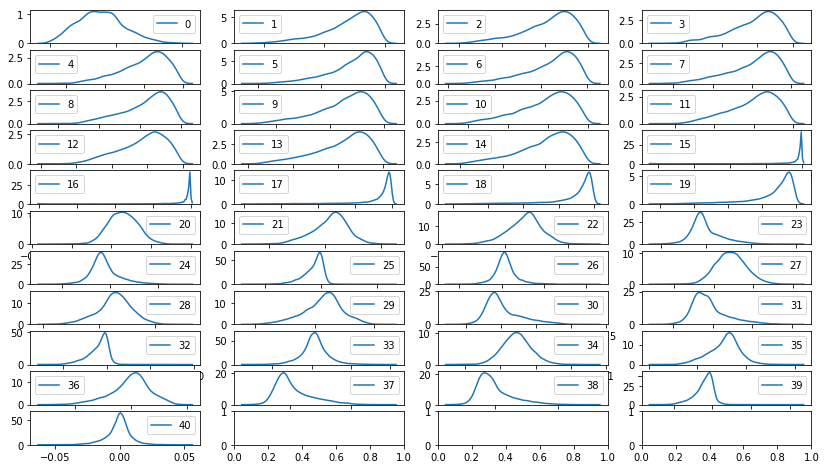

In [16]:
#PLOT KERNEL DENSITY ESTIMATION AFTER OUTLIER REMOVAL

fig, ax = plt.subplots(figsize = (14, 8), ncols = 4, nrows = 11)

r = 0
c = 0
for i in range(0, 41):
    sns.kdeplot(good_X[i], ax = ax[r][c])
    c += 1
    if c == 4:
        c = 0
        r += 1

In [17]:
# PERFORM PCA TO REDUCE NUMBER OF FEATURES

from sklearn.decomposition import PCA

pca = PCA(10)
pca.fit(good_X)

reduced_X = pca.transform(good_X)
reduced_X = pd.DataFrame(reduced_X)
reduced_X.head()

0         1         2         3         4         5         6  \
0 -0.036457 -0.100254  0.383629  0.200251 -0.107980 -0.108953 -0.019863   
1 -0.131855  0.114712  0.137125  0.009965  0.124637 -0.070293 -0.043504   
2 -0.521504  0.028375 -0.057931 -0.070639  0.017799 -0.060471  0.011211   
3  0.283438  0.205532 -0.204476 -0.010828  0.031082 -0.012592 -0.001033   
4 -0.521276  0.325863  0.044952 -0.192105  0.076747  0.013936  0.027370   

          7         8         9  
0 -0.006160 -0.082463  0.000893  
1 -0.060625 -0.072883  0.010710  
2 -0.049825 -0.029317 -0.015518  
3  0.047951  0.016891  0.009621  
4  0.021526 -0.005172 -0.111044

# MODEL DEVELOPMENT


In [18]:
from sklearn.cross_validation import train_test_split

# Takes a dataset and corresponding label as input and splits it into train and test sets
def getCrossValidationDataSplit(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))
    
    return [X_train, X_test, y_train, y_test]

C:\Users\PADIAQ\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score 

# Returns the accuracy and F-Score of the benchmark Gaussian Naive Bayes classification model
def getNaivePredictorMetrics():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)
    
    naive_clf = GaussianNB()
    naive_clf.fit(X_train, y_train)
    
    pred = naive_clf.predict(X_test)

    accuracy = accuracy_score(y_test, pred)
    fscore = f1_score(y_test, pred)

    print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))
    
    return [accuracy, fscore]

getNaivePredictorMetrics()

Naive Predictor: [Accuracy score: 0.6053, F-score: 0.6828]


[0.6053494827151148, 0.6827586206896552]

In [20]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score 
from time import time

# Returns the result metrics for a learner, sample size, dataset combination.
def trainPredict(learner, sample_size, X_train, y_train, X_test, y_test): 
    results = {}
    
    start = time()
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time()
    
    results['train_time'] = end - start
        
    start = time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time()
    
    results['pred_time'] = end - start
    
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    results['f_train'] = f1_score(y_train[:300], predictions_train)
    results['f_test'] = f1_score(y_test, predictions_test)
       
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    return results

In [21]:
import matplotlib.patches as mpatches

# Visualize results of learning by five classification algorithms in a graphical manner
def evaluate(results, accuracy, f1, data_label):
    
    fig, ax = plt.subplots(2, 3, figsize = (11,7))

    bar_width = 0.16
    colors = ['#A00000', '#00A0A0', '#00A000', '#A0A000', '#0000A0']

    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                ax[j//3, j%3].bar(i + k * bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))

    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")

    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")

    ax[0, 1].axhline(y = accuracy, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, linewidth = 1, color = 'k', linestyle = 'dashed')

    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))
    
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches)

    plt.suptitle("Performance Metrics for Classification on " + data_label + " Dataset", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

In [22]:
# Display result metrics for all five classifiers in tabular form
def displayResultsTable(results):
    results_list = []
    for k, learner in enumerate(results.keys()):
        entry = [learner]
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            entry.append(results[learner][2][metric])
        results_list.append(entry)
    
    result_df = pd.DataFrame(data = results_list)
    result_df.columns = ['Model', 'Train Time', 'Training Accuracy', 'Training F-Score', 'Prediction Time',\
                         'Test Accuracy', 'Test F-Score']
    display(result_df)

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


# Initialize five classifiers and sample sizes and return combined results for all possible classifer-sample-size pair
def getClassificationResults(X_train, y_train, X_test, y_test):
    clf_A = GaussianNB()
    clf_B = RandomForestClassifier()
    clf_C = AdaBoostClassifier()
    clf_D = SVC()
    clf_E = MLPClassifier()

    samples_100 = len(y_train)
    samples_10 = int(0.1 * samples_100)
    samples_1 = int(0.01 * samples_100)
    
    results = {}
    for clf in [clf_A, clf_B, clf_C, clf_D, clf_E]:
        clf_name = clf.__class__.__name__
        results[clf_name] = {}
        for i, samples in enumerate([samples_1, samples_10, samples_100]):
            results[clf_name][i] = trainPredict(clf, samples, X_train, y_train, X_test, y_test)
    
    return results

C:\Users\PADIAQ\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d



MODEL DEVELOPMENT ON ORIGINAL DATASET


Training set has 7924 samples.
Testing set has 1982 samples.
Naive Predictor: [Accuracy score: 0.6053, F-score: 0.6828]
GaussianNB trained on 79 samples.
GaussianNB trained on 792 samples.
GaussianNB trained on 7924 samples.
RandomForestClassifier trained on 79 samples.
RandomForestClassifier trained on 792 samples.
RandomForestClassifier trained on 7924 samples.
AdaBoostClassifier trained on 79 samples.
AdaBoostClassifier trained on 792 samples.
AdaBoostClassifier trained on 7924 samples.
SVC trained on 79 samples.


C:\Users\PADIAQ\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PADIAQ\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PADIAQ\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 792 samples.
SVC trained on 7924 samples.
MLPClassifier trained on 79 samples.


C:\Users\PADIAQ\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PADIAQ\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


MLPClassifier trained on 792 samples.
MLPClassifier trained on 7924 samples.


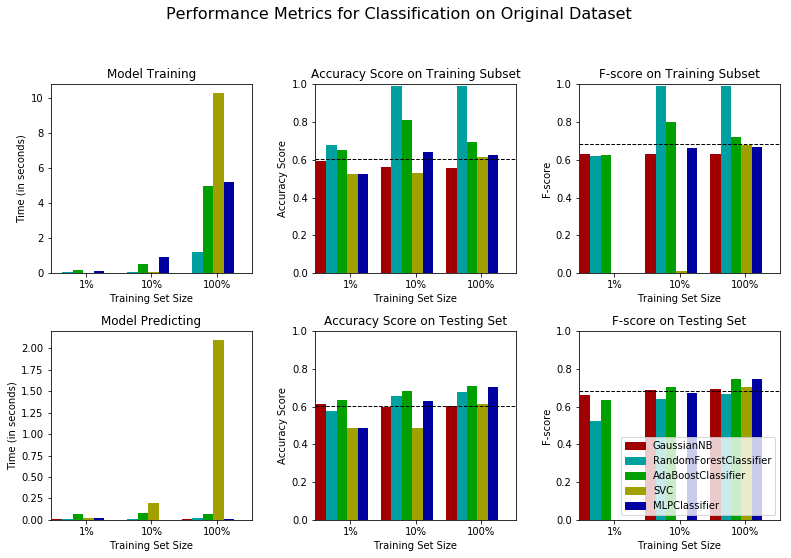

In [24]:
X_train, X_test, y_train, y_test = getCrossValidationDataSplit(X, y)
accuracy, fscore = getNaivePredictorMetrics()
results = getClassificationResults(X_train, y_train, X_test, y_test)

evaluate(results, accuracy, fscore, "Original")

In [25]:
displayResultsTable(results)

Model  Train Time  Training Accuracy  Training F-Score  \
0              GaussianNB    0.024986           0.556667          0.629526   
1  RandomForestClassifier    1.184291           0.990000          0.989399   
2      AdaBoostClassifier    4.965839           0.696667          0.721713   
3                     SVC   10.268339           0.613333          0.681319   
4           MLPClassifier    5.187003           0.626667          0.666667   

   Prediction Time  Test Accuracy  Test F-Score  
0         0.004996       0.602422      0.690495  
1         0.016989       0.675580      0.668727  
2         0.062962       0.710898      0.743853  
3         2.098531       0.614026      0.703603  
4         0.008998       0.704339      0.744105


MODEL DEVELOPMENT ON CLEAN DATASET


Training set has 6730 samples.
Testing set has 1683 samples.
Naive Predictor: [Accuracy score: 0.6053, F-score: 0.6828]
GaussianNB trained on 67 samples.
GaussianNB trained on 673 samples.
GaussianNB trained on 6730 samples.
RandomForestClassifier trained on 67 samples.
RandomForestClassifier trained on 673 samples.
RandomForestClassifier trained on 6730 samples.
AdaBoostClassifier trained on 67 samples.
AdaBoostClassifier trained on 673 samples.
AdaBoostClassifier trained on 6730 samples.
SVC trained on 67 samples.
SVC trained on 673 samples.
SVC trained on 6730 samples.
MLPClassifier trained on 67 samples.
MLPClassifier trained on 673 samples.
MLPClassifier trained on 6730 samples.


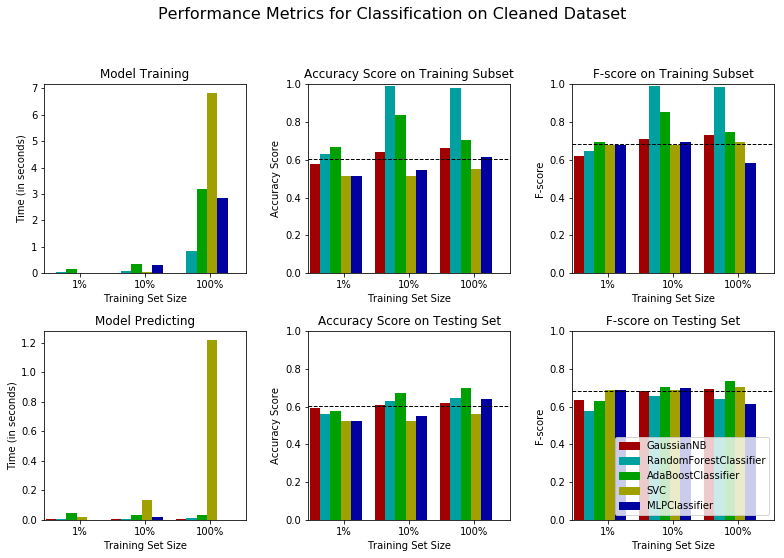

In [26]:
good_X_train, good_X_test, good_y_train, good_y_test = getCrossValidationDataSplit(good_X, good_y)
good_accuracy, good_fscore = getNaivePredictorMetrics()
good_results = getClassificationResults(good_X_train, good_y_train, good_X_test, good_y_test)

evaluate(good_results, good_accuracy, good_fscore, "Cleaned")

In [27]:
displayResultsTable(good_results)

Model  Train Time  Training Accuracy  Training F-Score  \
0              GaussianNB    0.020985           0.663333          0.732095   
1  RandomForestClassifier    0.834385           0.983333          0.983713   
2      AdaBoostClassifier    3.182914           0.703333          0.746439   
3                     SVC    6.814271           0.553333          0.696833   
4           MLPClassifier    2.836634           0.613333          0.582734   

   Prediction Time  Test Accuracy  Test F-Score  
0         0.003999       0.616756      0.691830  
1         0.014994       0.646465      0.642213  
2         0.031251       0.698158      0.734310  
3         1.218735       0.558526      0.701006  
4         0.000000       0.642305      0.614597


MODEL DEVELOPMENT ON REDUCED DATASET


Training set has 6730 samples.
Testing set has 1683 samples.
Naive Predictor: [Accuracy score: 0.6053, F-score: 0.6828]
GaussianNB trained on 67 samples.
GaussianNB trained on 673 samples.
GaussianNB trained on 6730 samples.
RandomForestClassifier trained on 67 samples.
RandomForestClassifier trained on 673 samples.
RandomForestClassifier trained on 6730 samples.
AdaBoostClassifier trained on 67 samples.
AdaBoostClassifier trained on 673 samples.
AdaBoostClassifier trained on 6730 samples.
SVC trained on 67 samples.
SVC trained on 673 samples.
SVC trained on 6730 samples.


C:\Users\PADIAQ\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier trained on 67 samples.


C:\Users\PADIAQ\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier trained on 673 samples.
MLPClassifier trained on 6730 samples.


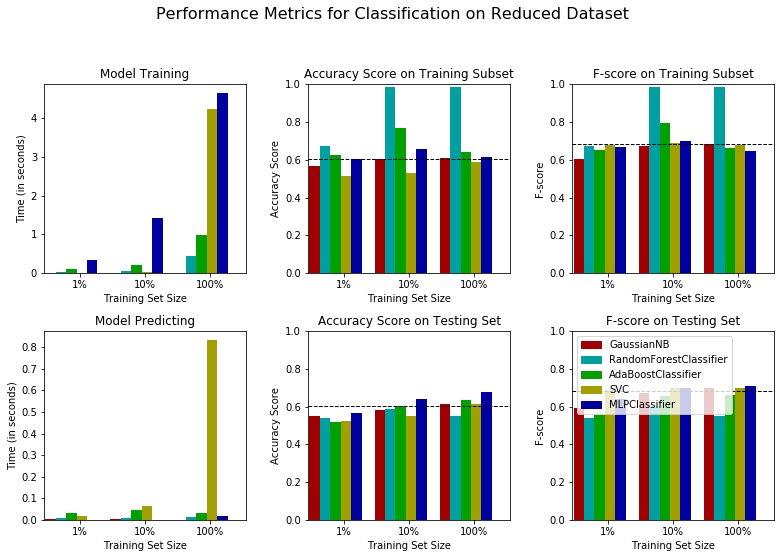

In [28]:
reduced_X_train, reduced_X_test, reduced_y_train, reduced_y_test = getCrossValidationDataSplit(reduced_X, good_y)
reduced_accuracy, reduced_fscore = getNaivePredictorMetrics()
reduced_results = getClassificationResults(reduced_X_train, reduced_y_train, reduced_X_test, reduced_y_test)

evaluate(reduced_results, reduced_accuracy, reduced_fscore, "Reduced")

In [29]:
displayResultsTable(reduced_results)

Model  Train Time  Training Accuracy  Training F-Score  \
0              GaussianNB    0.007995           0.610000          0.686327   
1  RandomForestClassifier    0.435737           0.986667          0.987013   
2      AdaBoostClassifier    0.987893           0.640000          0.662500   
3                     SVC    4.224097           0.590000          0.677165   
4           MLPClassifier    4.630485           0.613333          0.646341   

   Prediction Time  Test Accuracy  Test F-Score  
0         0.001000       0.614379      0.695448  
1         0.013996       0.551396      0.548715  
2         0.031250       0.635175      0.663008  
3         0.834174       0.613785      0.698516  
4         0.015627       0.676768      0.709712